In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import csv
import scipy
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters

# Background Estimation

In [4]:
filename = "video1.avi"
#location = "//storage.ncbs.res.in/harshavardanbn/data/210419/F2/"
location = "./F1/"
length = 10000
count = 0
random = np.random.randint(0, length, 50)
k = 5 #kernel size for blurring

bg_frames = [] #stores frames to used for bg calculation

cap = cv2.VideoCapture(location + filename)

if not cap.isOpened:
    print("Cannot open video")

while cap.isOpened:
    
    ret,frame = cap.read()
    
    if ret == 0:
        break
    
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame = cv2.medianBlur(frame, k)
    
    if count == length:
        break
        
    if count in random:
        copy = frame.copy()
        bg_frames.append(copy)
    
    cv2.imshow("frame", frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    count += 1
    
cap.release()
cv2.destroyAllWindows()

bg_frames = np.array(bg_frames)
bg = np.median(bg_frames, axis = 0)
cv2.imshow('Background', cv2.convertScaleAbs(bg))
cv2.waitKey(0)
cv2.destroyAllWindows()
len(bg_frames)

10

# Dirty coordinate extraction

0.0 % tracked poorly


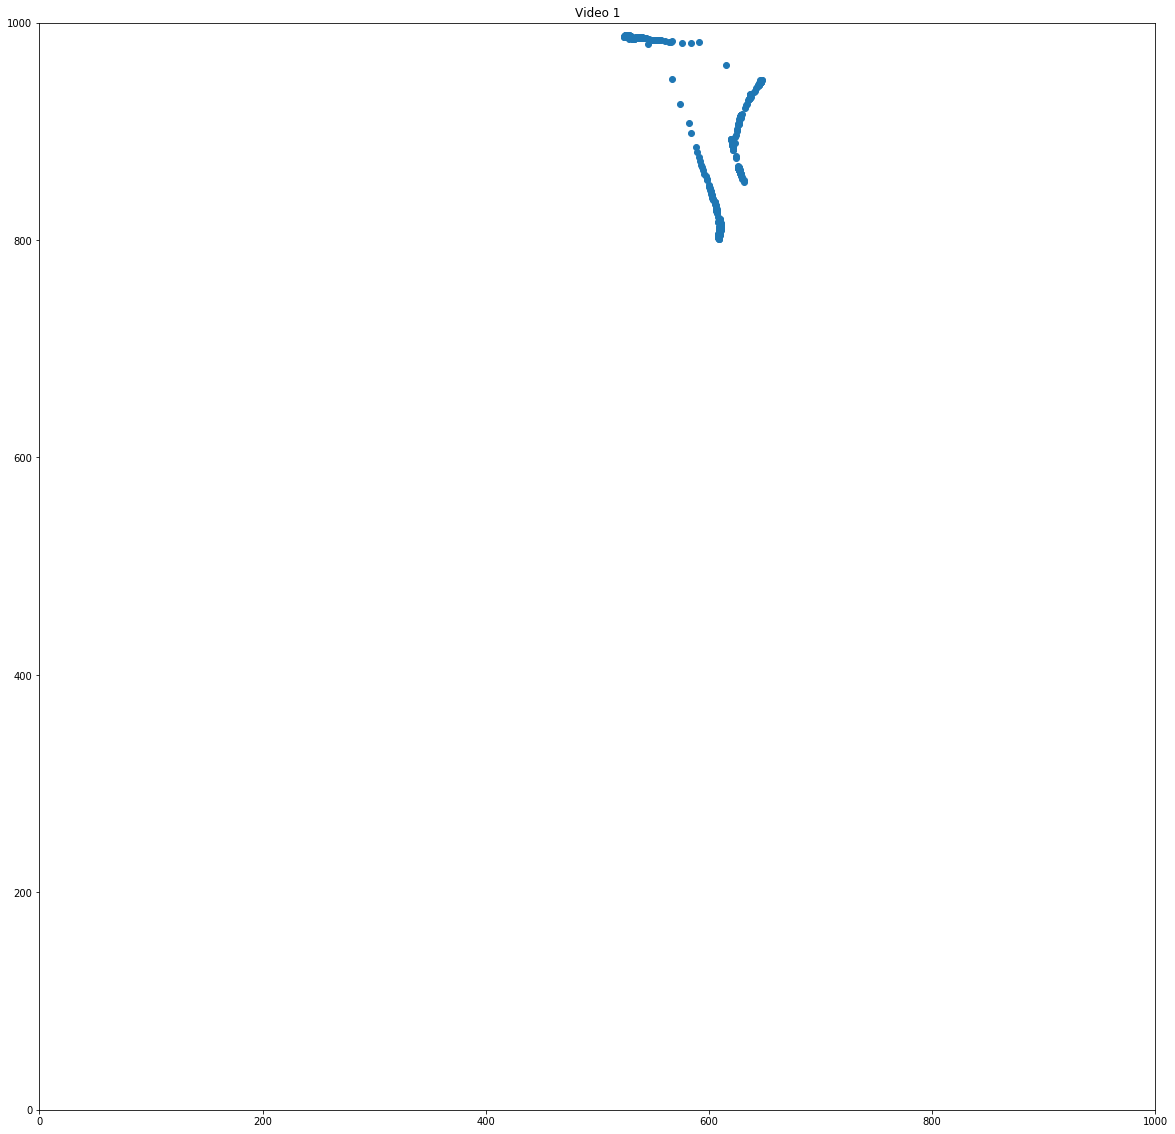

0.0 % tracked poorly


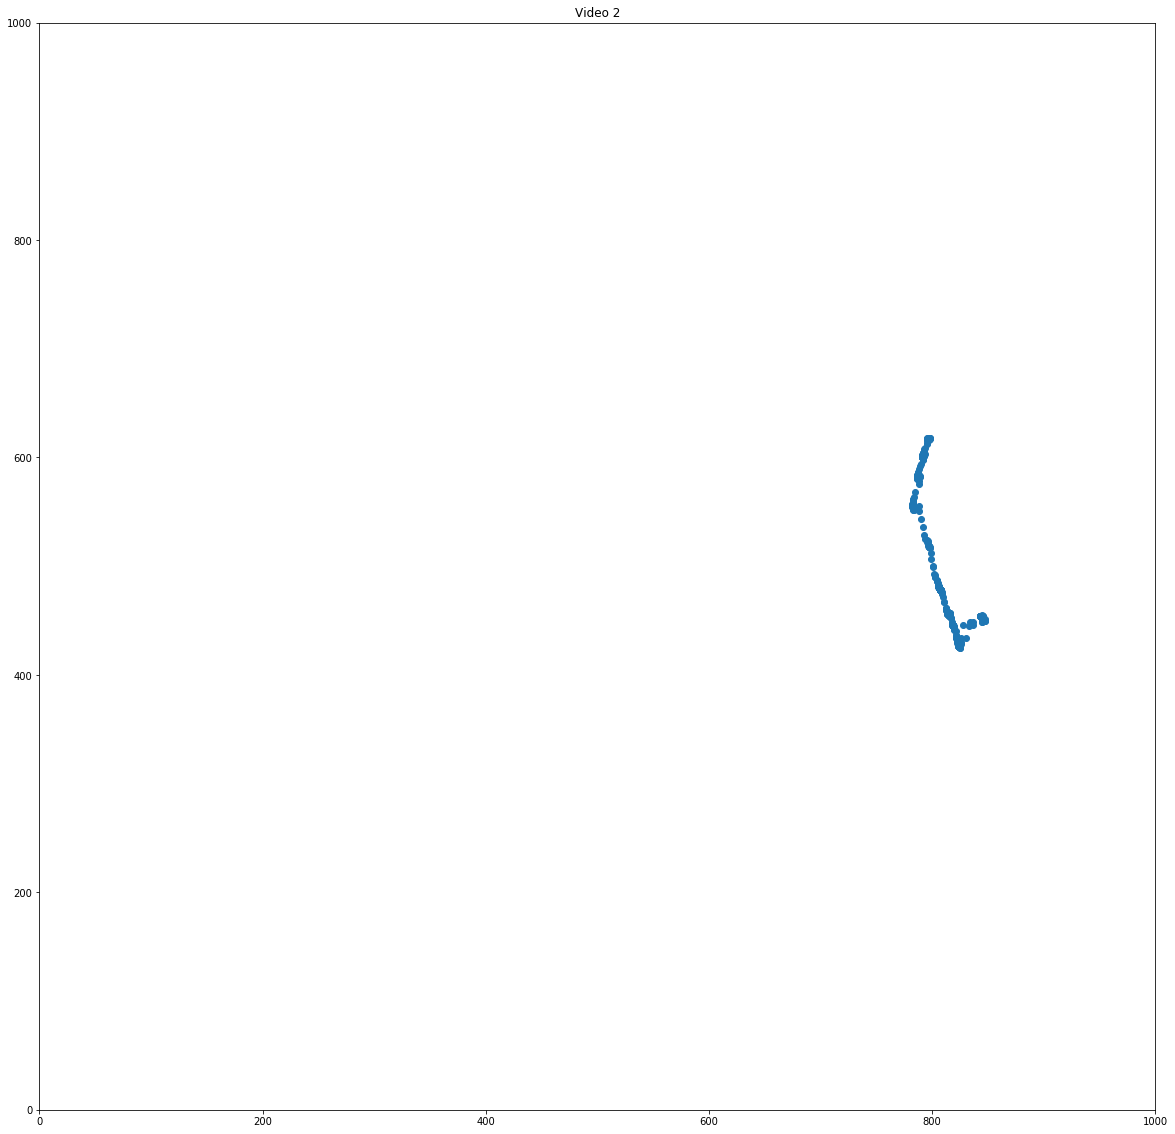

0.0 % tracked poorly


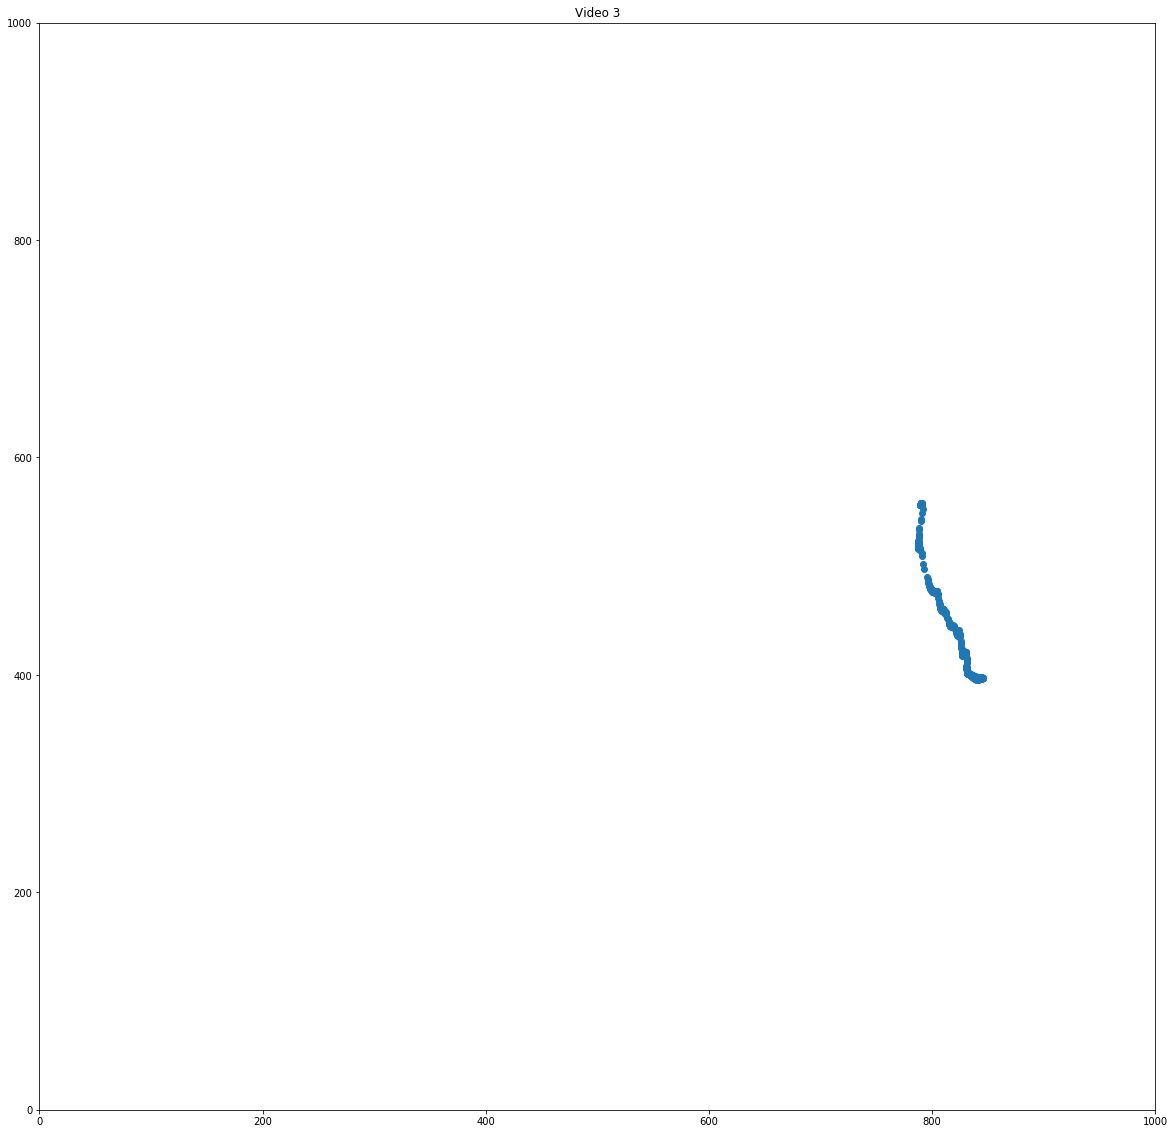

0.0 % tracked poorly


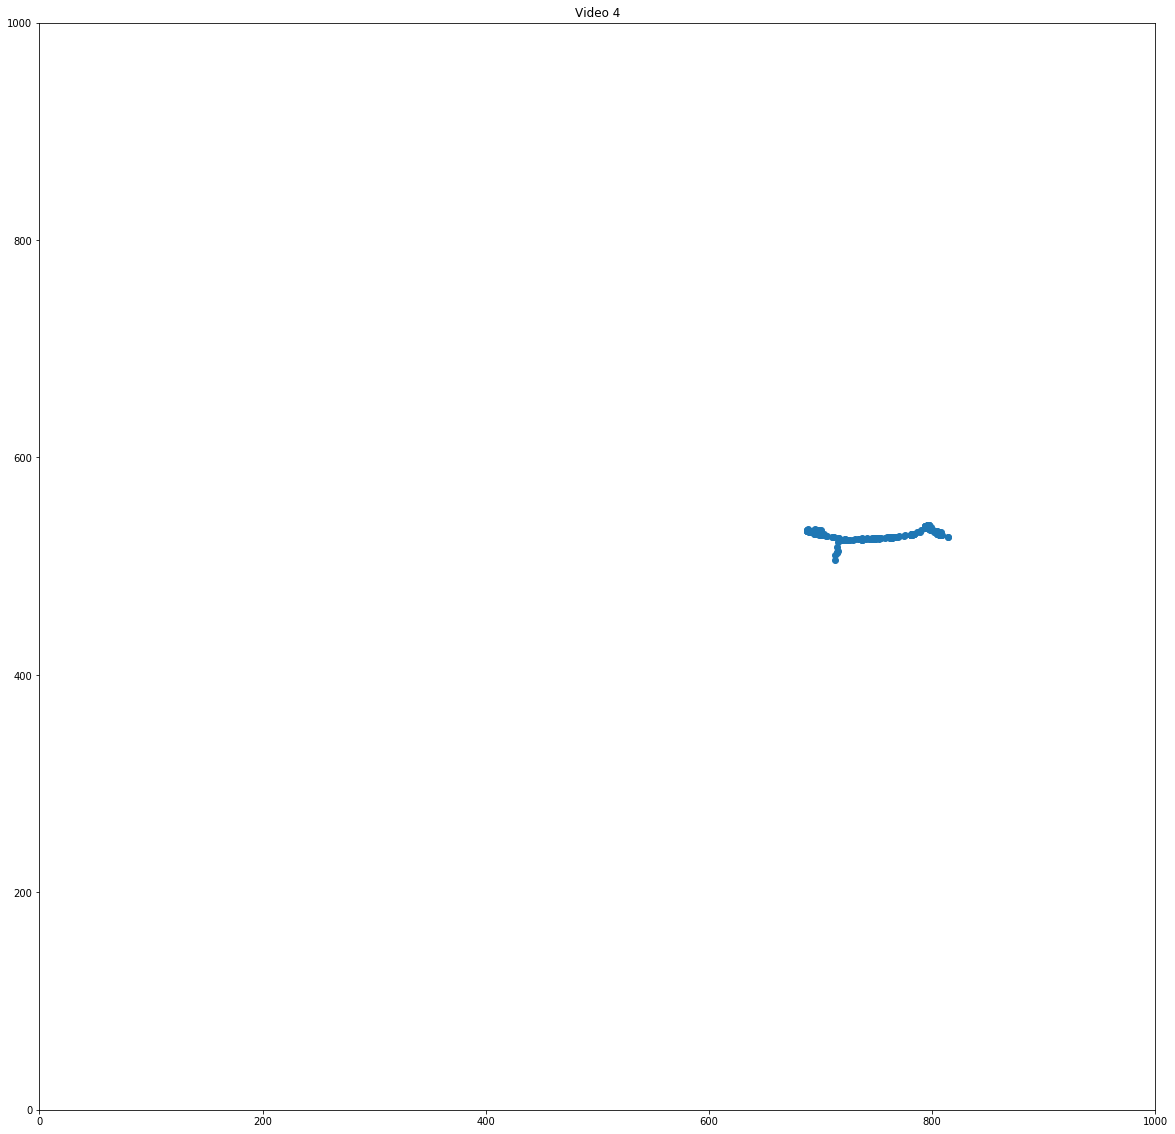

0.0 % tracked poorly


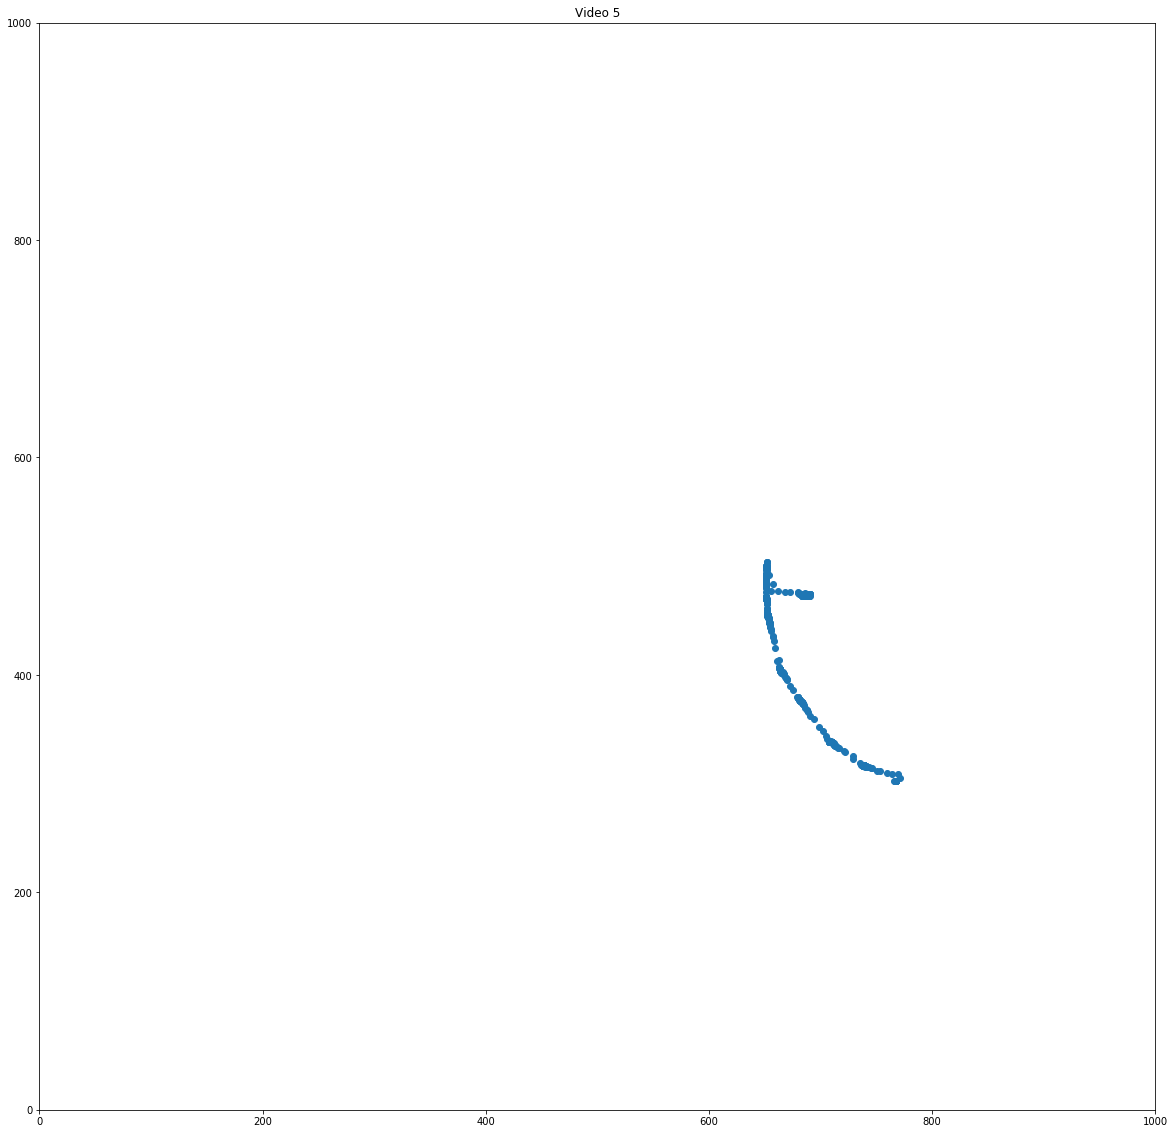

0.0 % tracked poorly


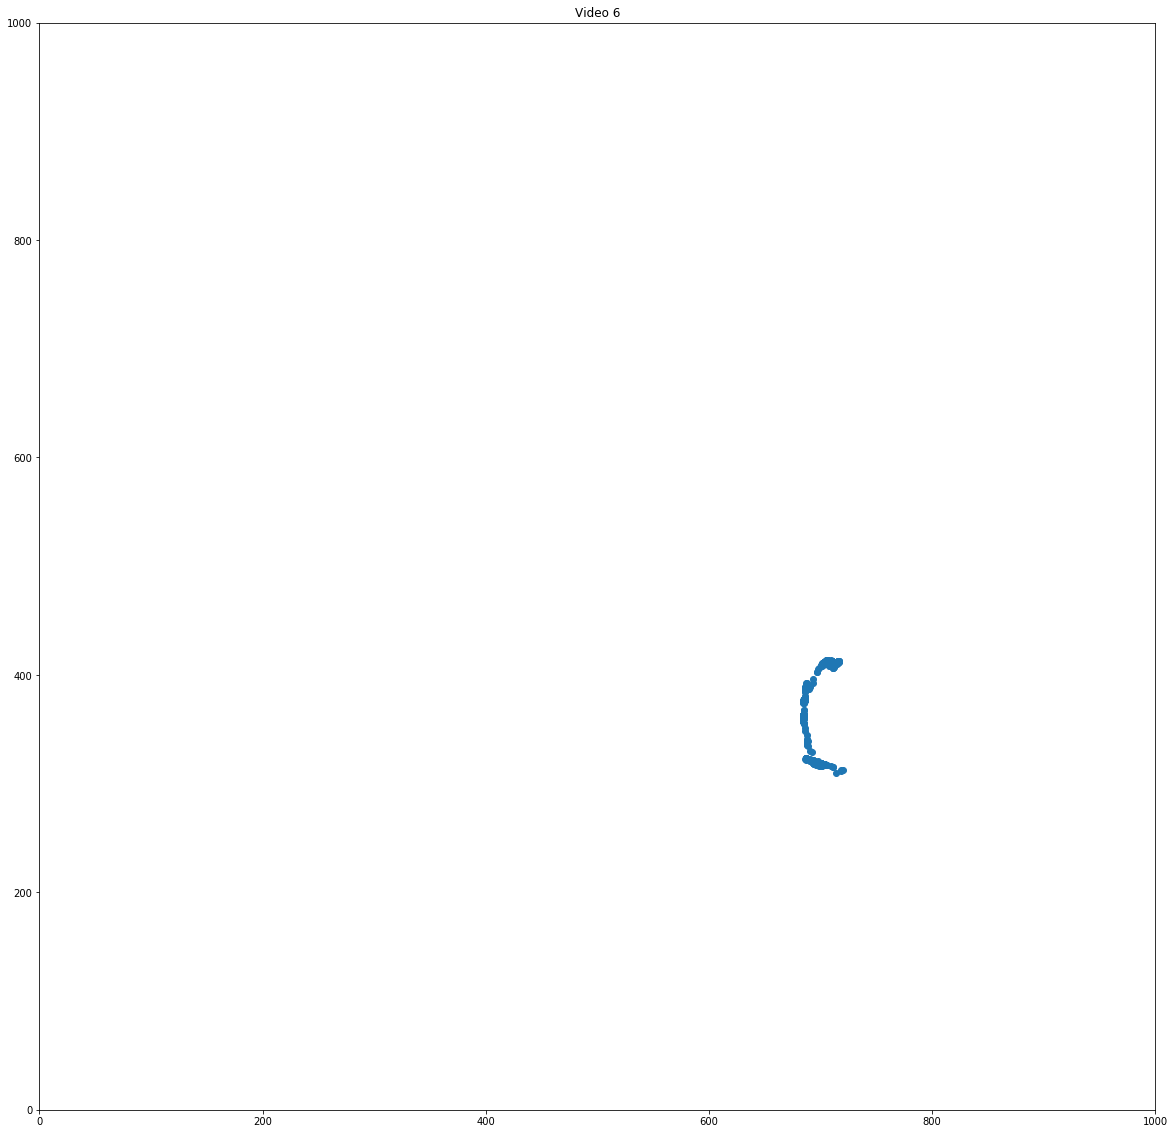

0.0 % tracked poorly


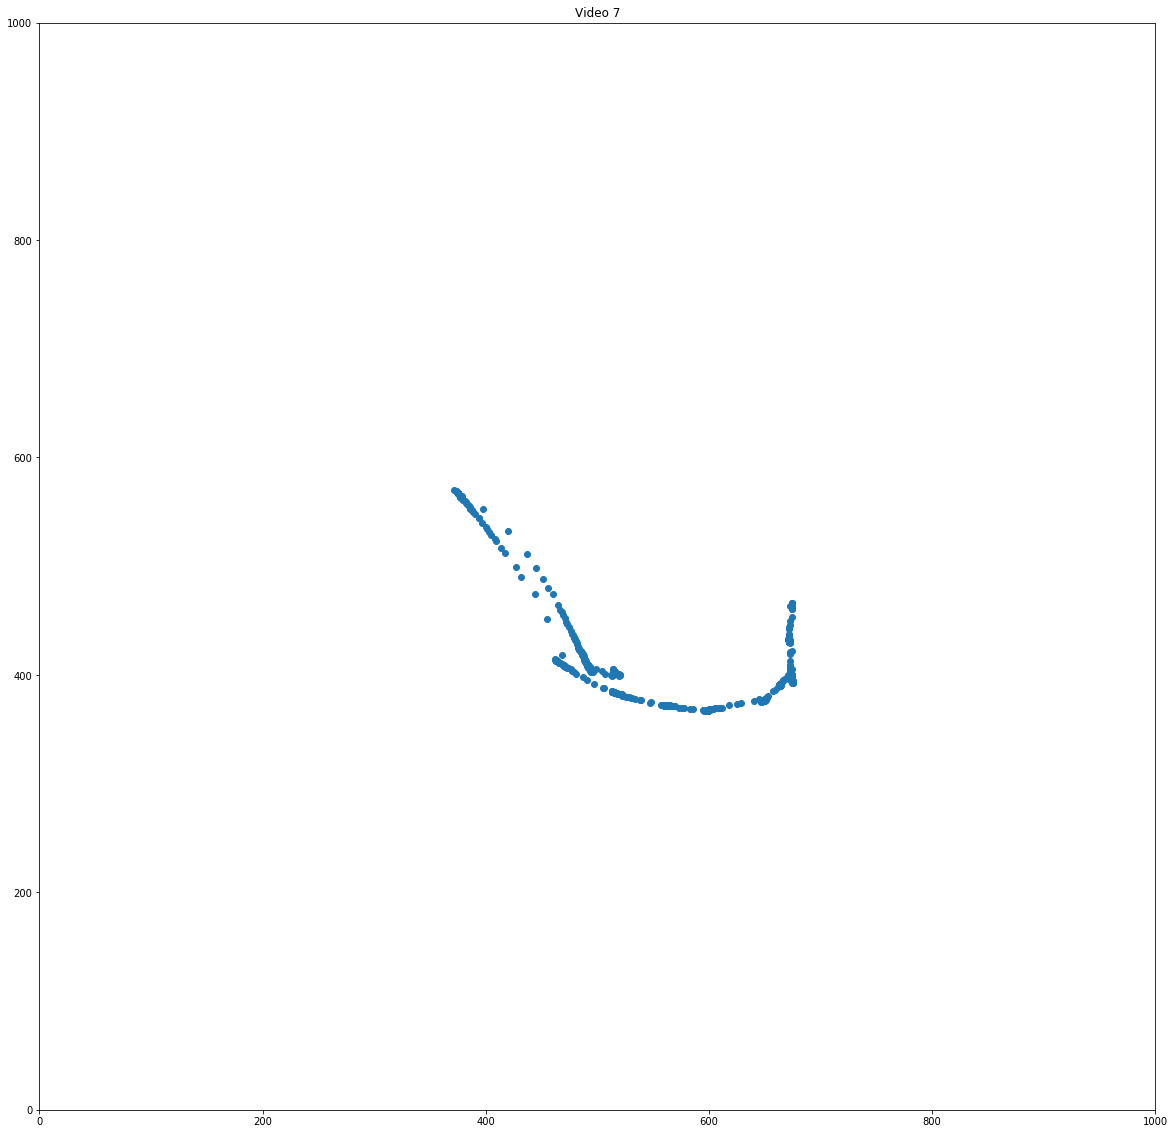

0.0 % tracked poorly


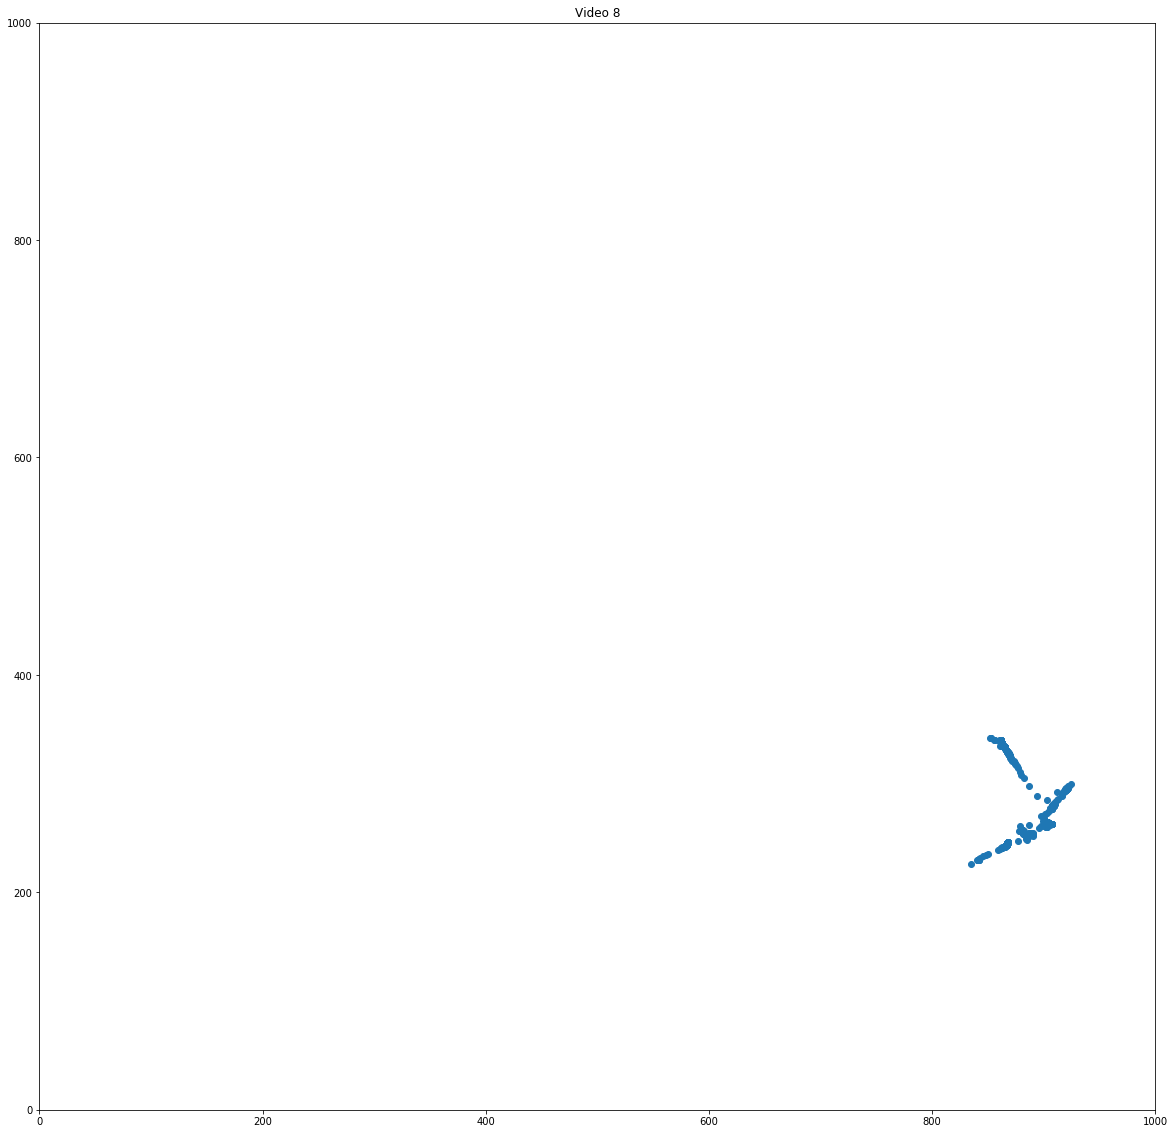

0.0 % tracked poorly


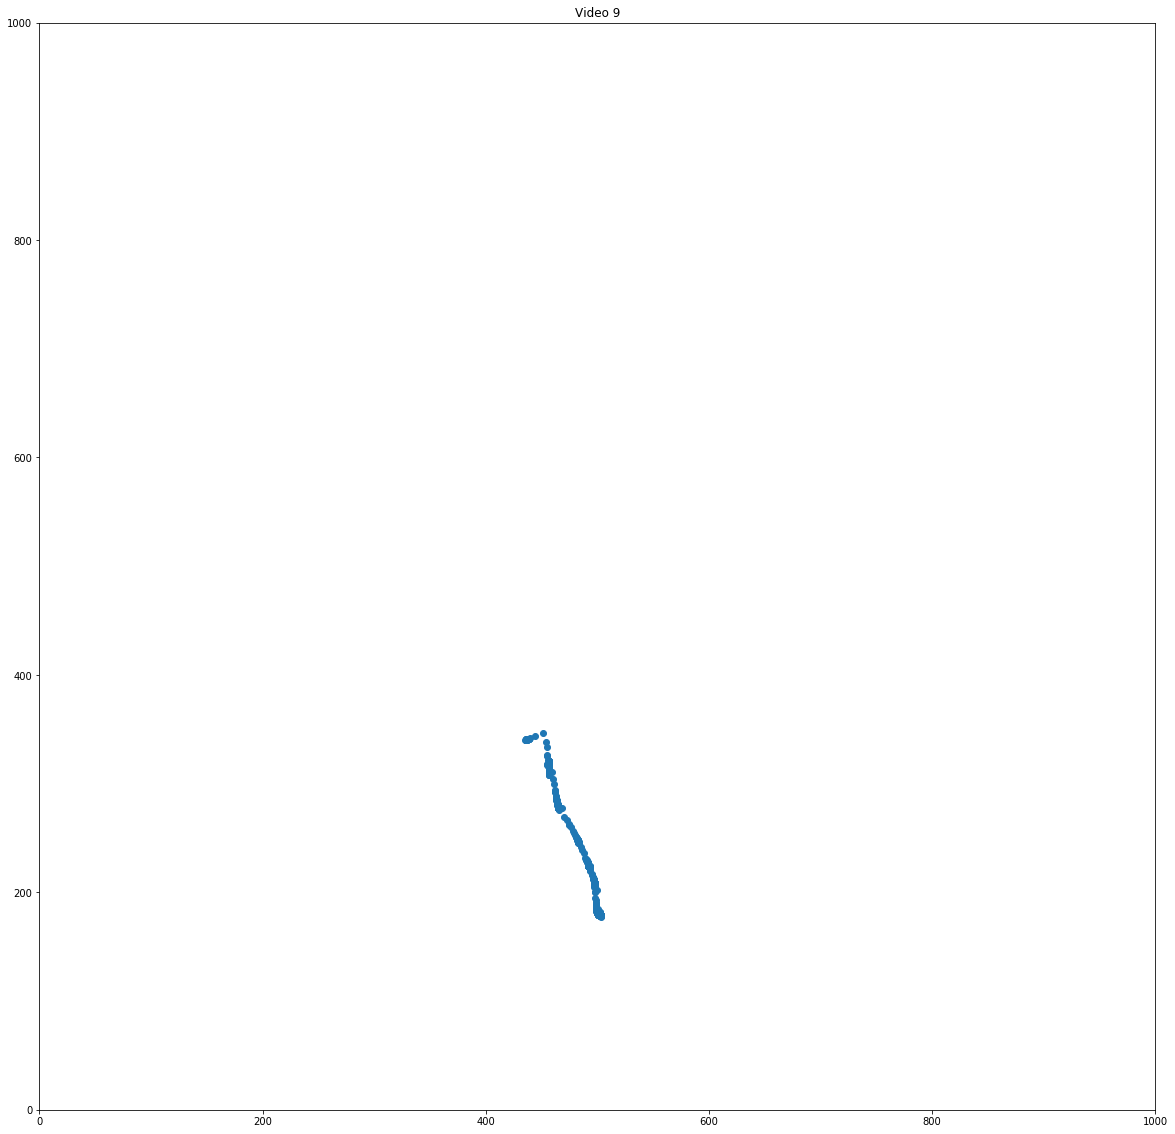

0.0 % tracked poorly


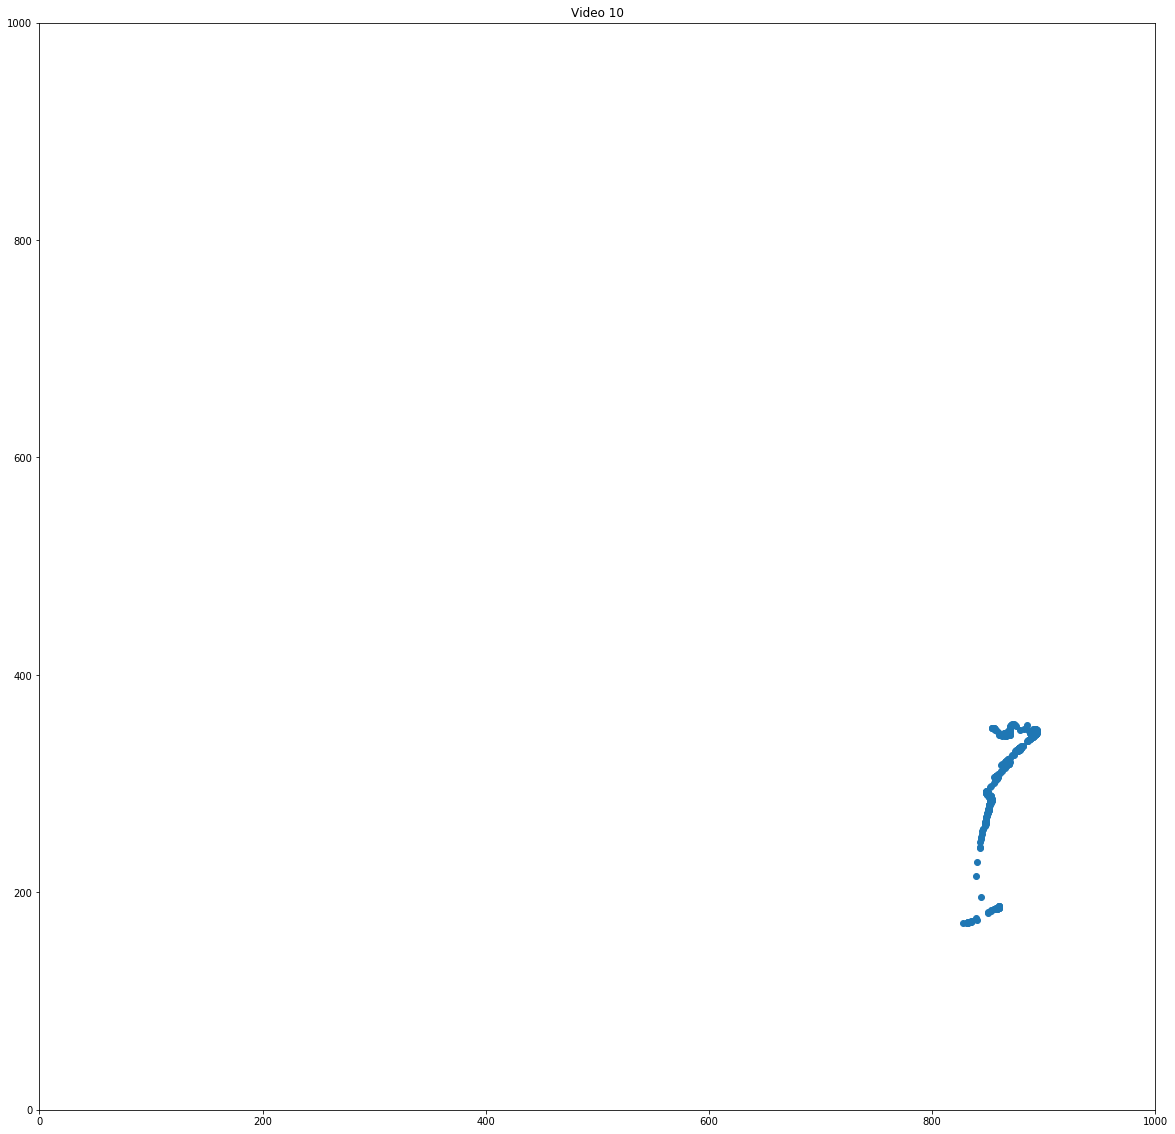

0.0 % tracked poorly


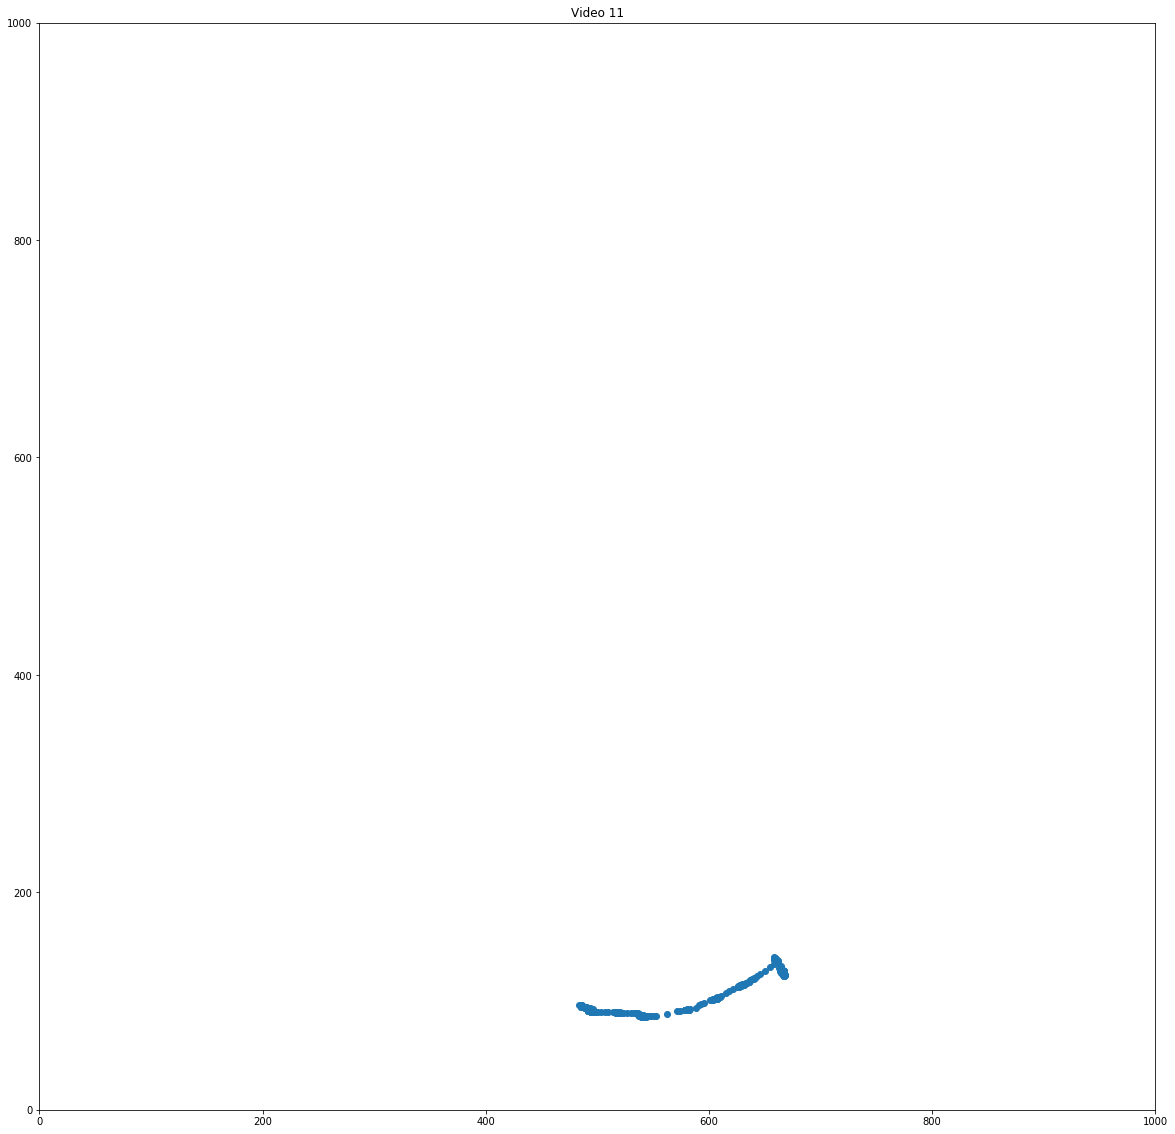

0.0 % tracked poorly


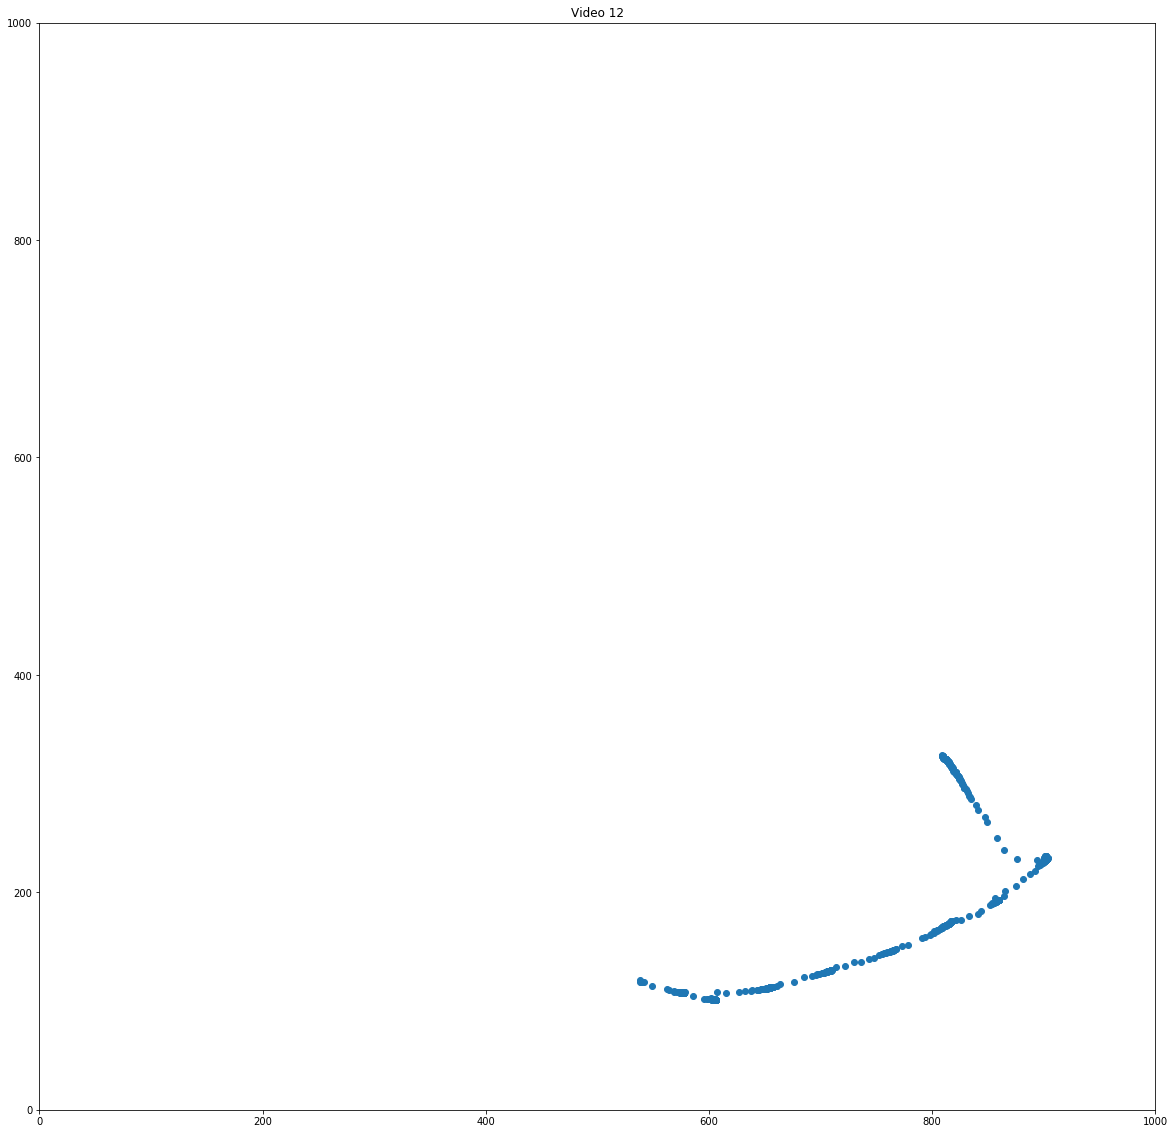

0.0 % tracked poorly


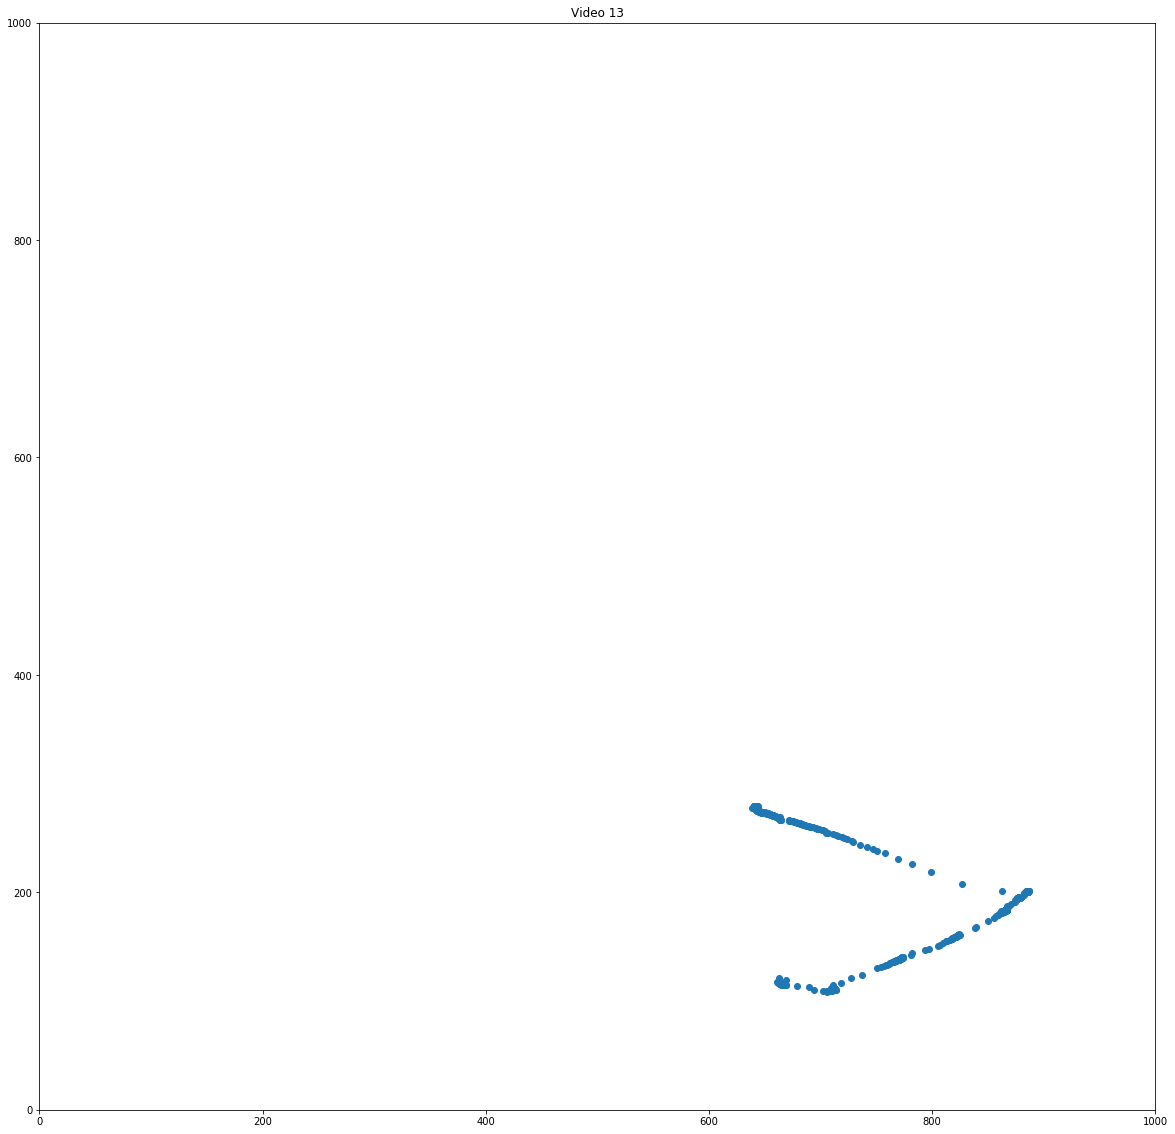

0.0 % tracked poorly


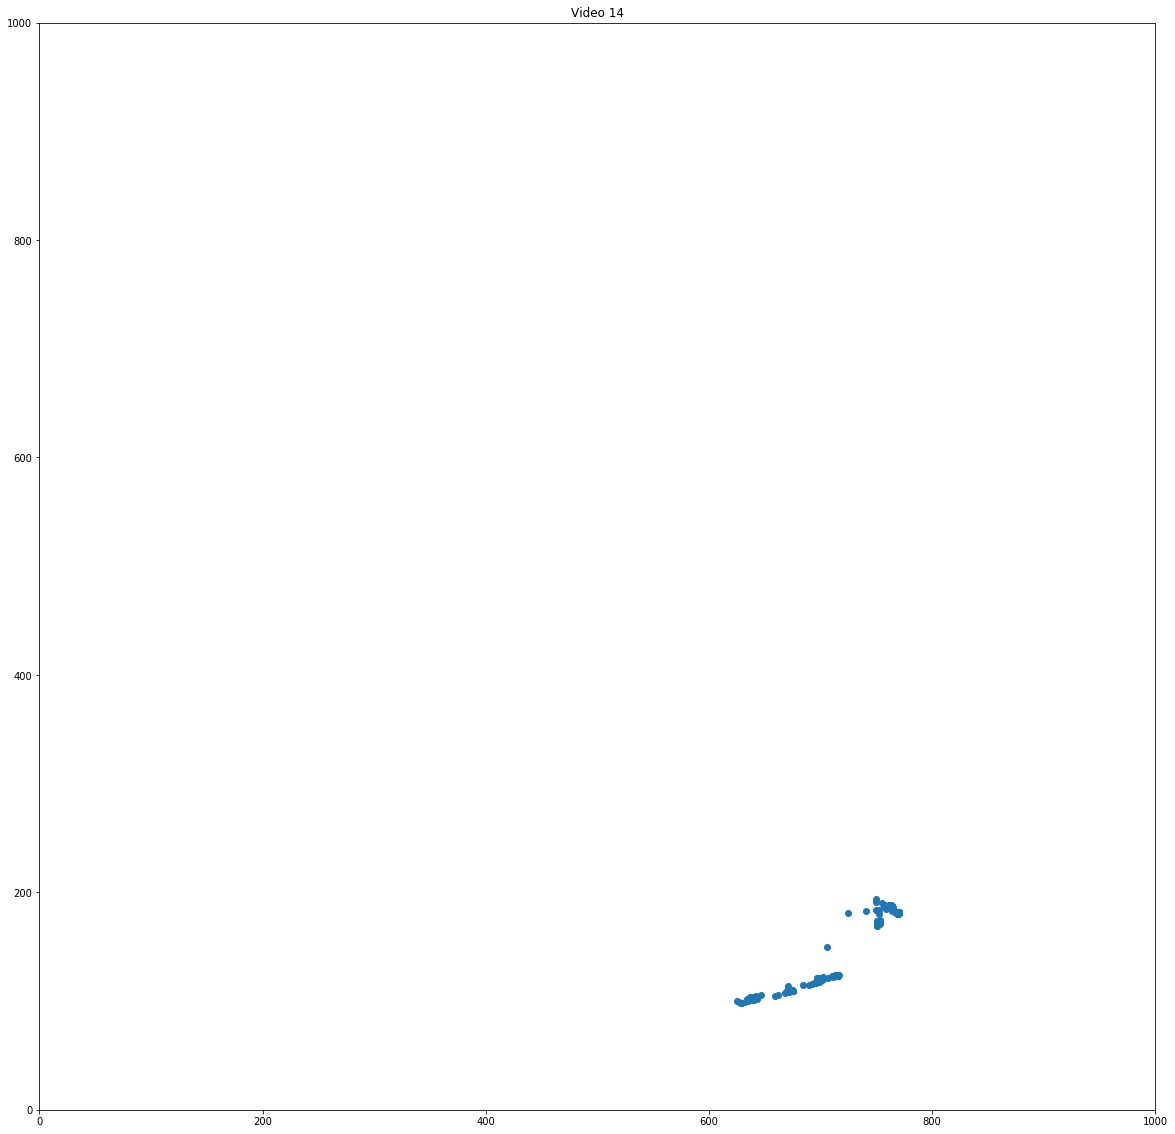

0.0 % tracked poorly


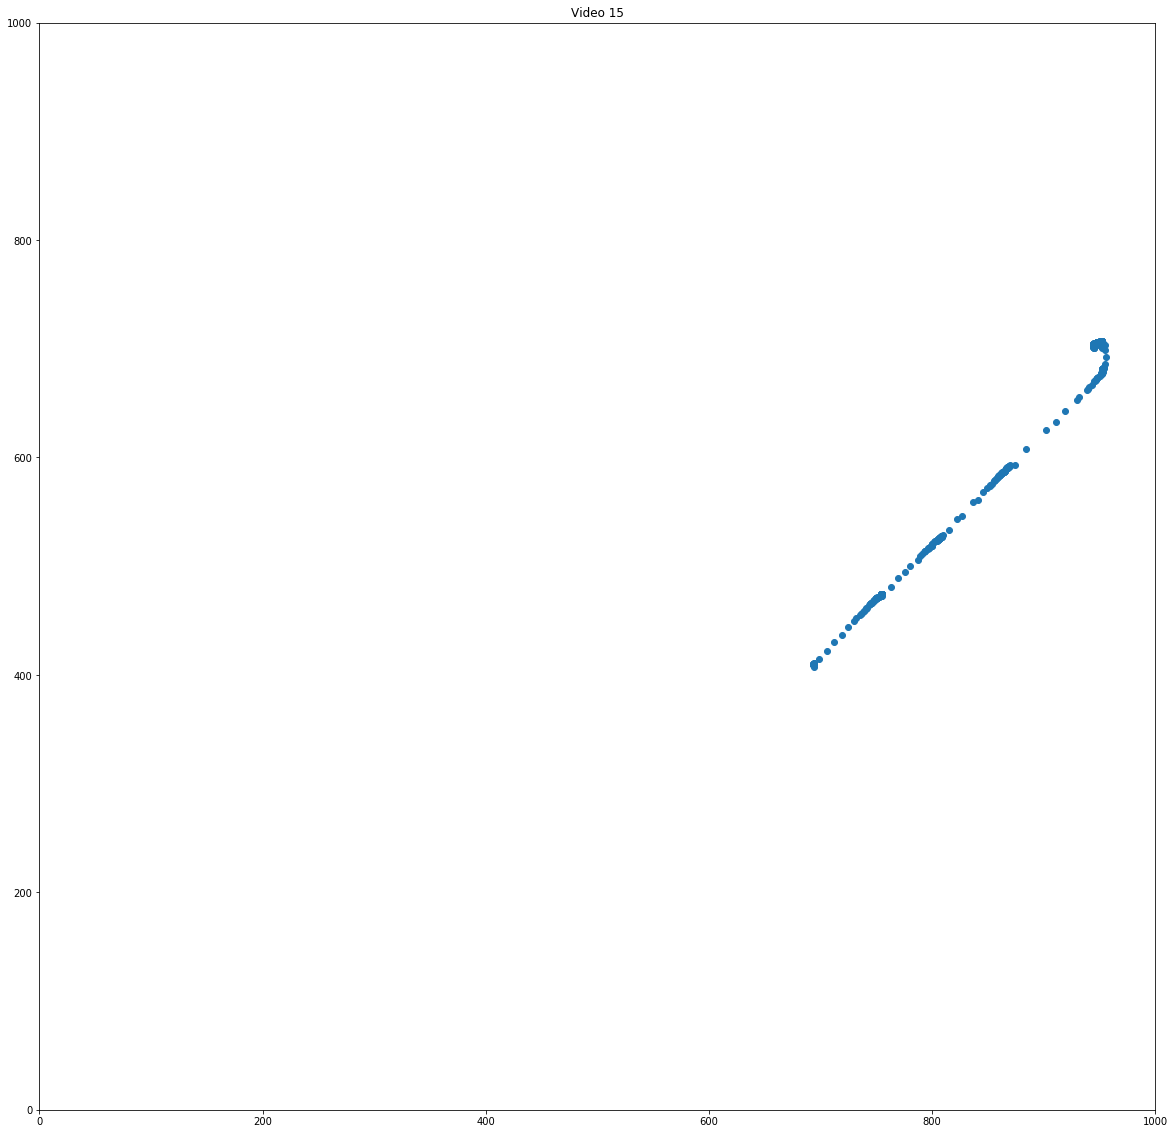

0.0 % tracked poorly


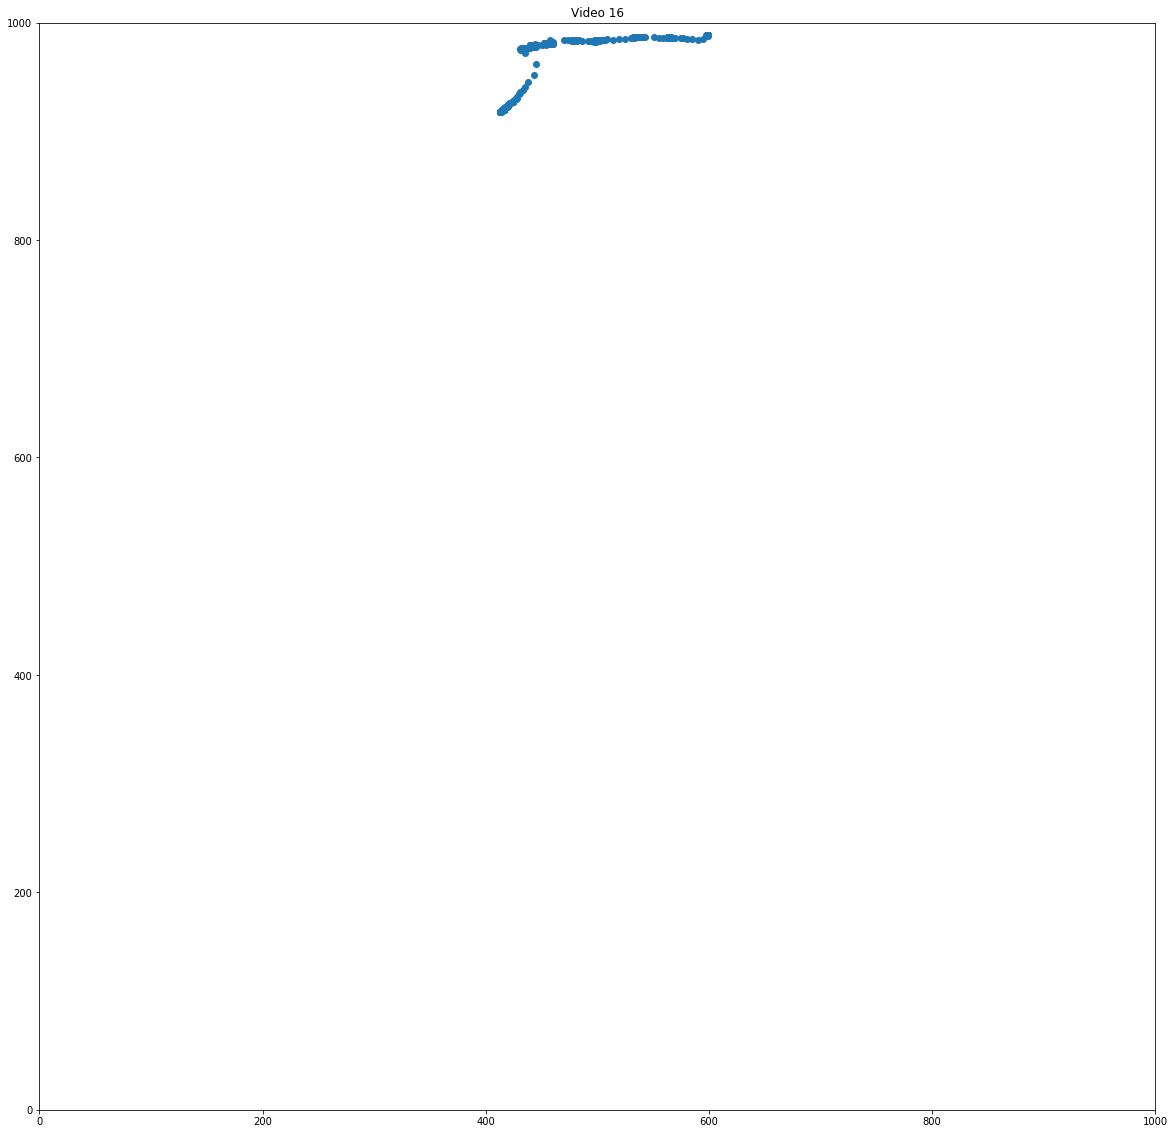

0.0 % tracked poorly


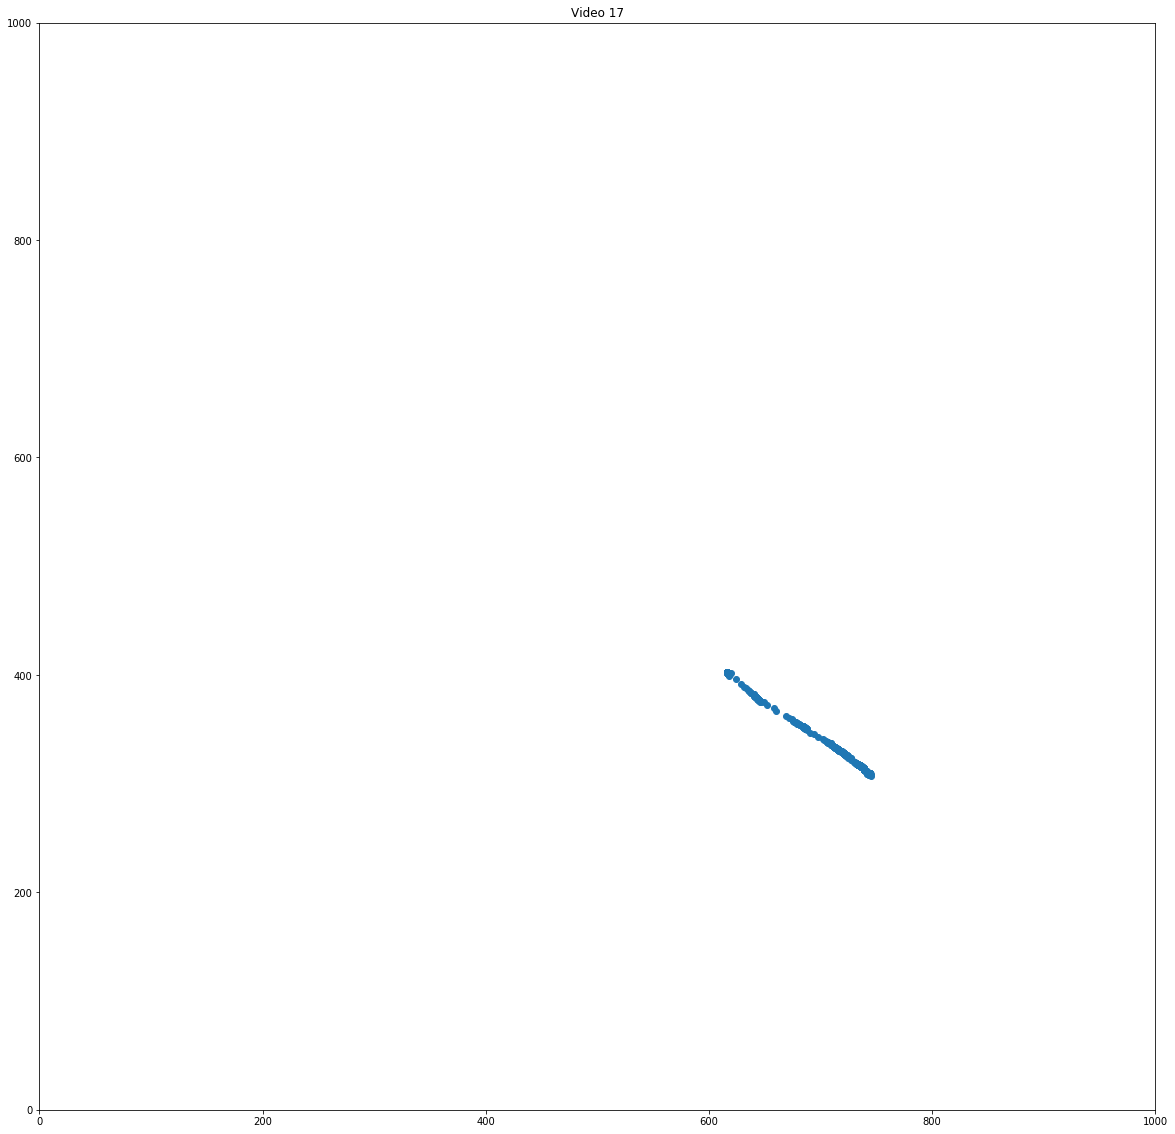

0.0 % tracked poorly


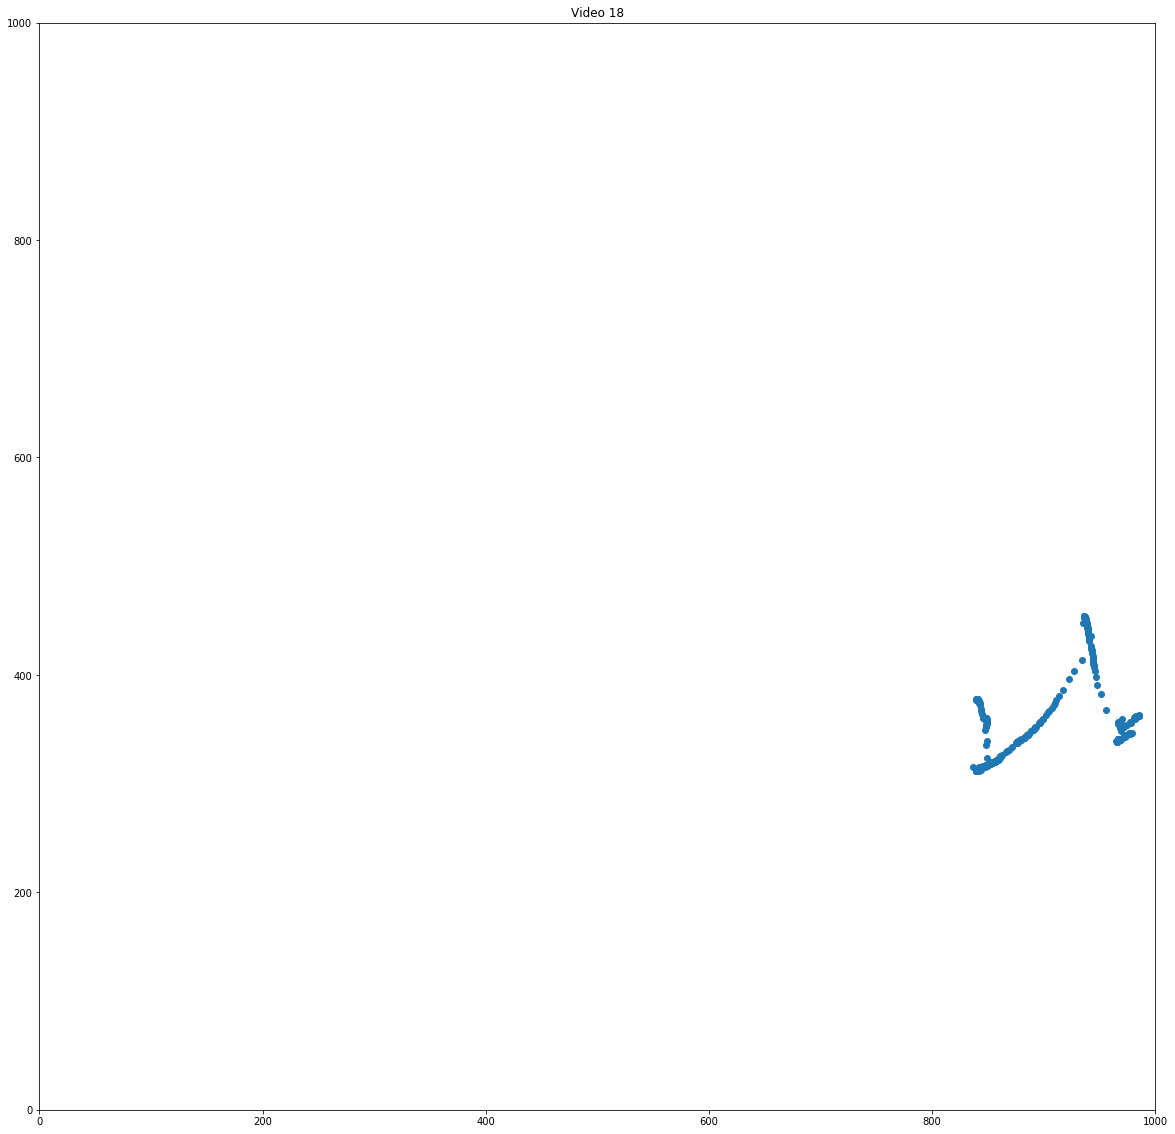

0.0 % tracked poorly


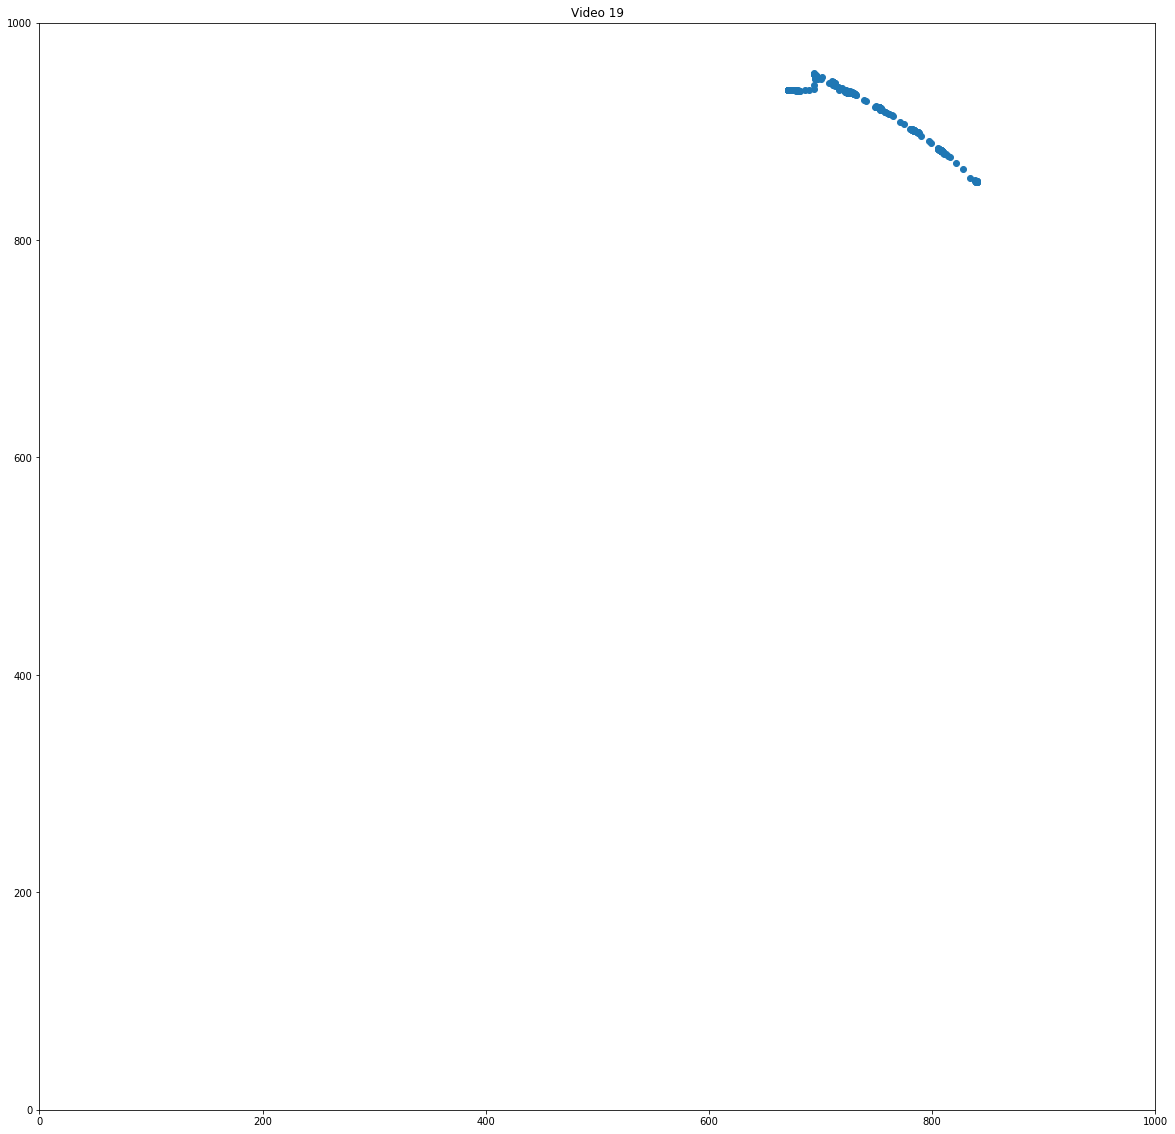

0.0 % tracked poorly


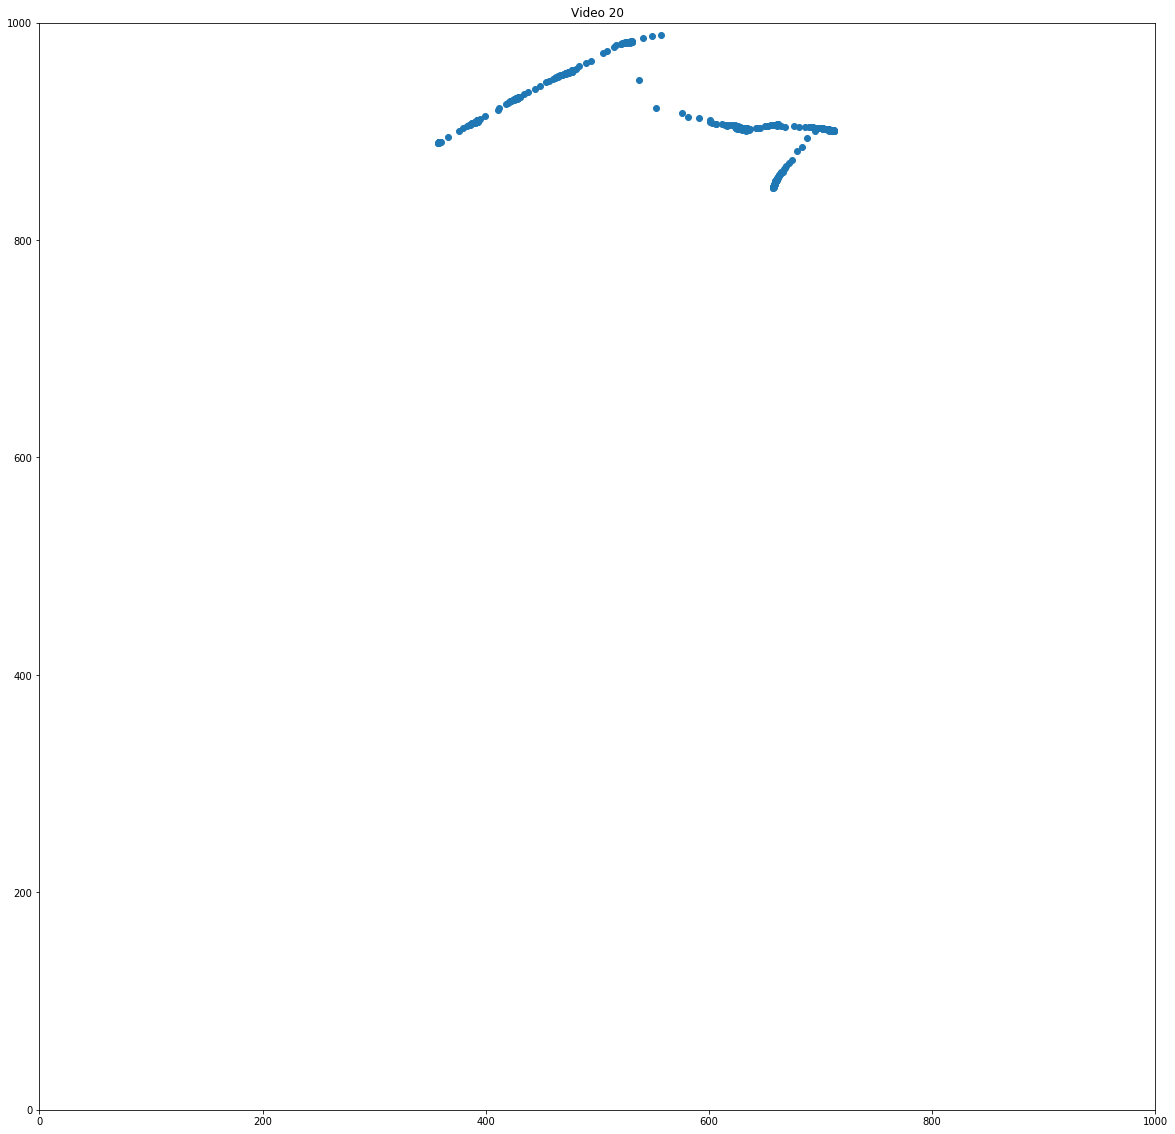

0.0 % tracked poorly


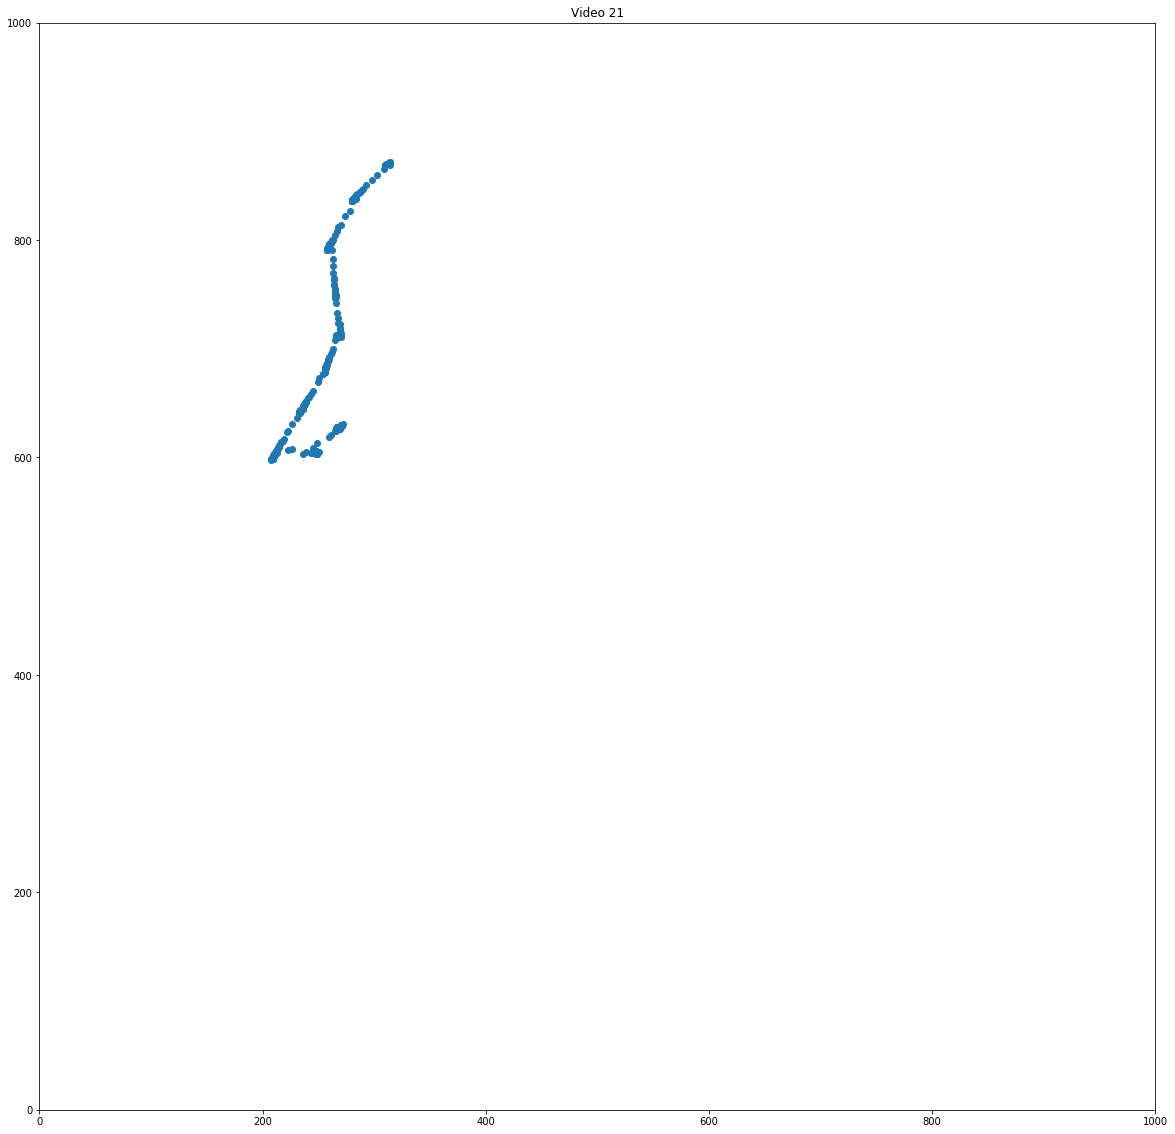

0.0 % tracked poorly


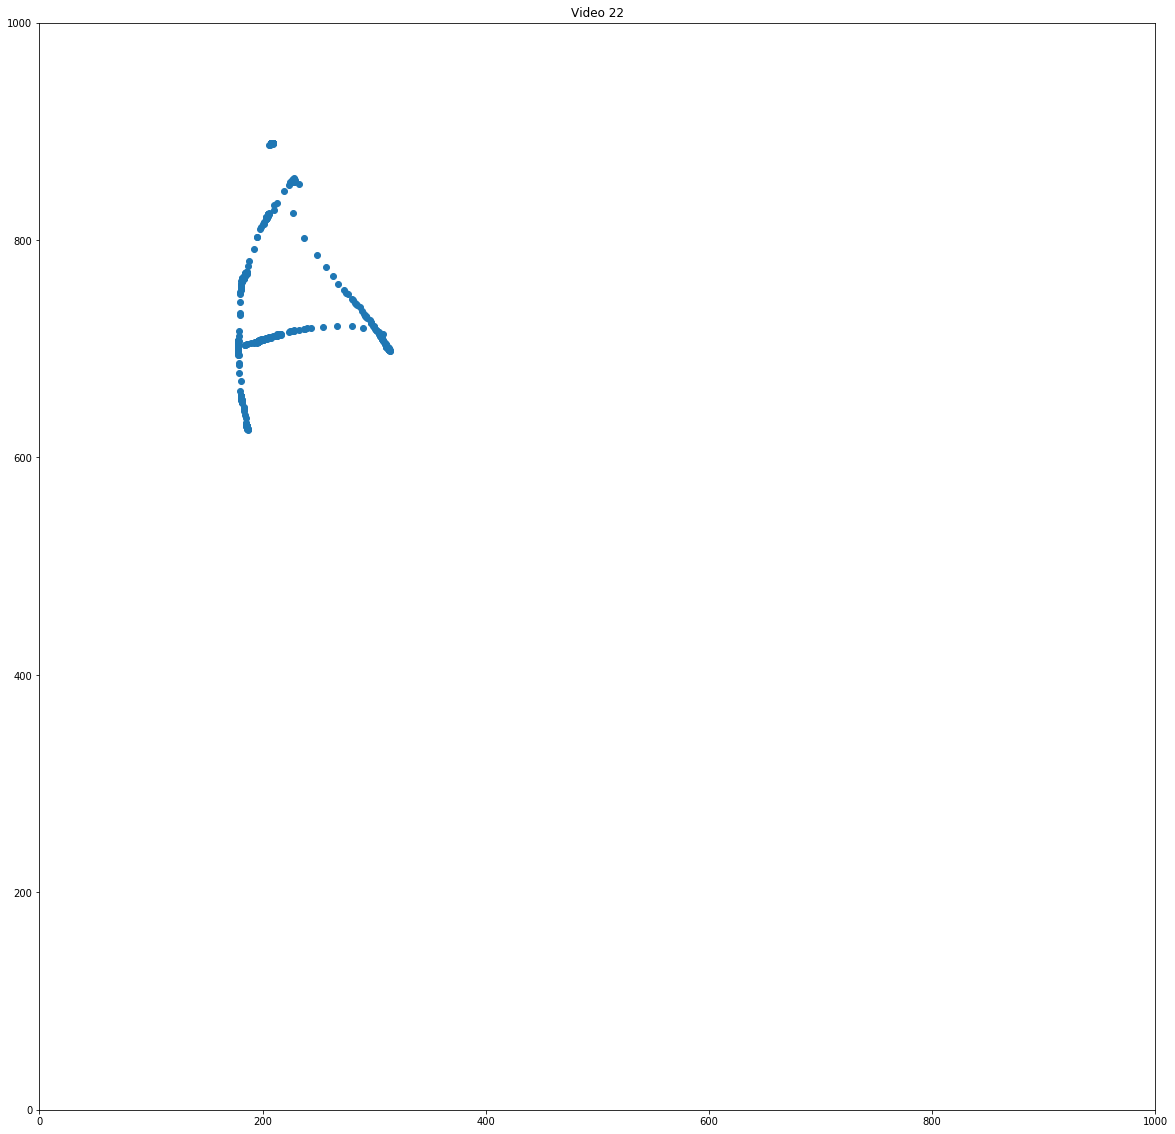

0.0 % tracked poorly


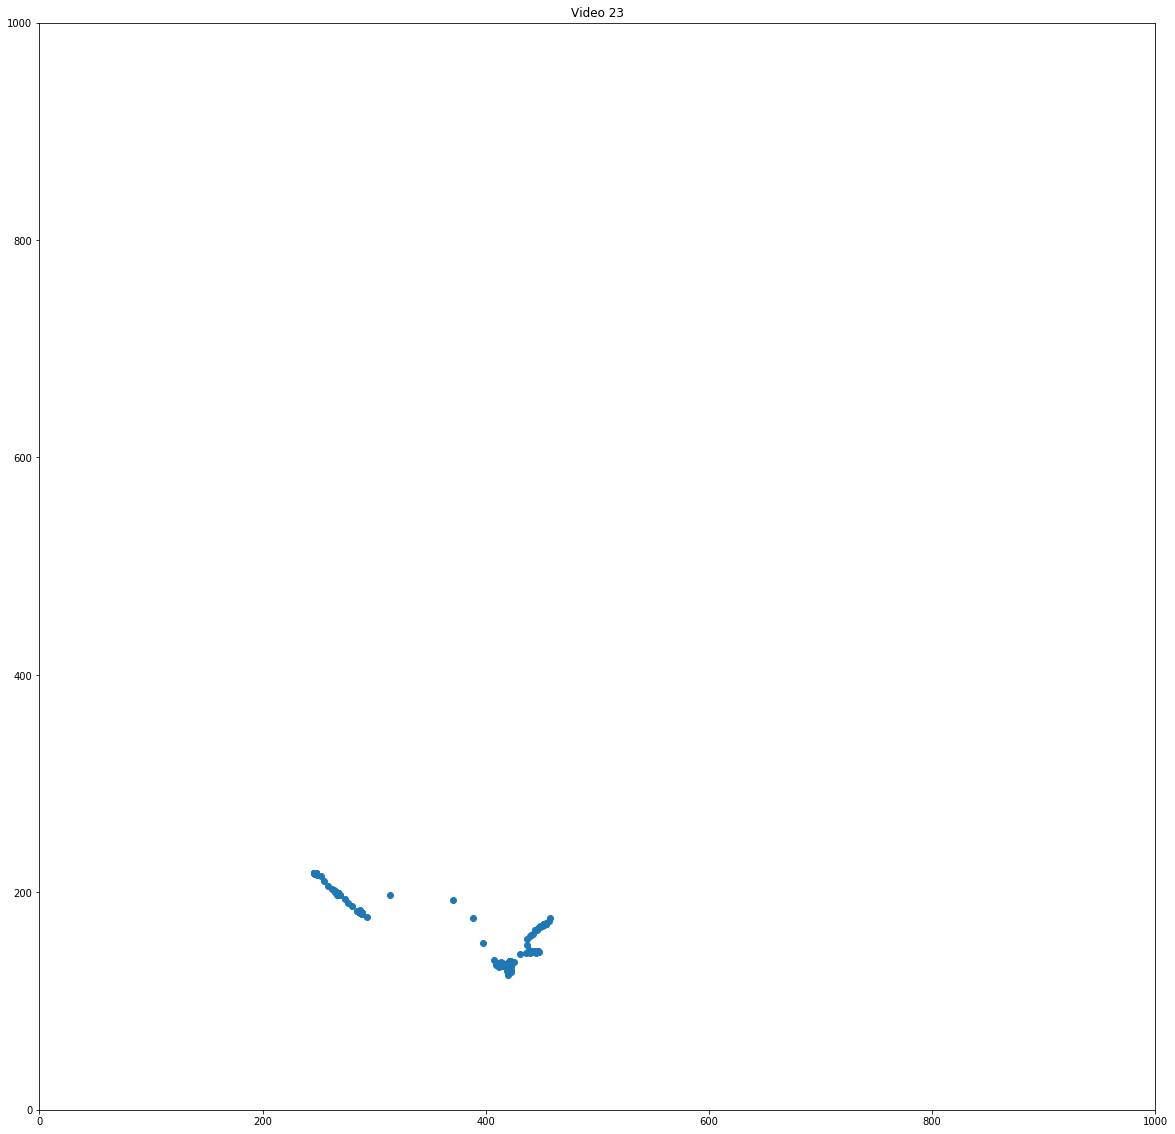

0.0 % tracked poorly


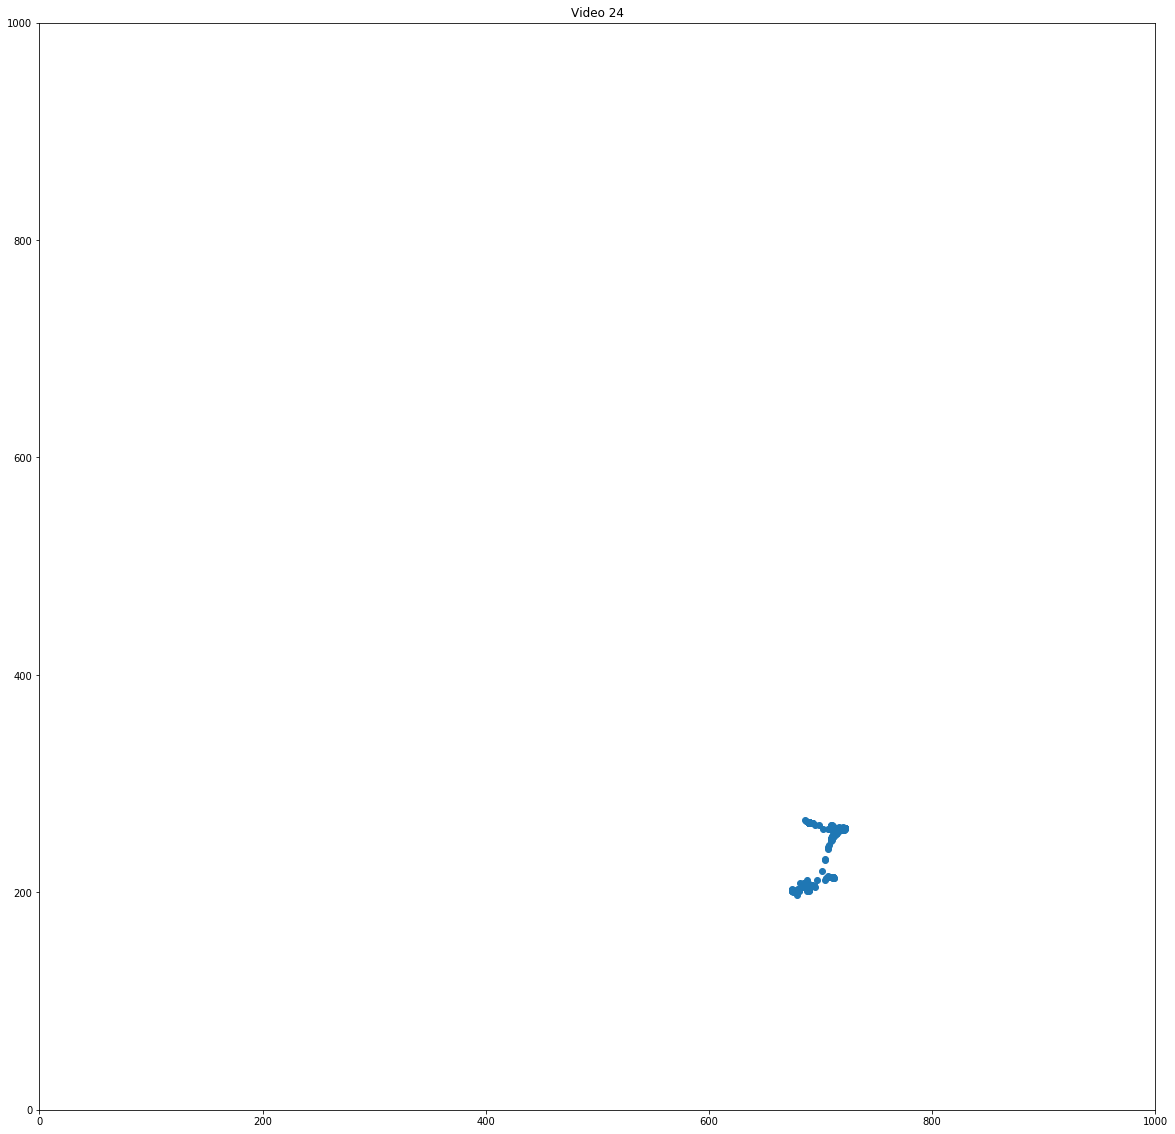

0.0 % tracked poorly


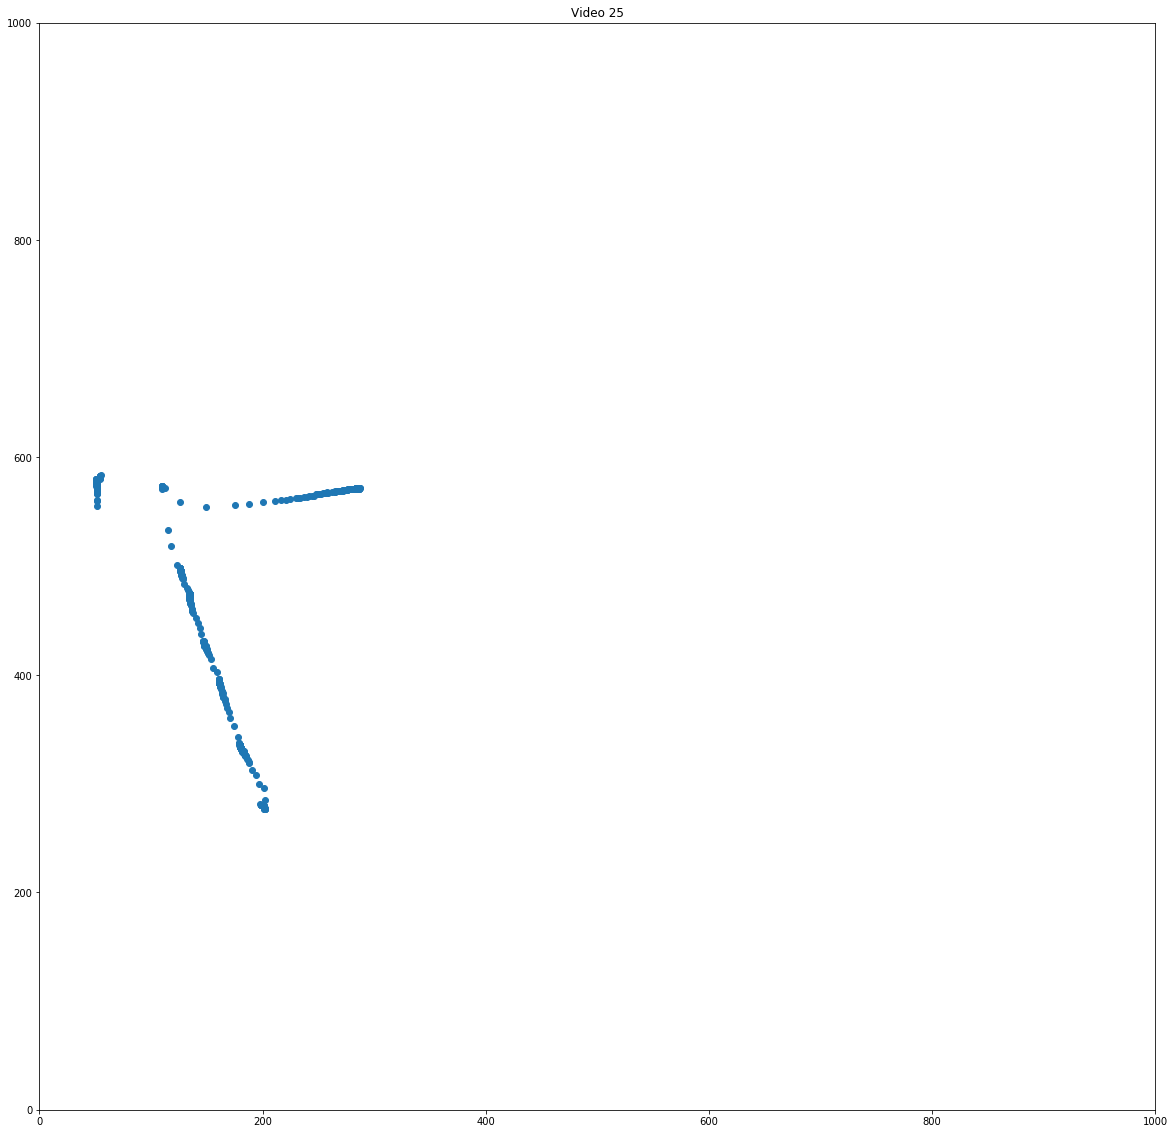

0.0 % tracked poorly


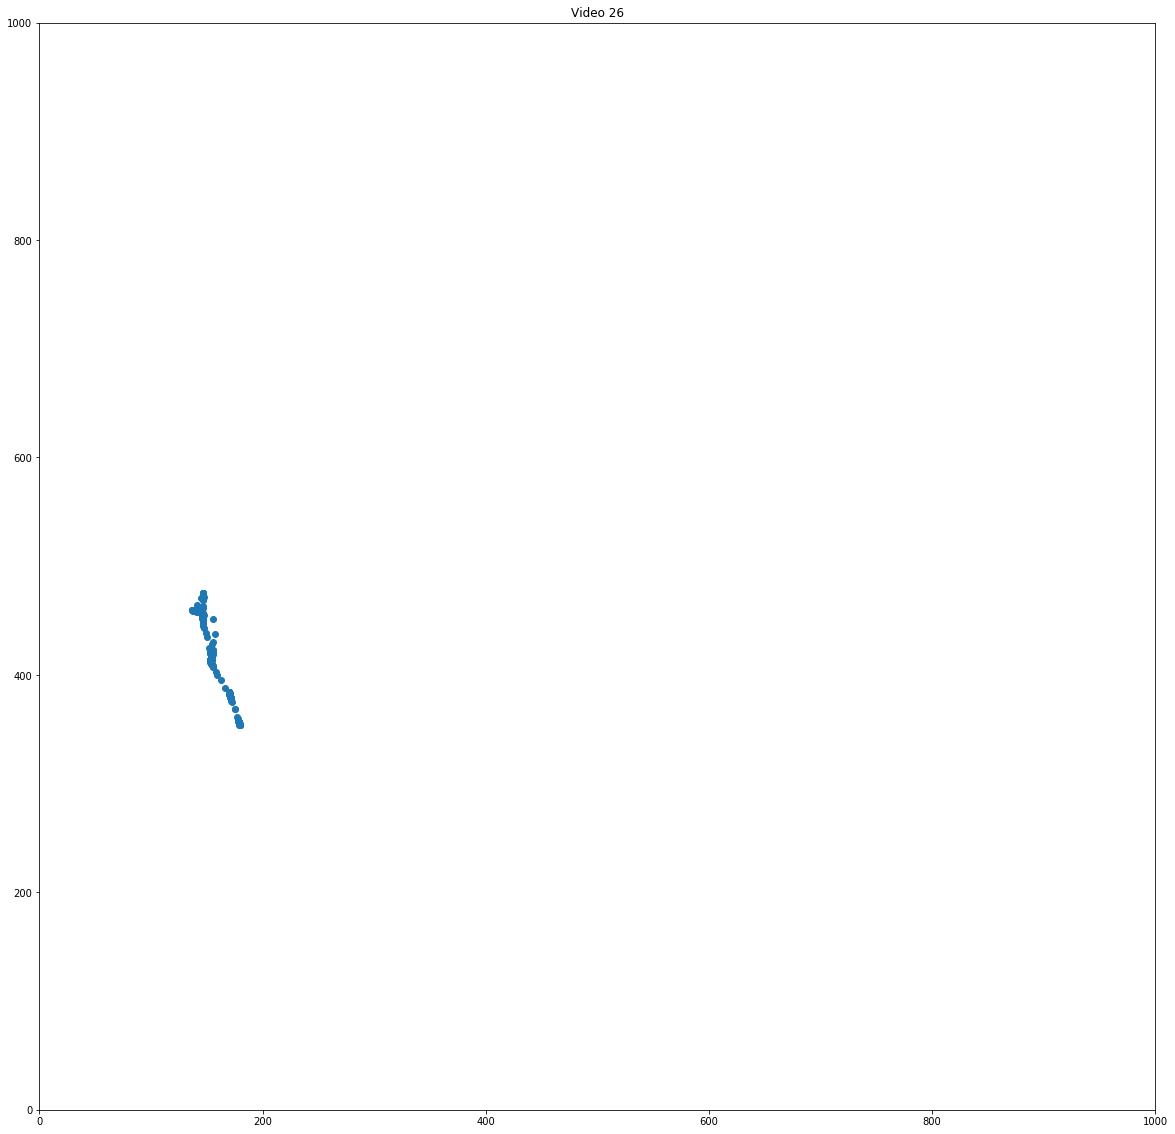

0.0 % tracked poorly


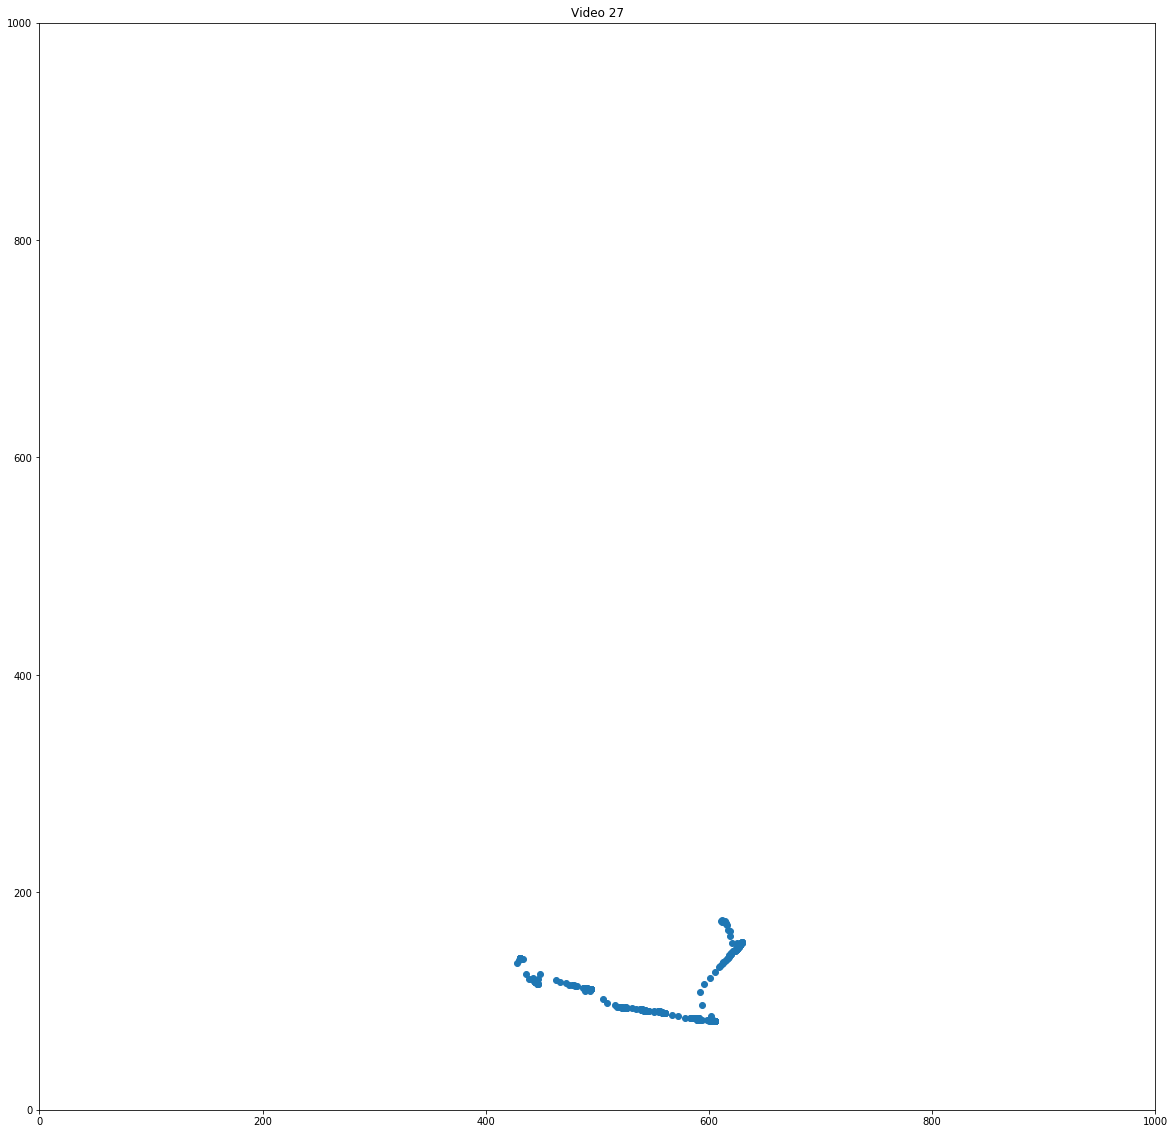

0.0 % tracked poorly


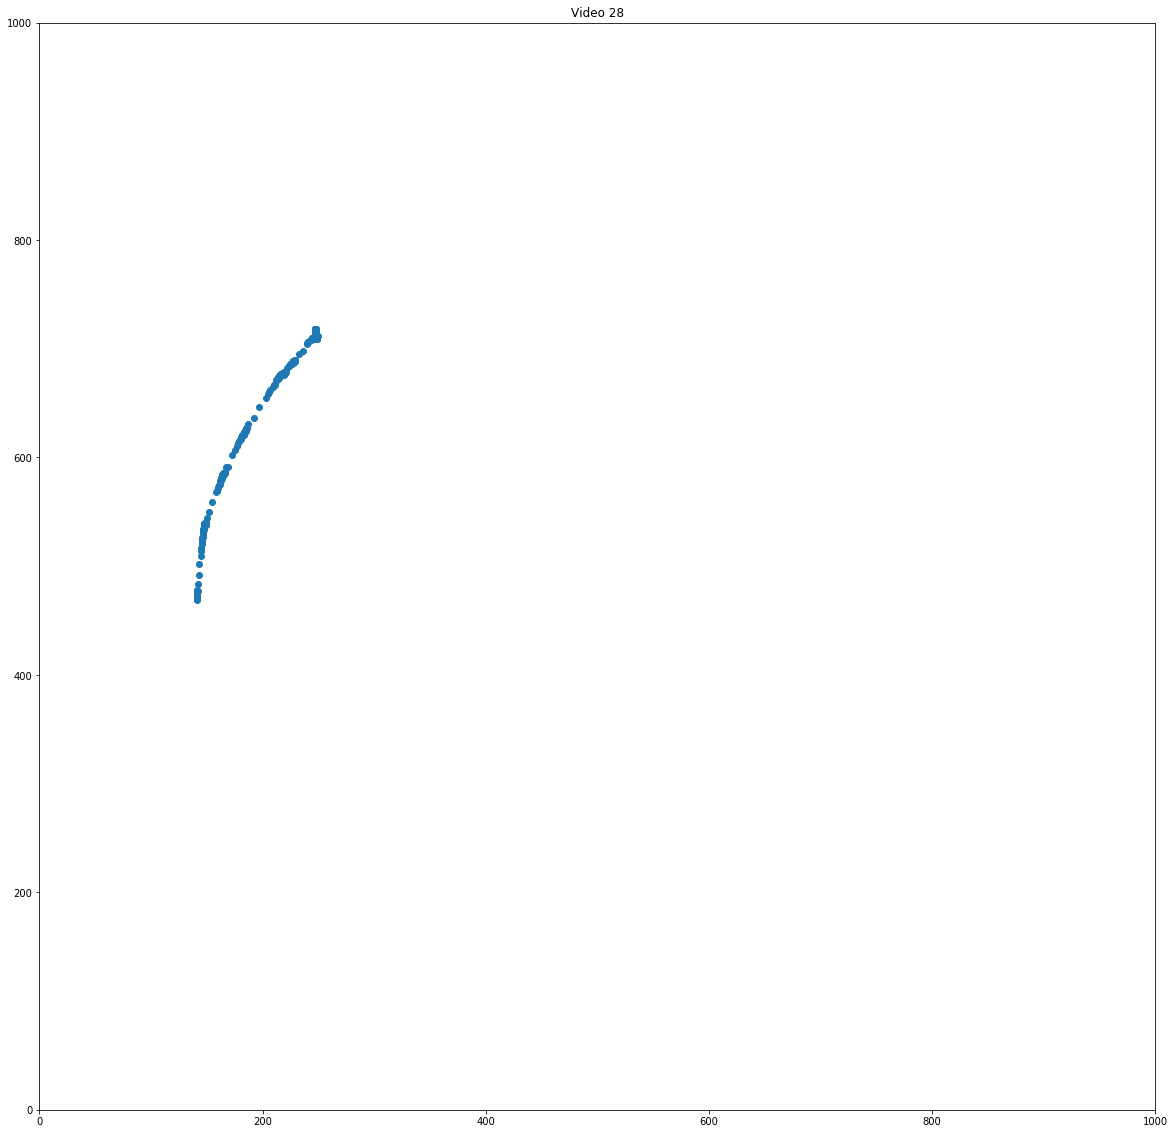

0.0 % tracked poorly


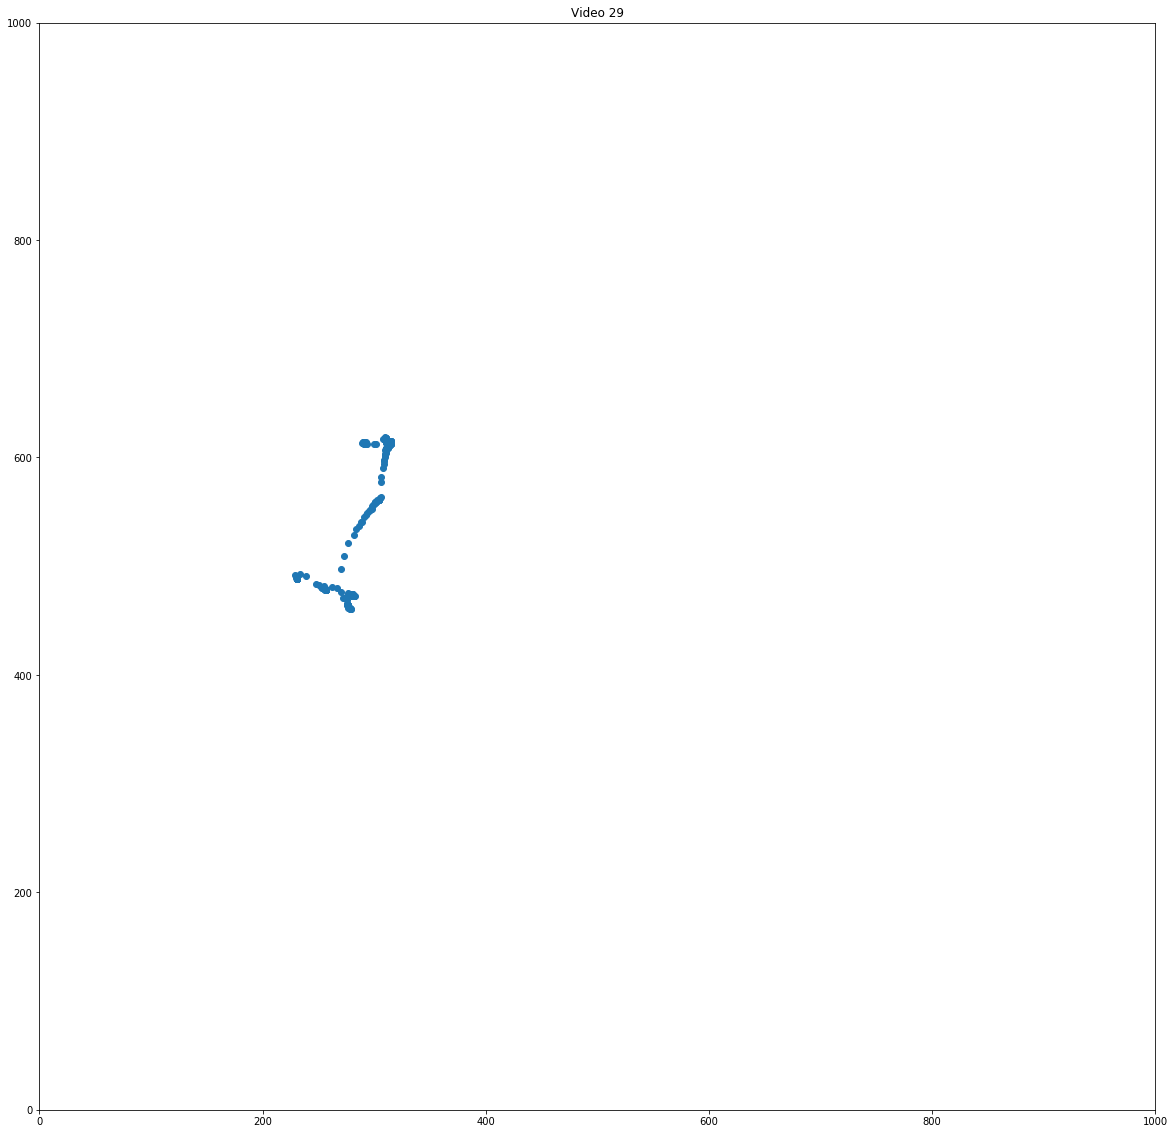

0.0 % tracked poorly


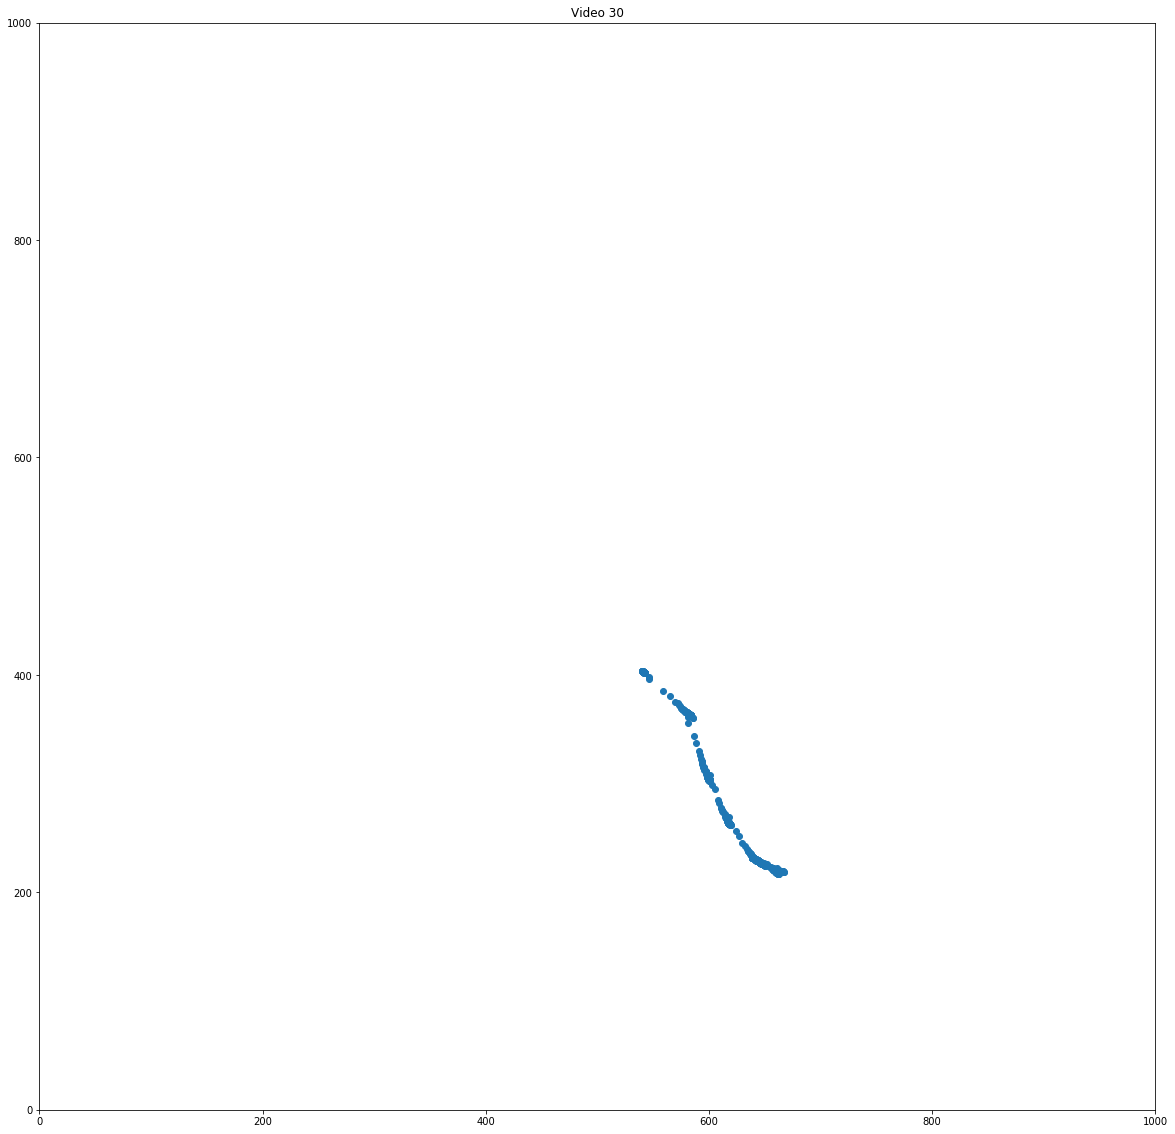

0.0 % tracked poorly


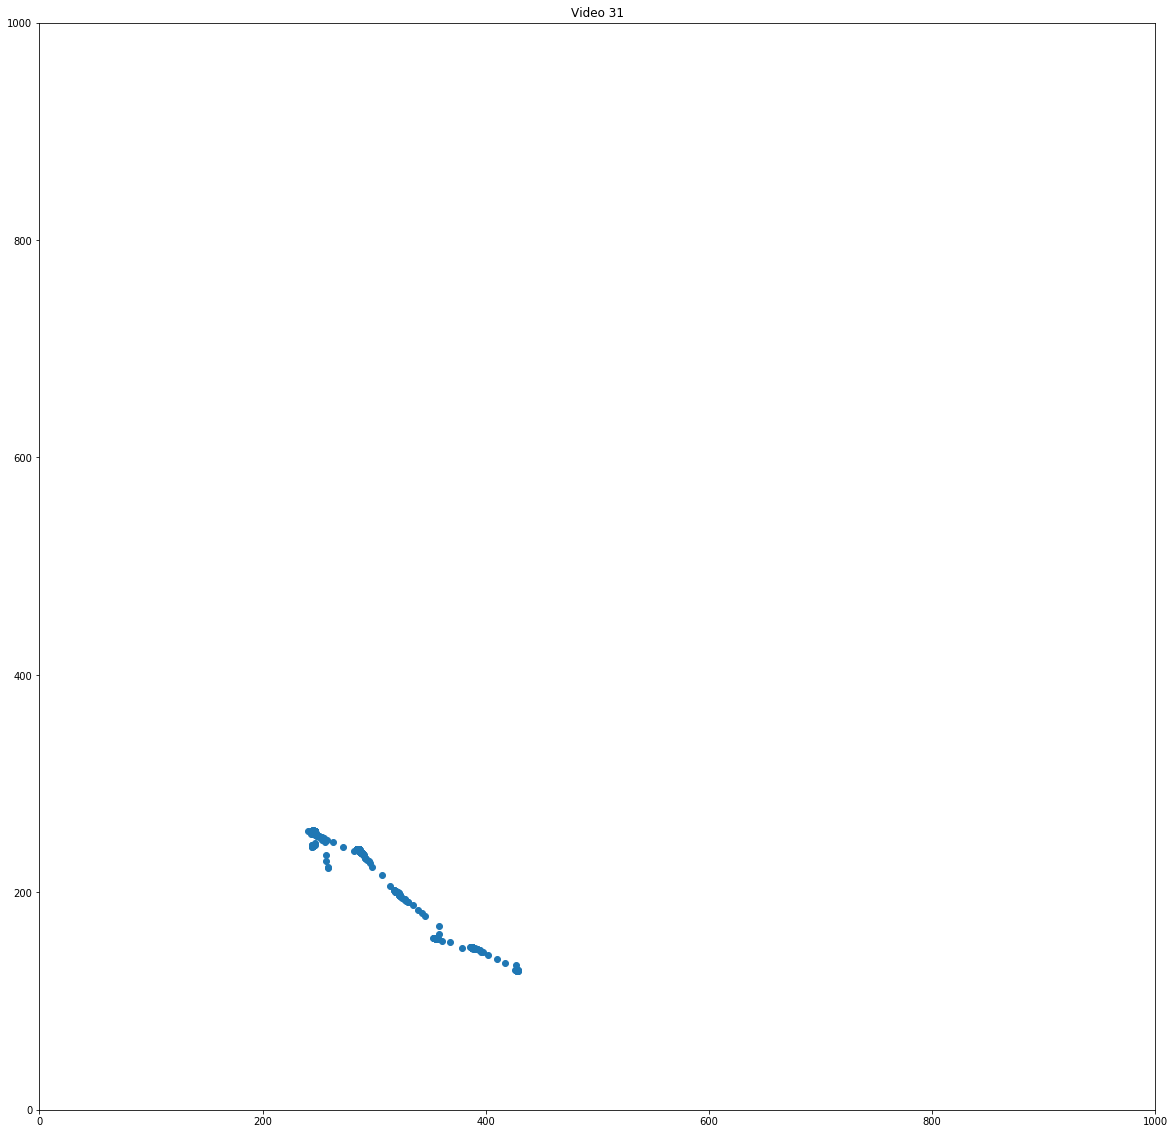

0.0 % tracked poorly


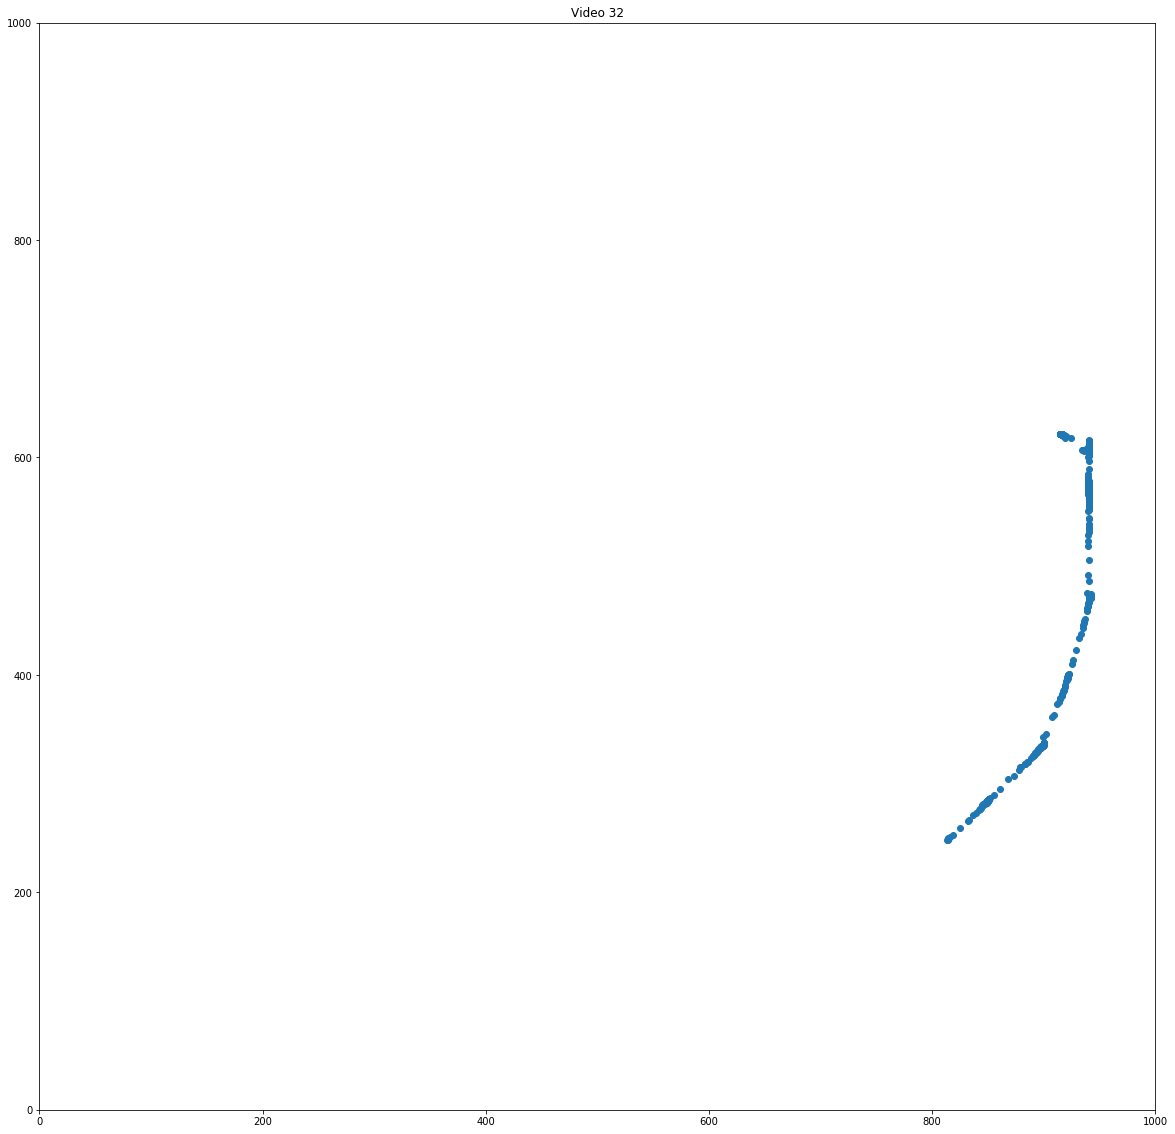

0.0 % tracked poorly


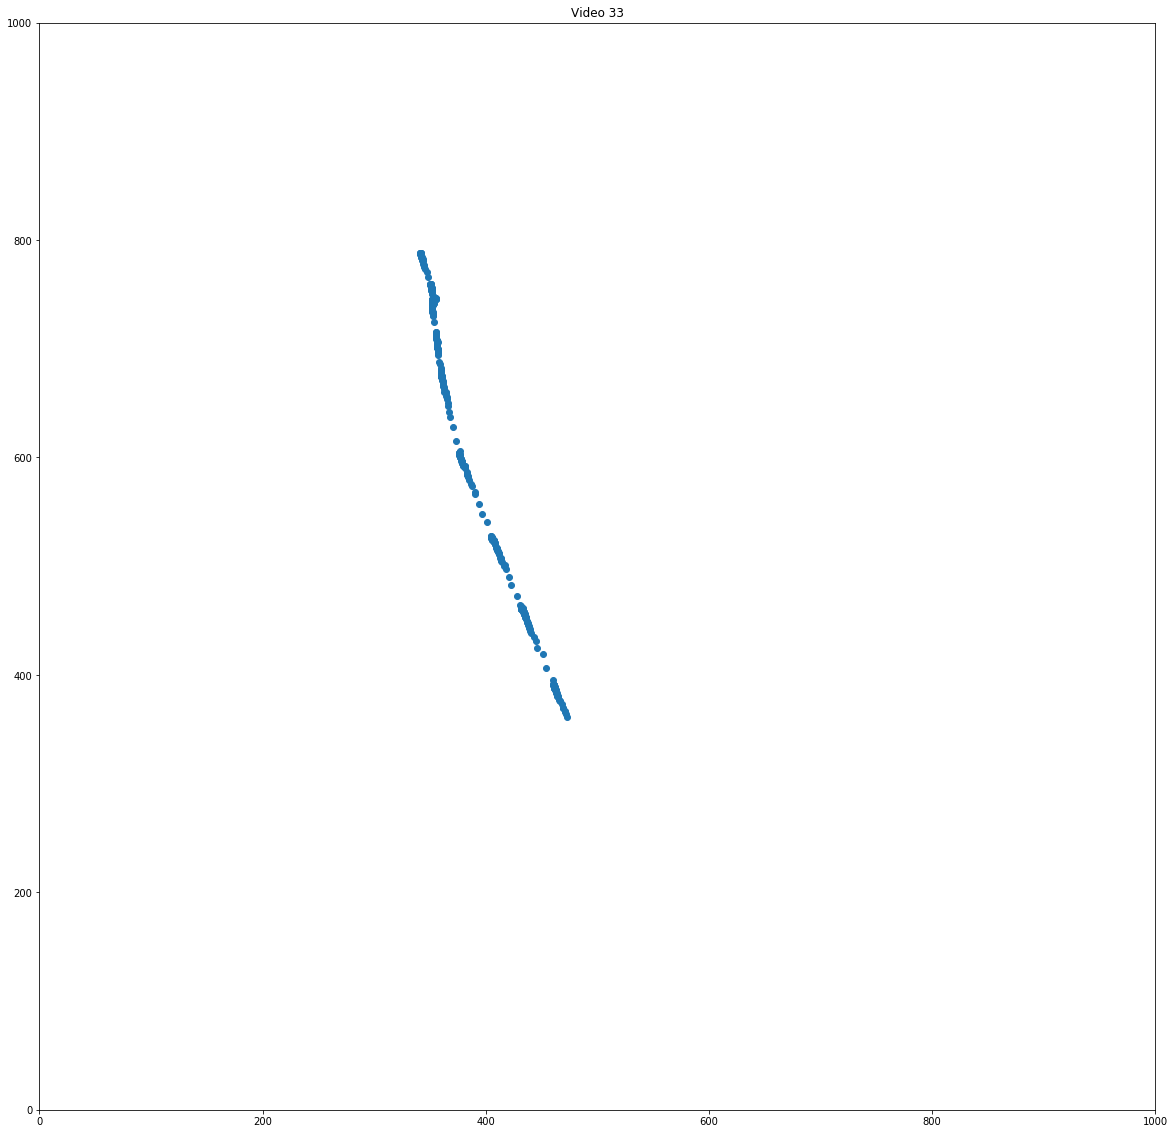

0.0 % tracked poorly


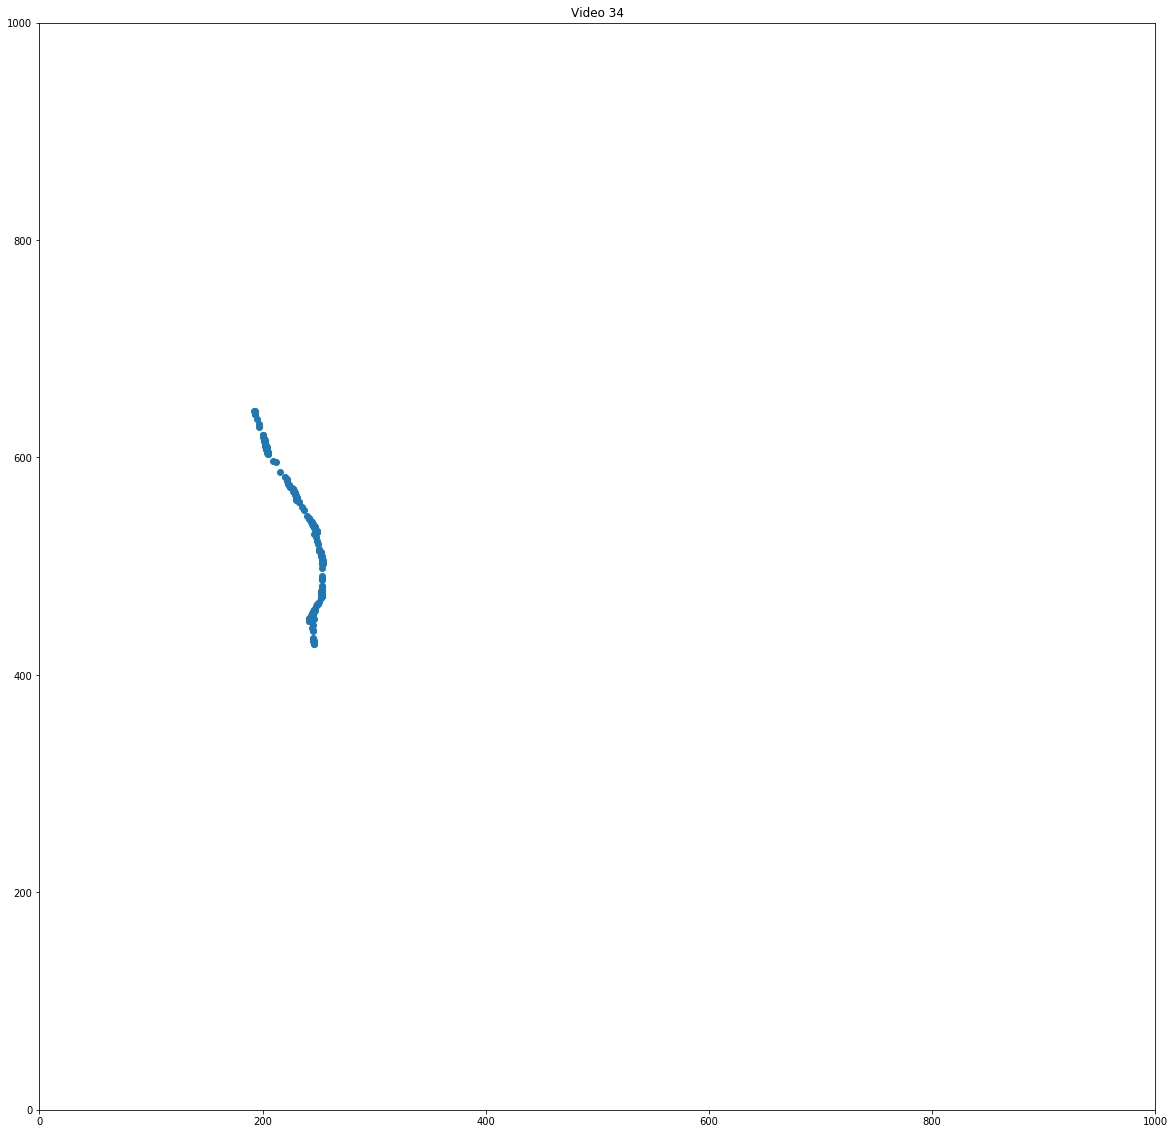

0.0 % tracked poorly


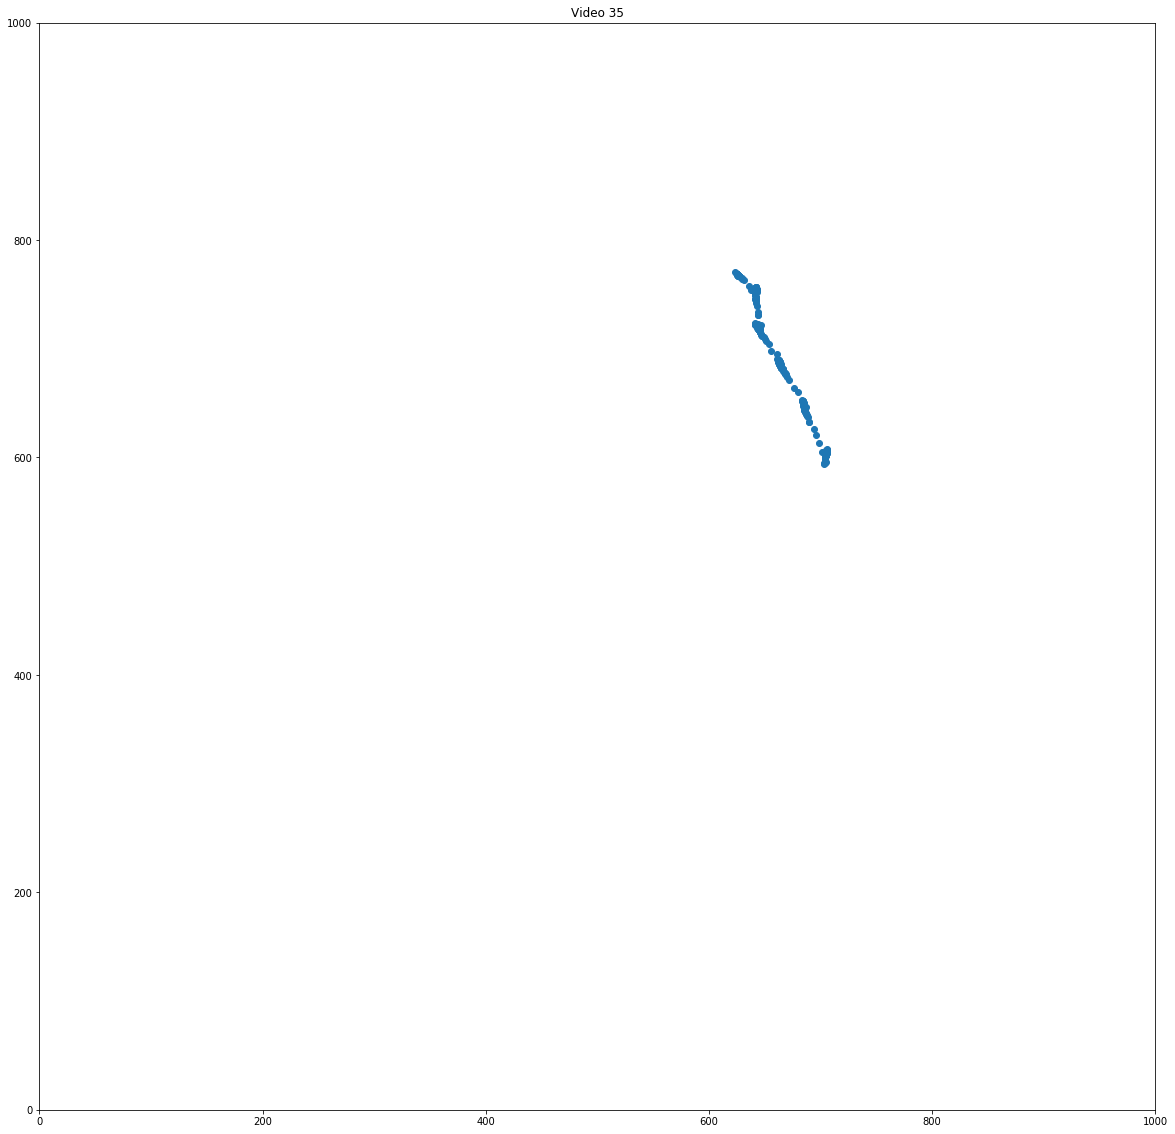

0.0 % tracked poorly


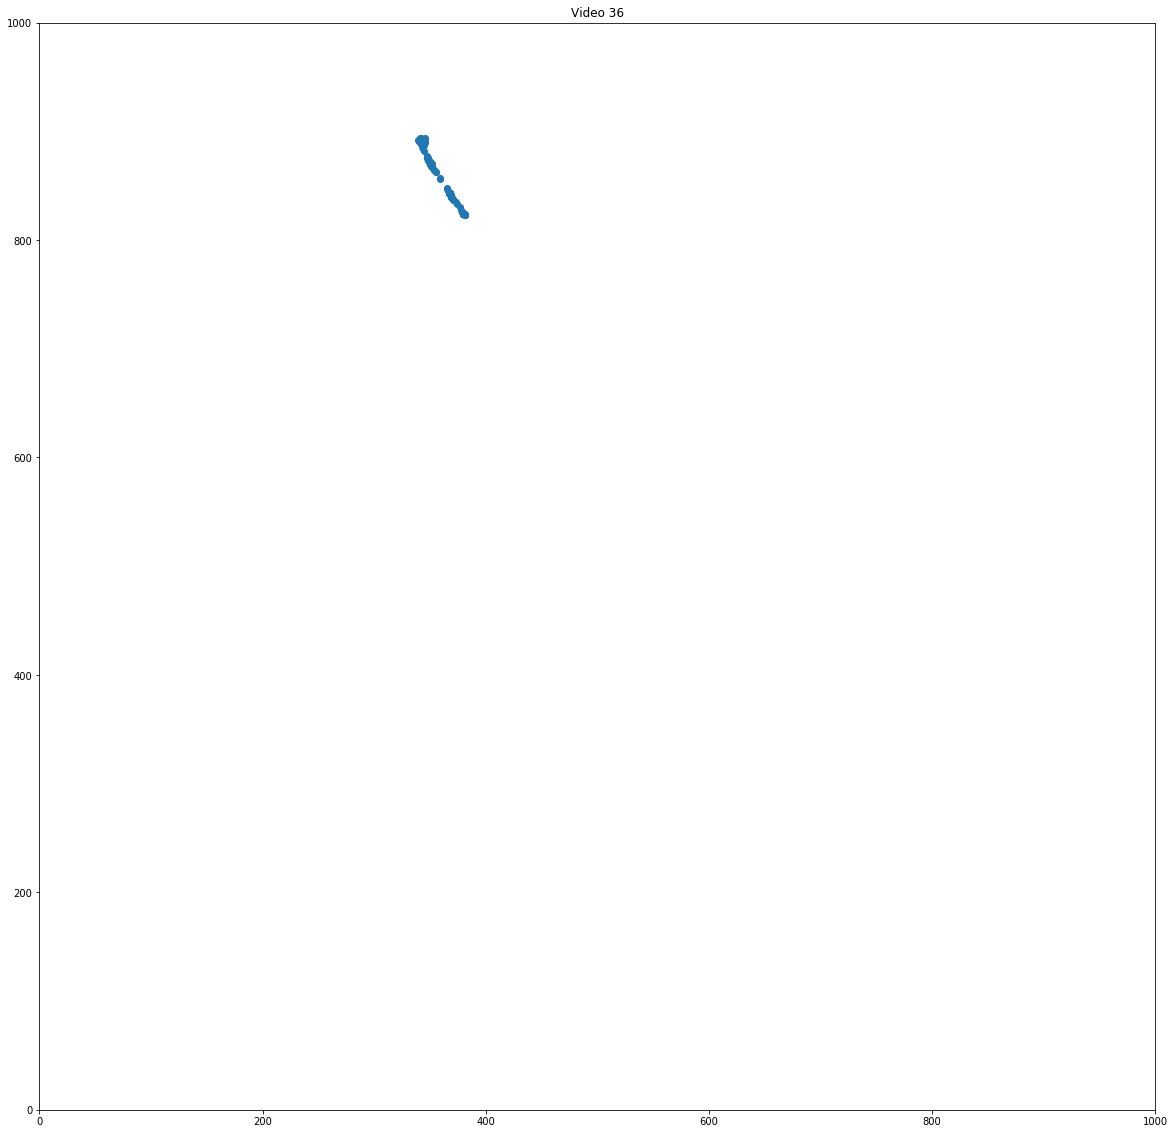

0.0 % tracked poorly


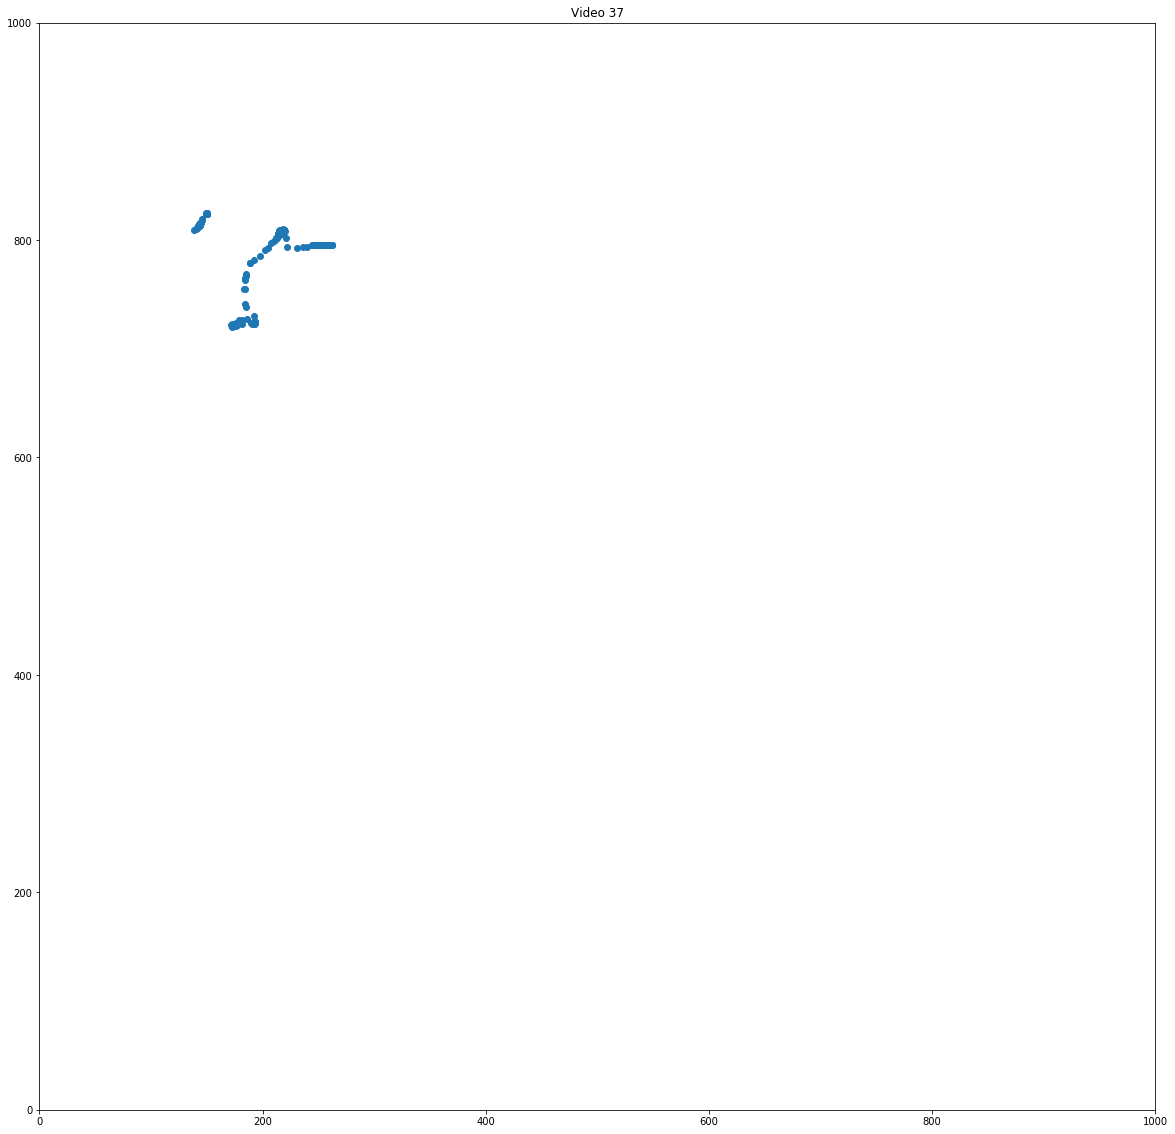

0.0 % tracked poorly


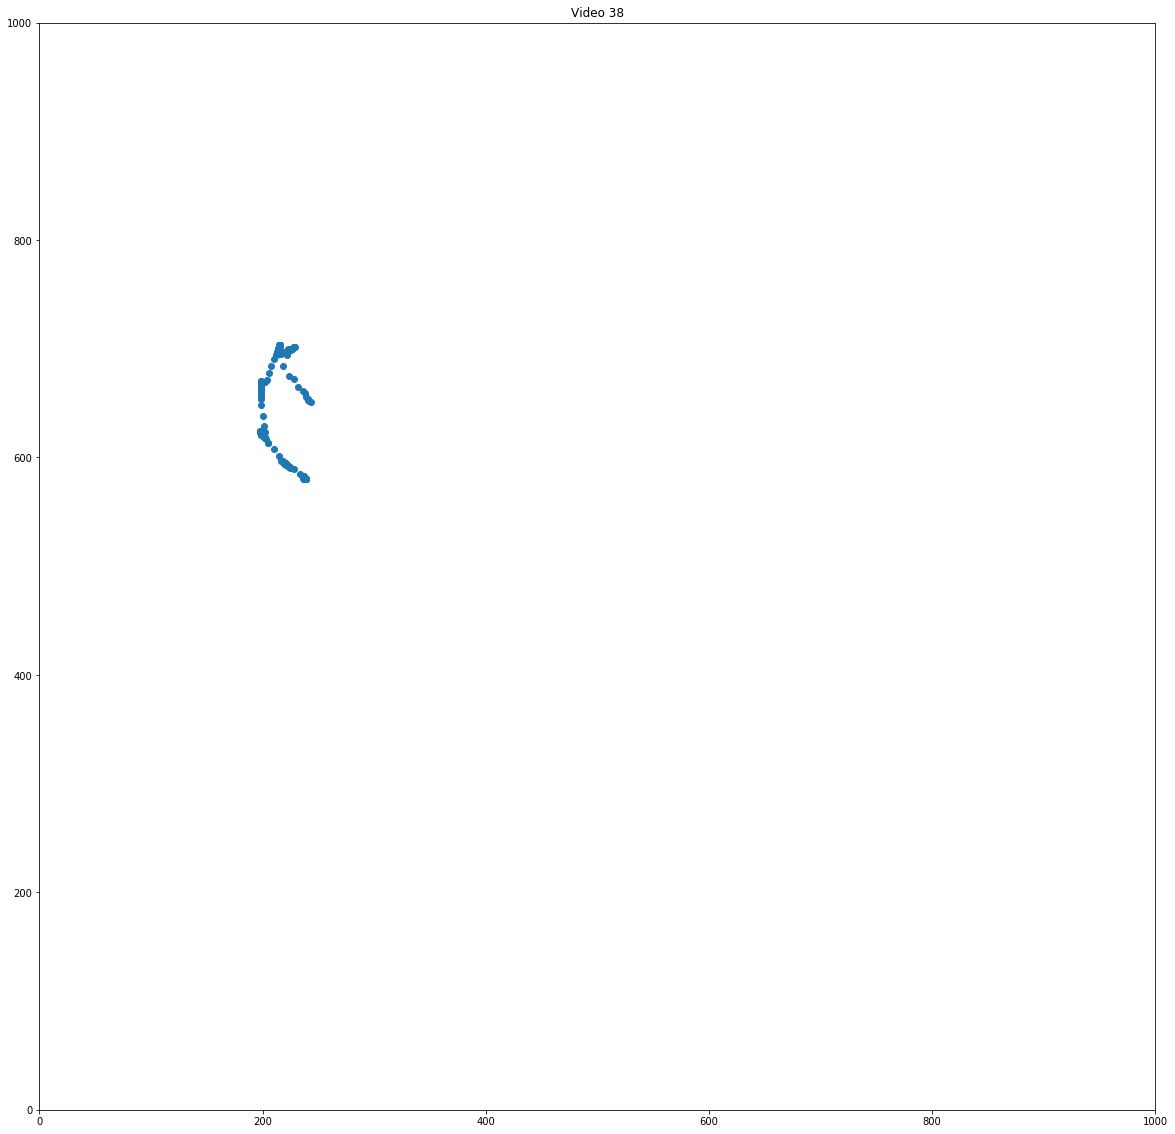

0.0 % tracked poorly


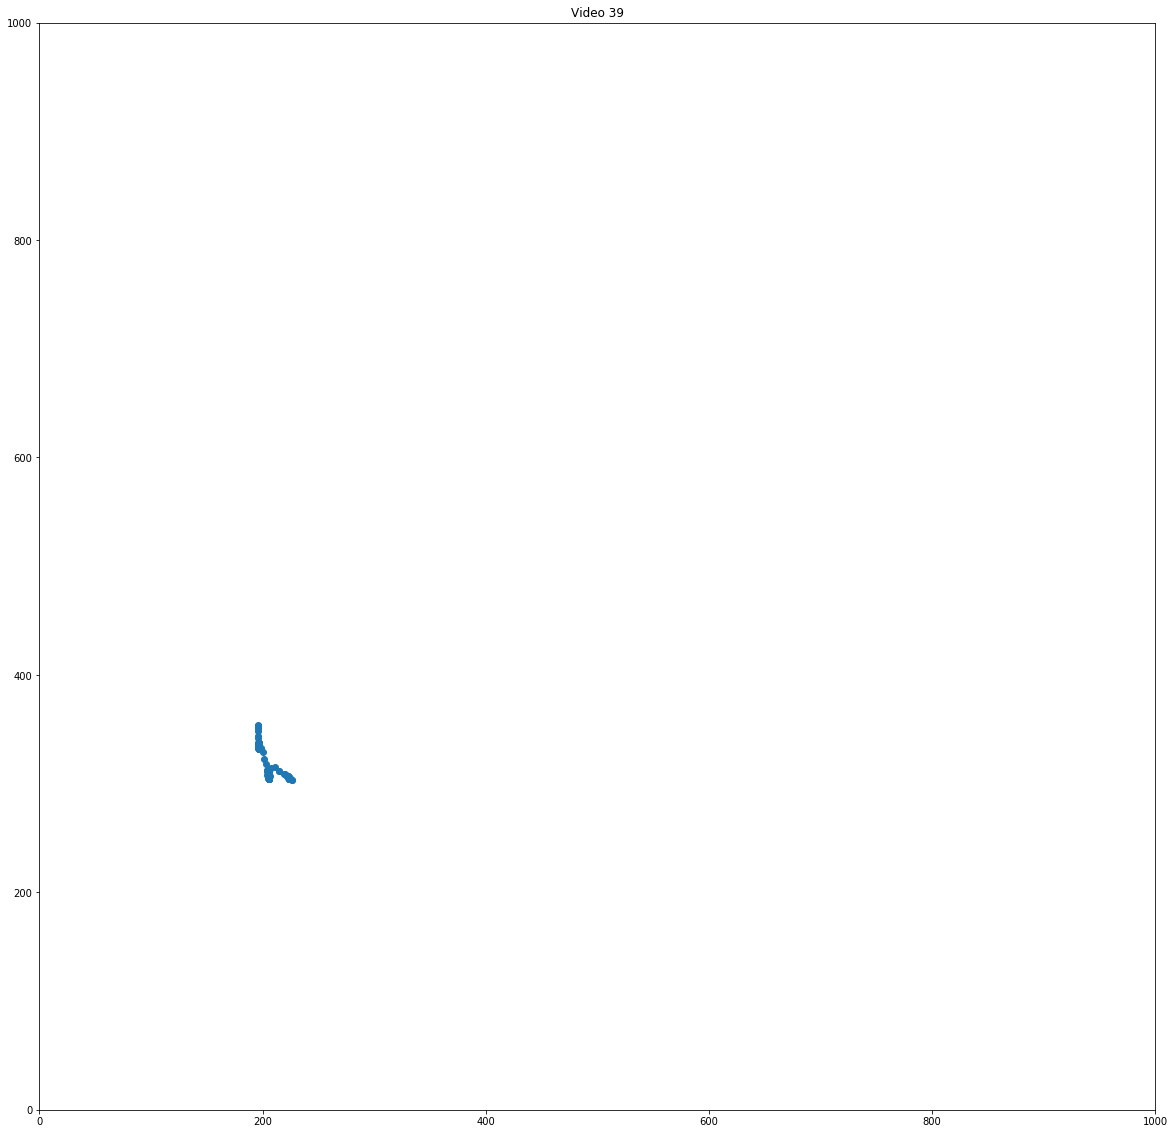

0.0 % tracked poorly


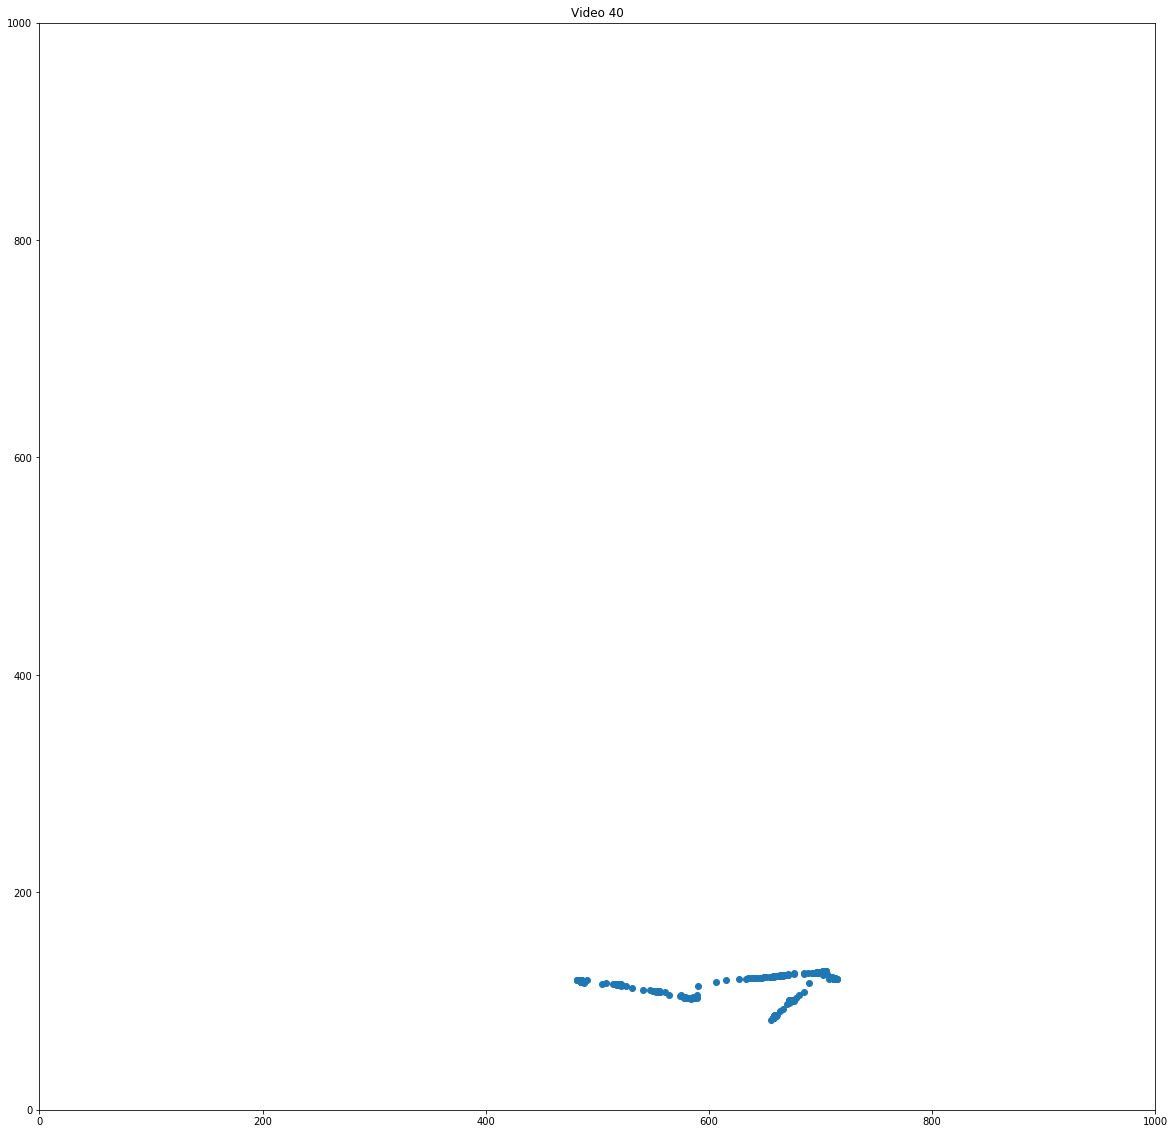

0.0 % tracked poorly


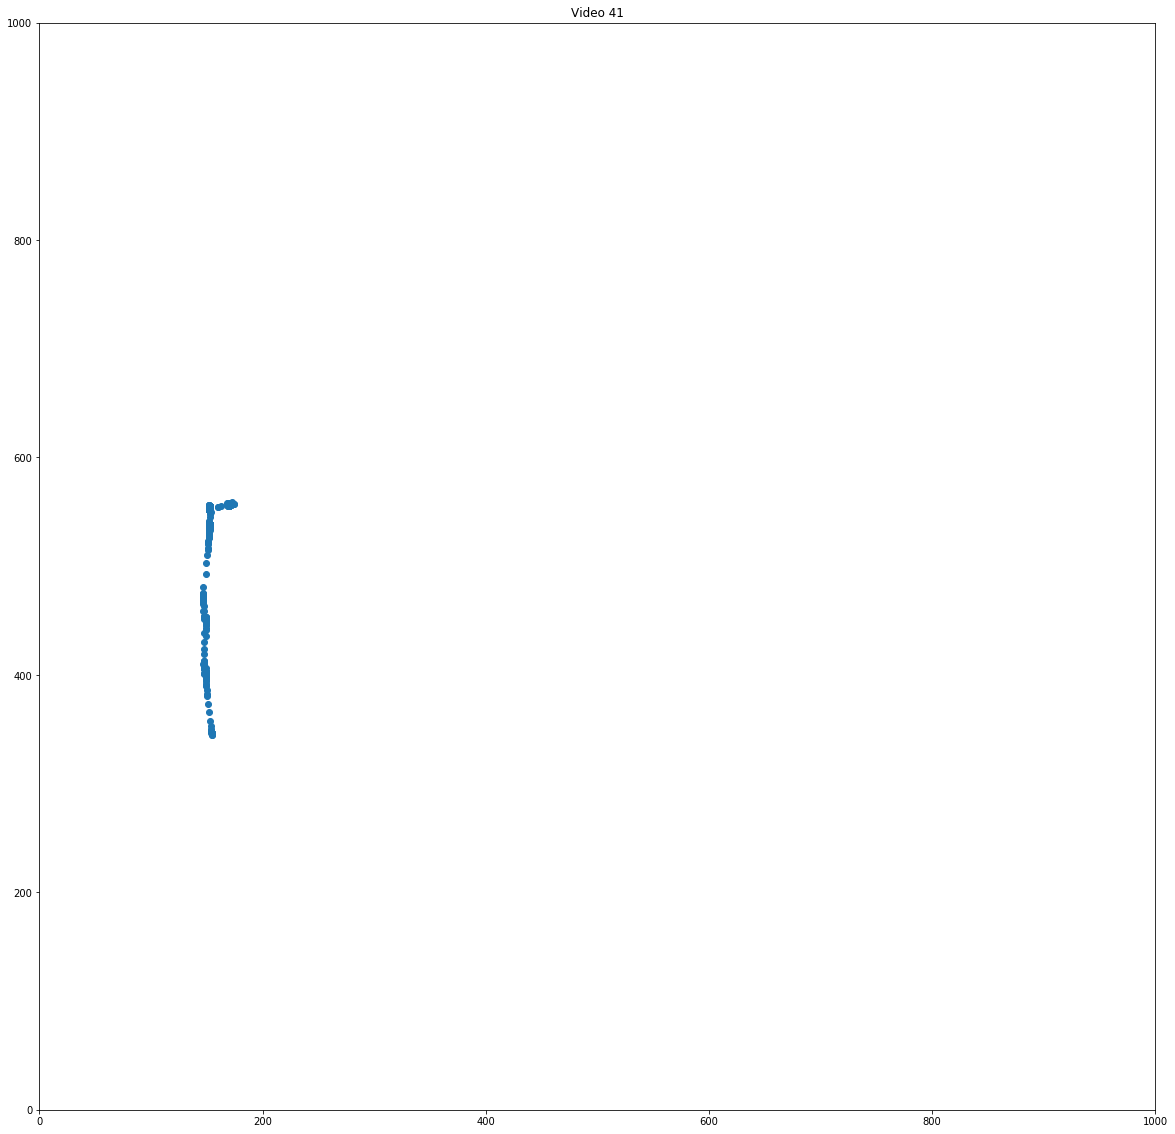

0.0 % tracked poorly


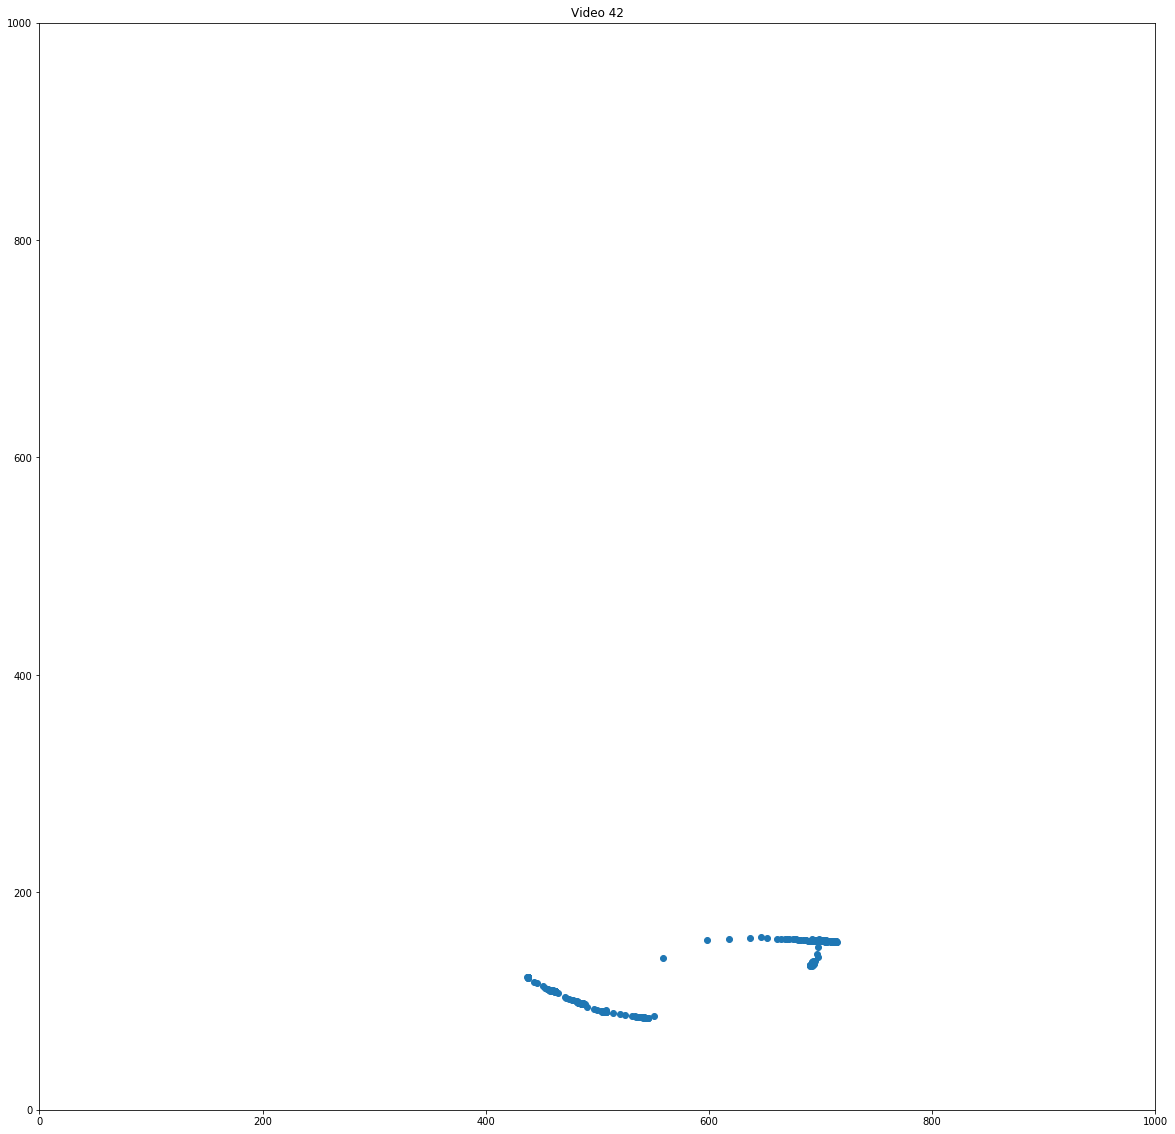

0.0 % tracked poorly


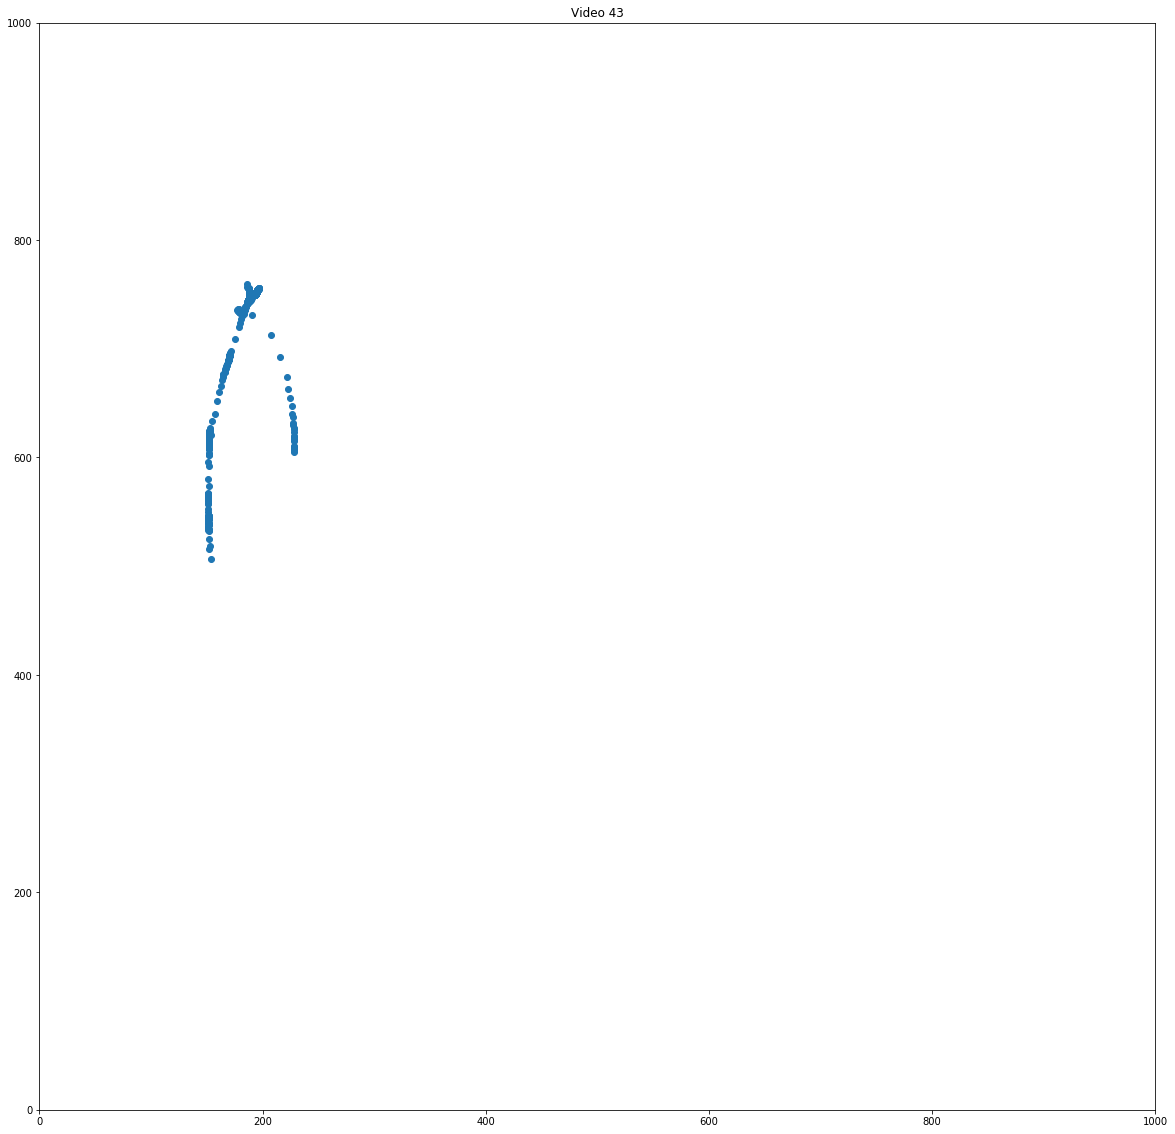

0.0 % tracked poorly


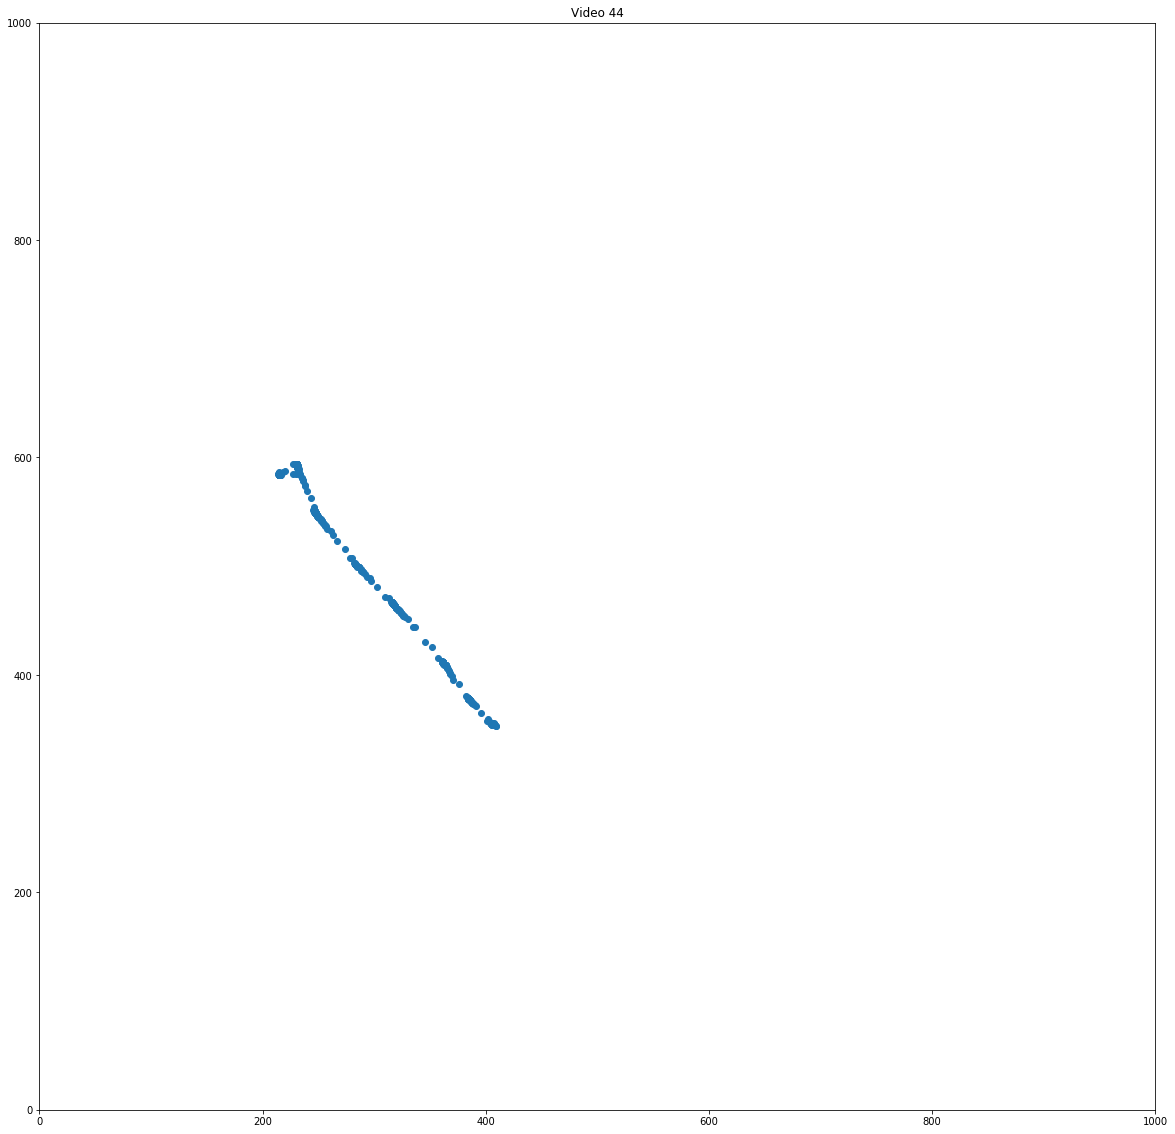

0.0 % tracked poorly


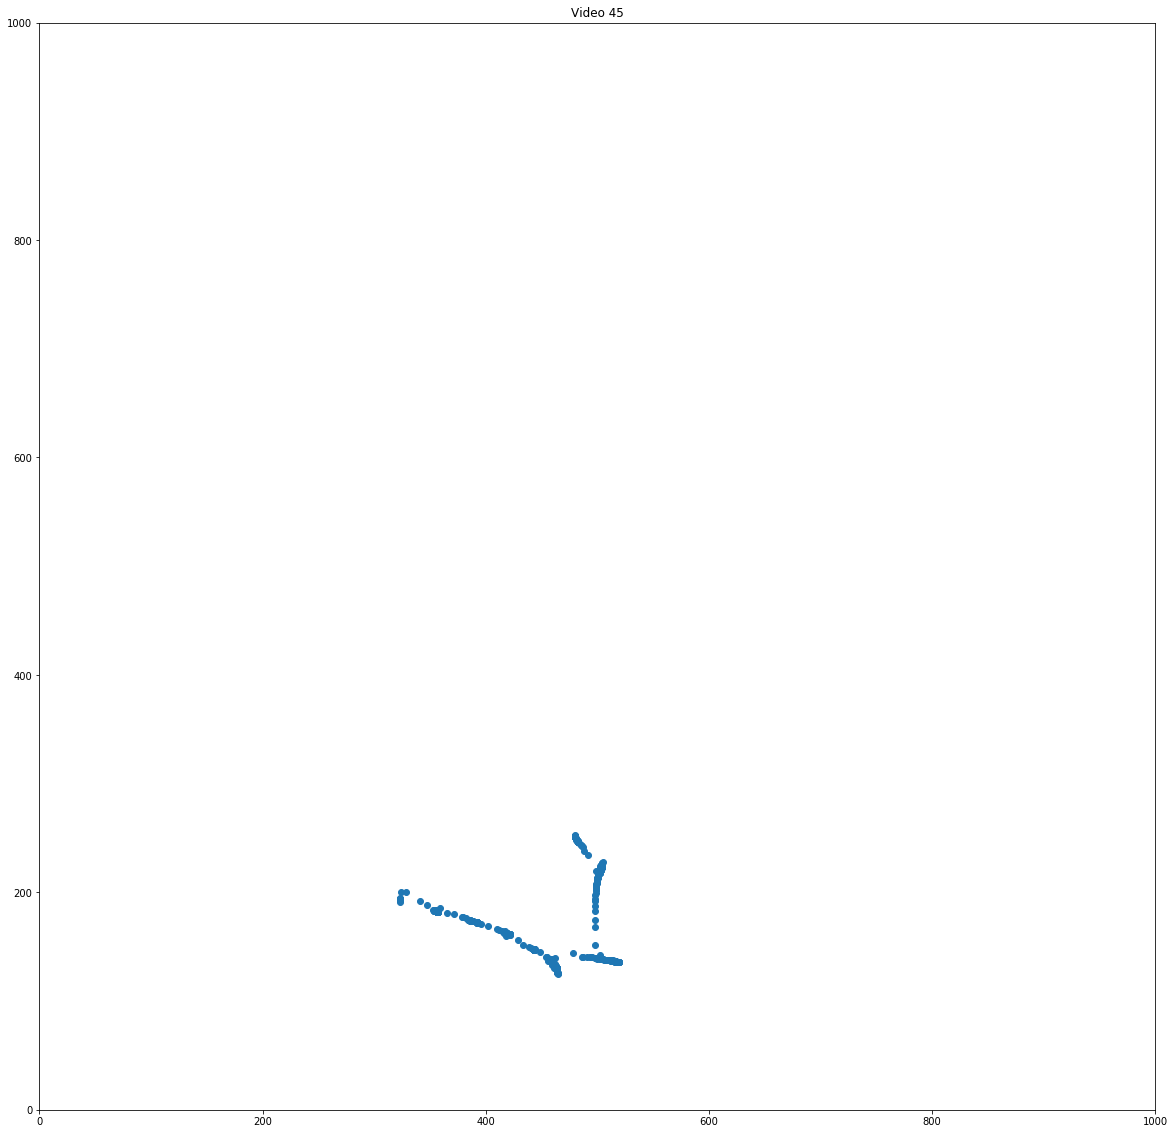

0.0 % tracked poorly


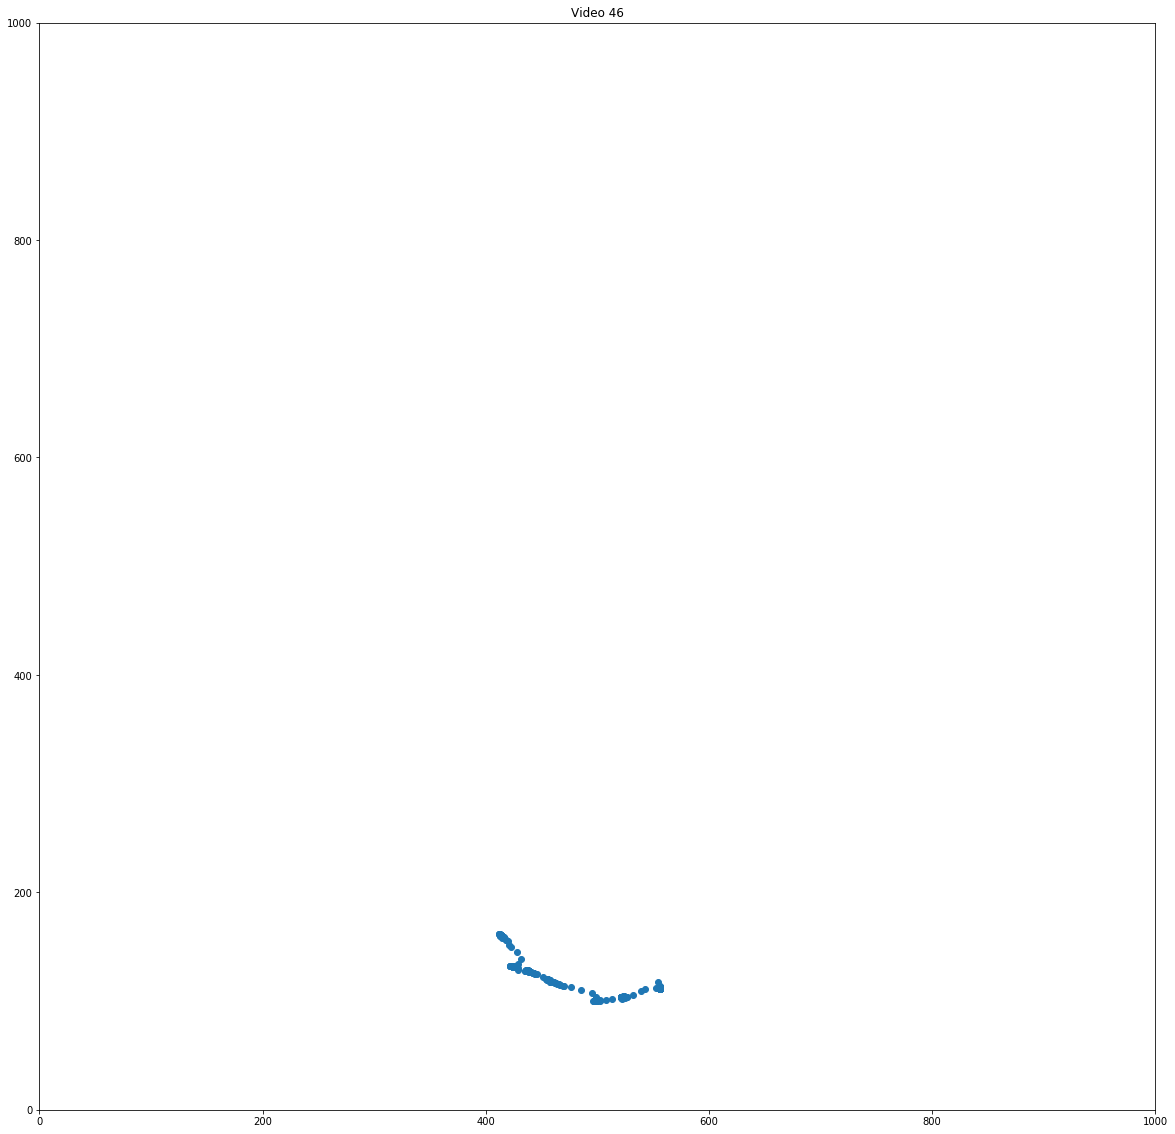

0.0 % tracked poorly


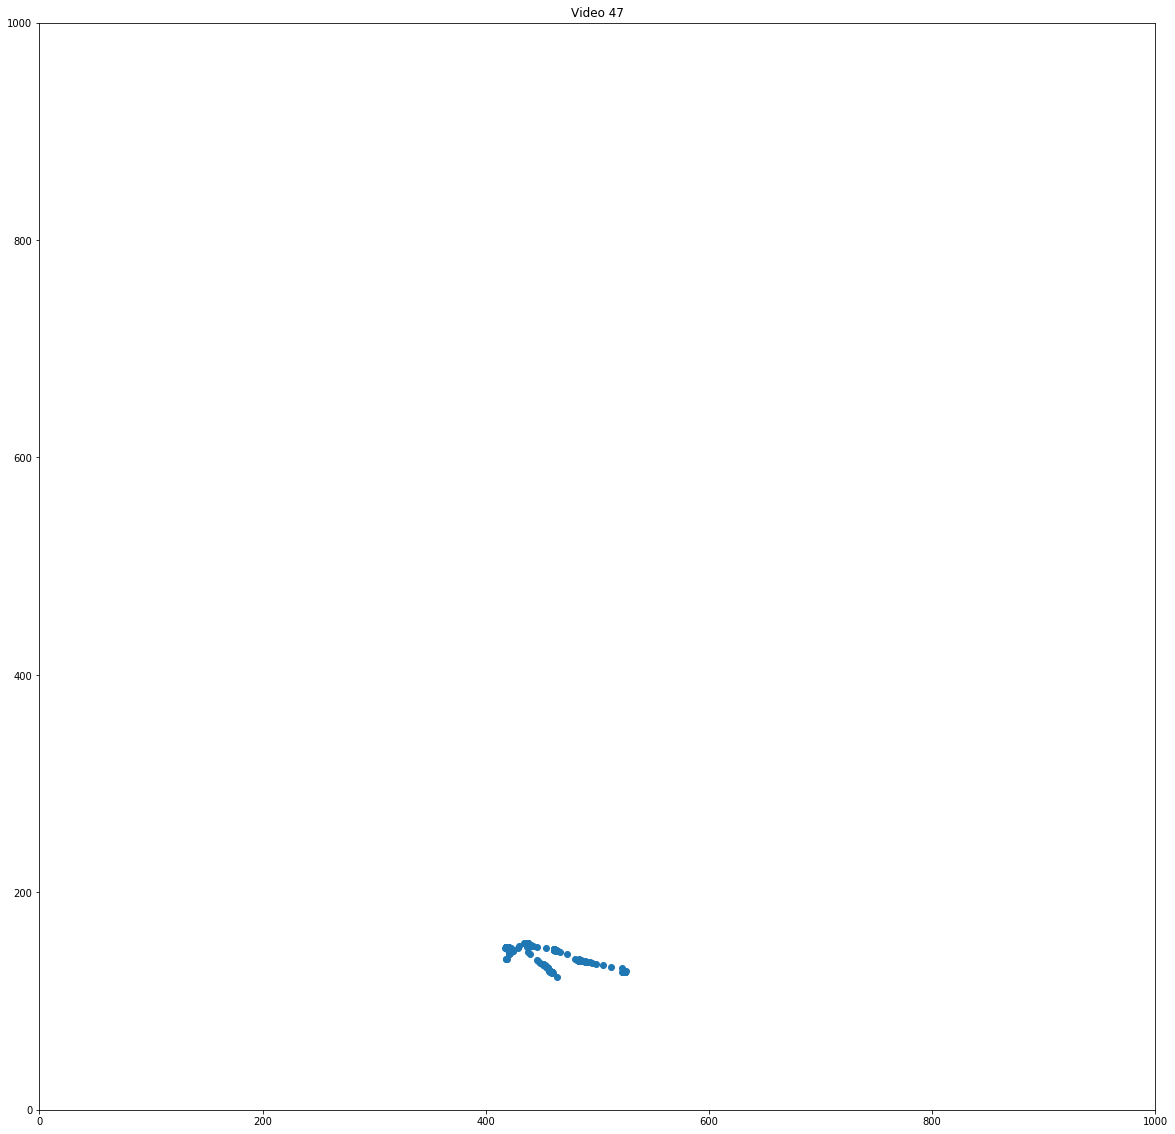

0.0 % tracked poorly


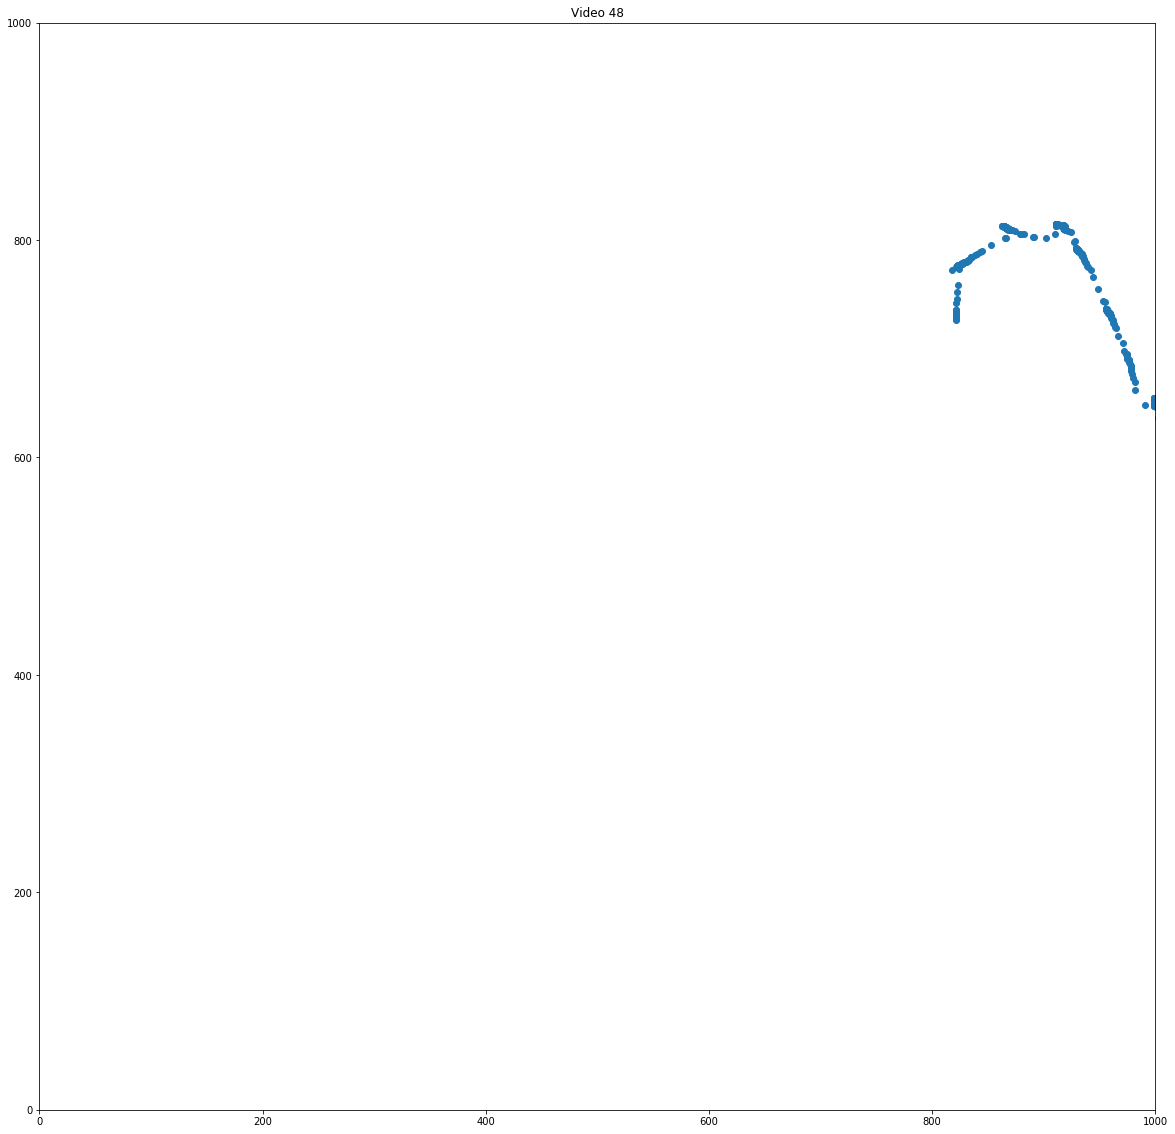

0.0 % tracked poorly


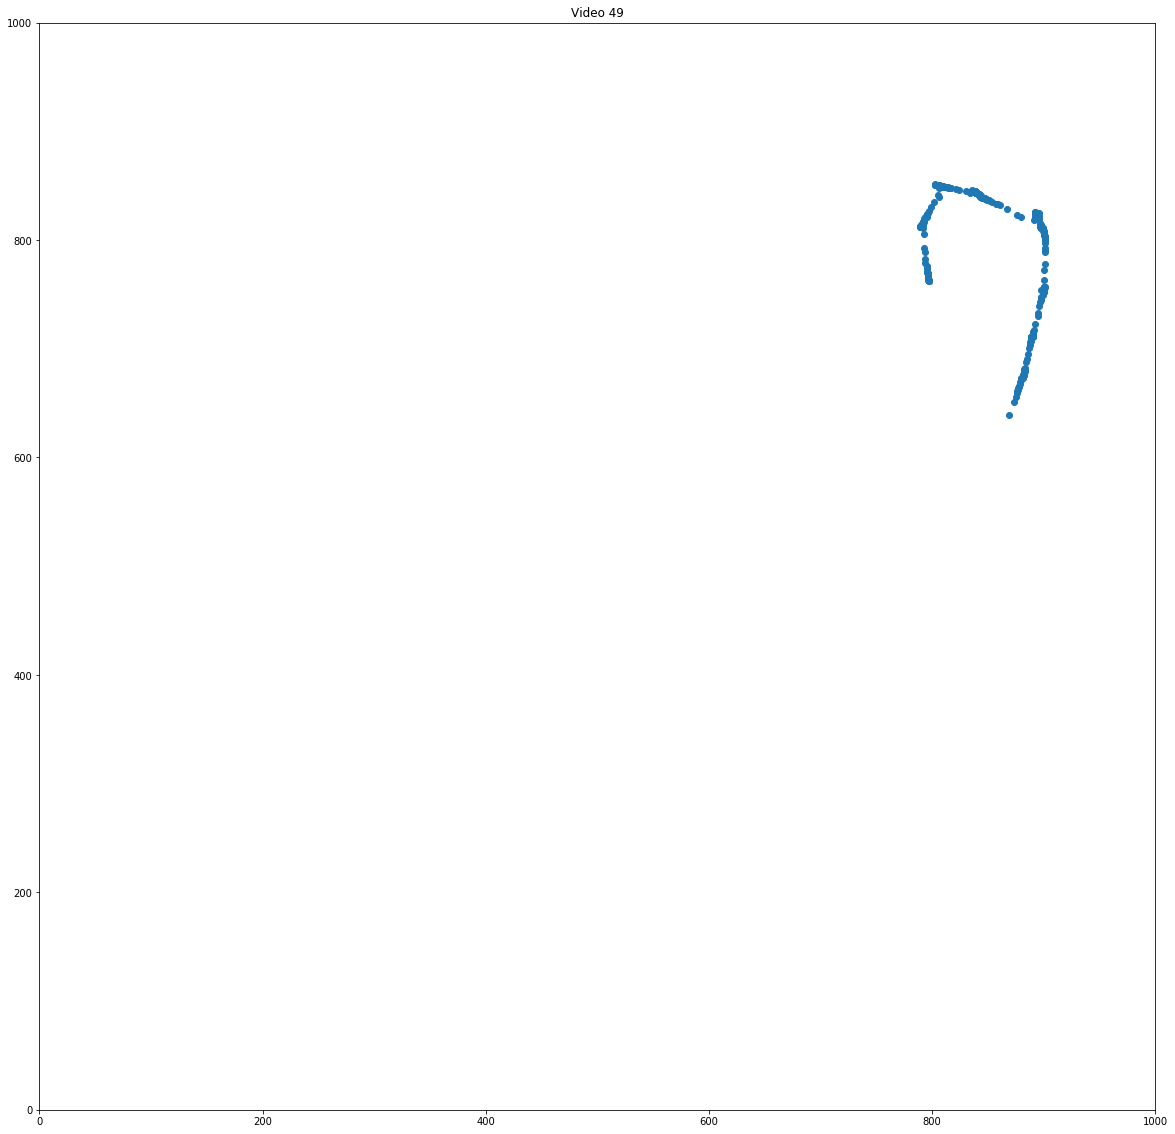

0.0 % tracked poorly


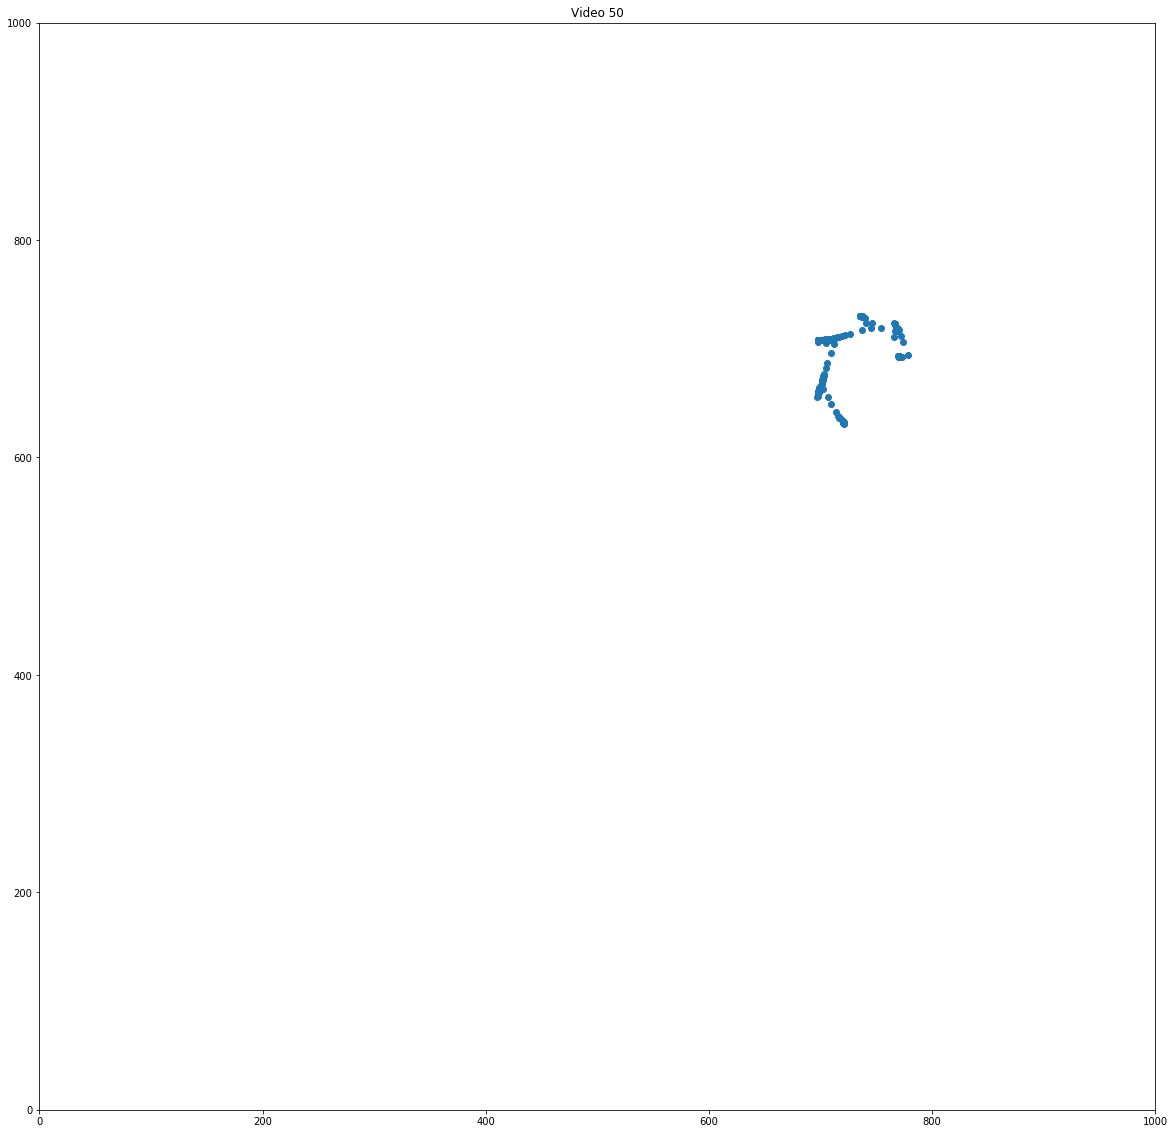

0.0 % tracked poorly


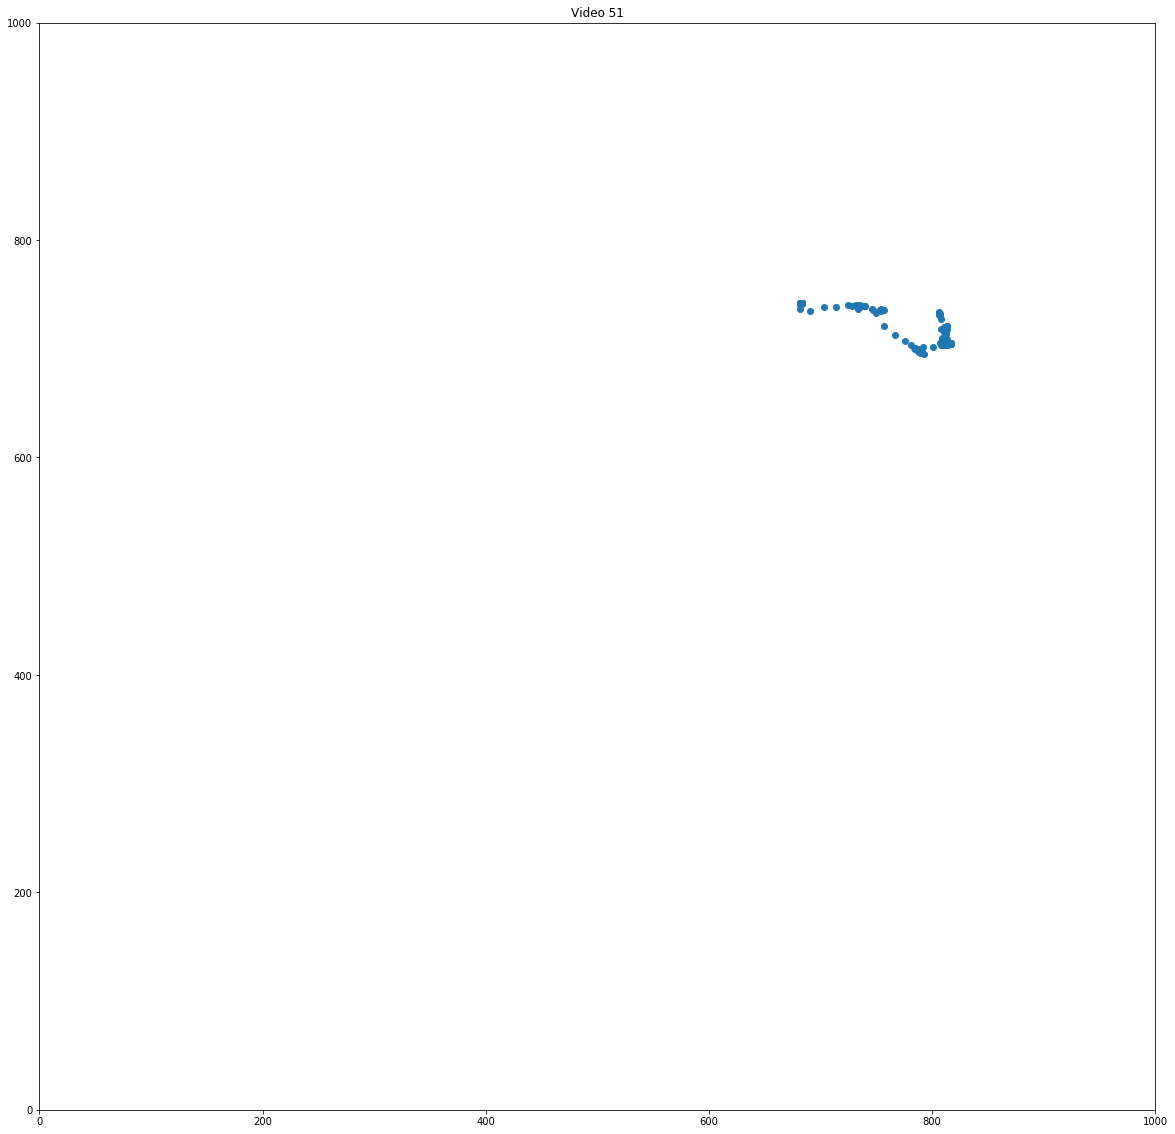

0.0 % tracked poorly


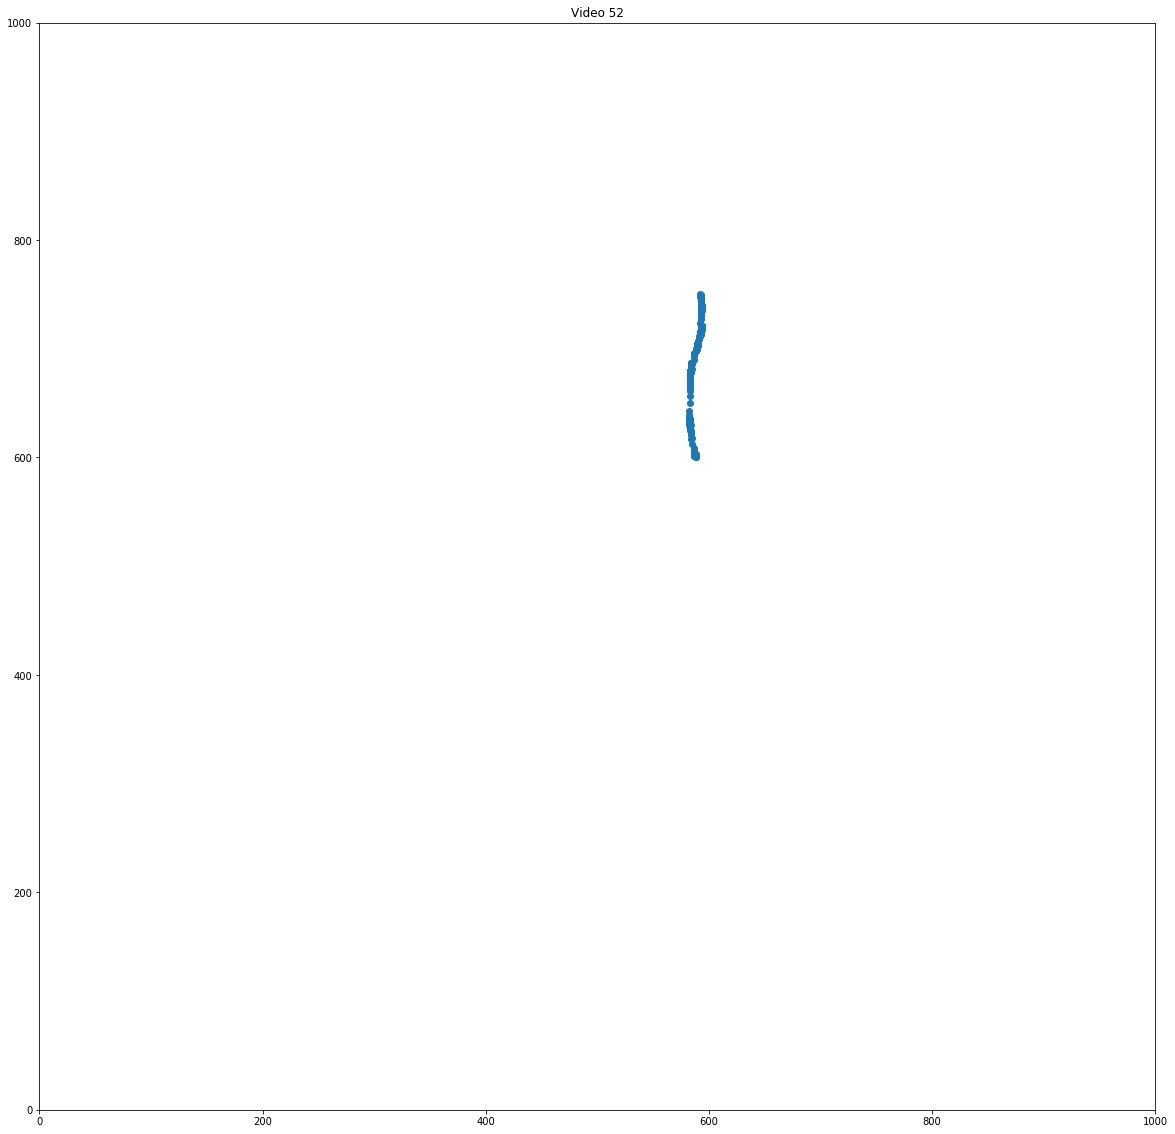

0.0 % tracked poorly


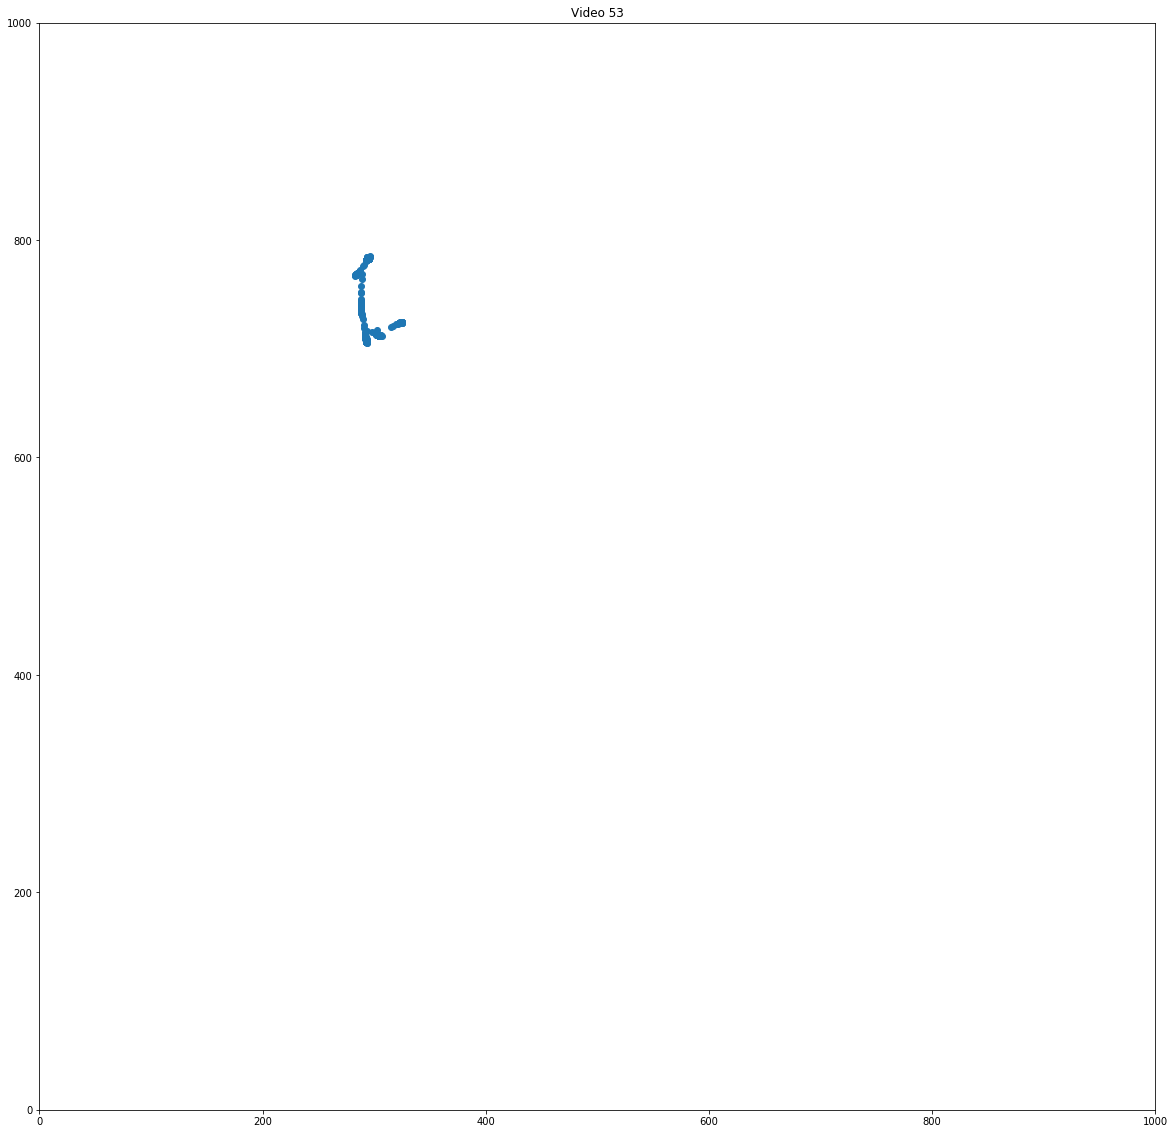

0.0 % tracked poorly


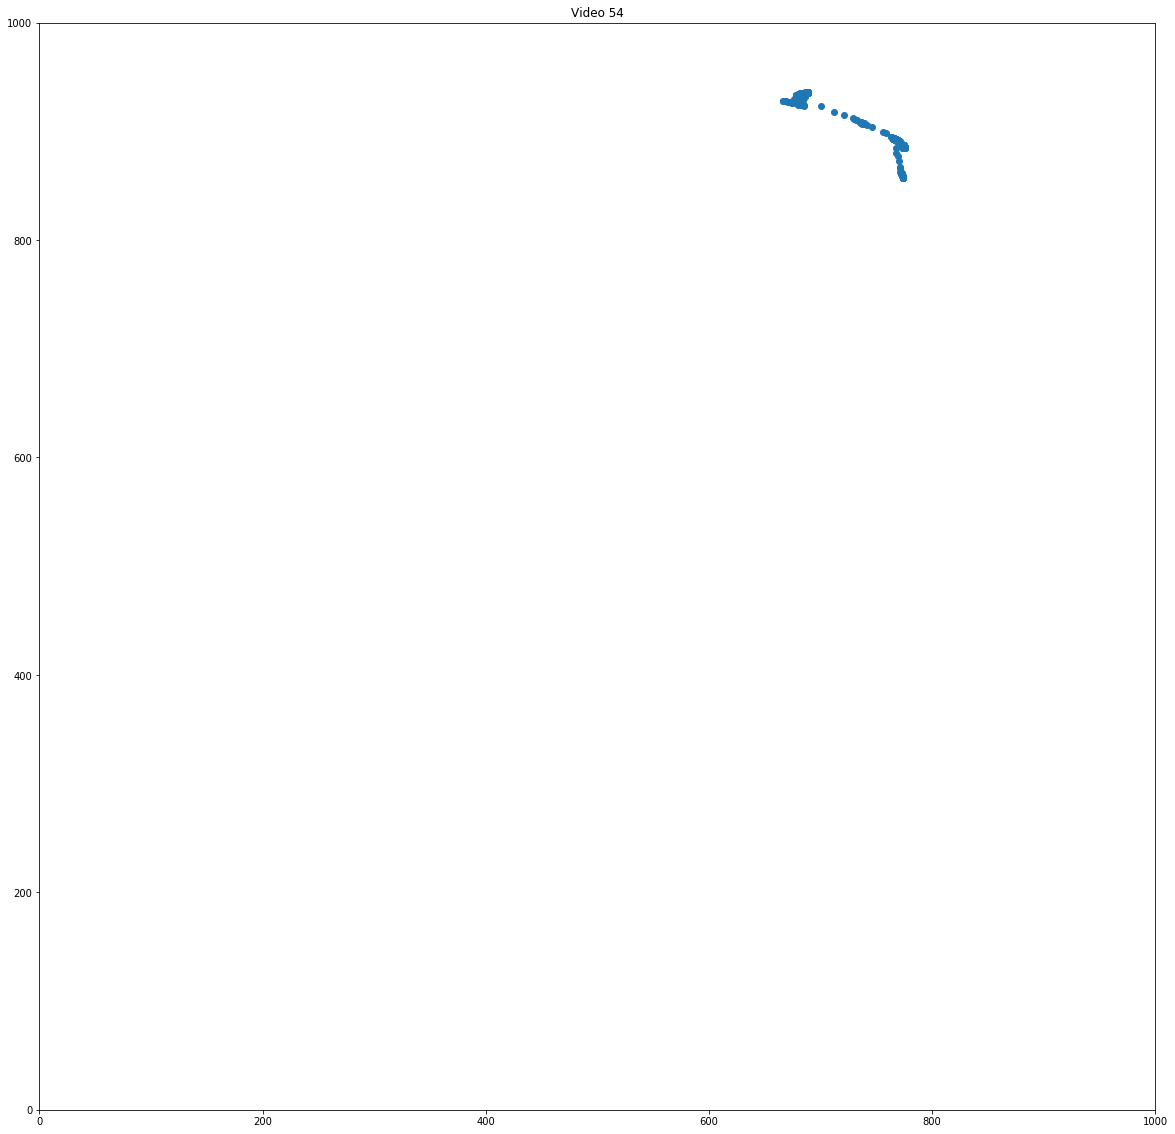

0.0 % tracked poorly


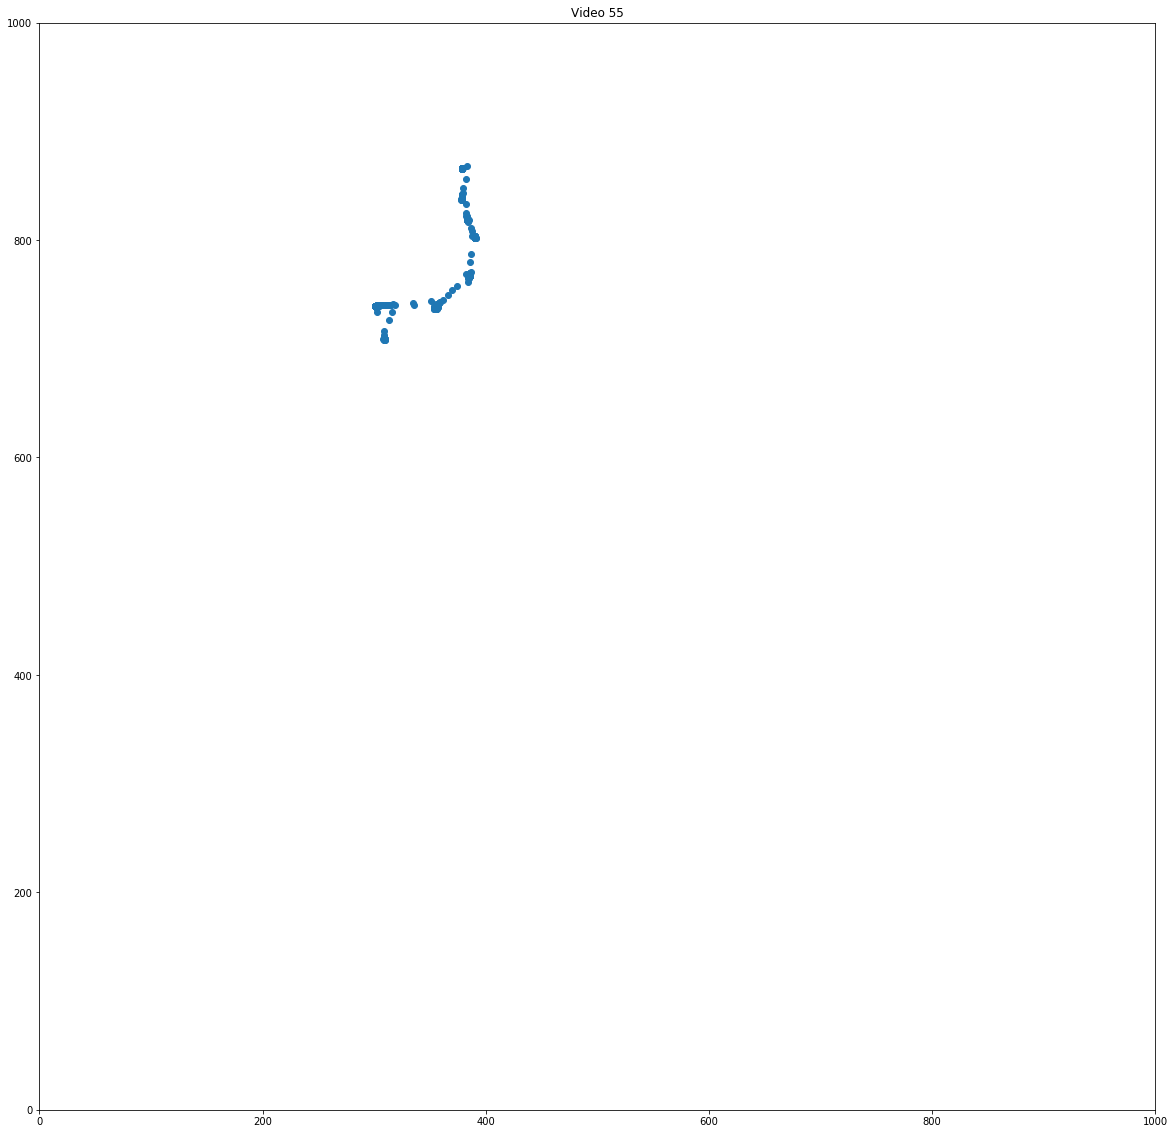

0.0 % tracked poorly


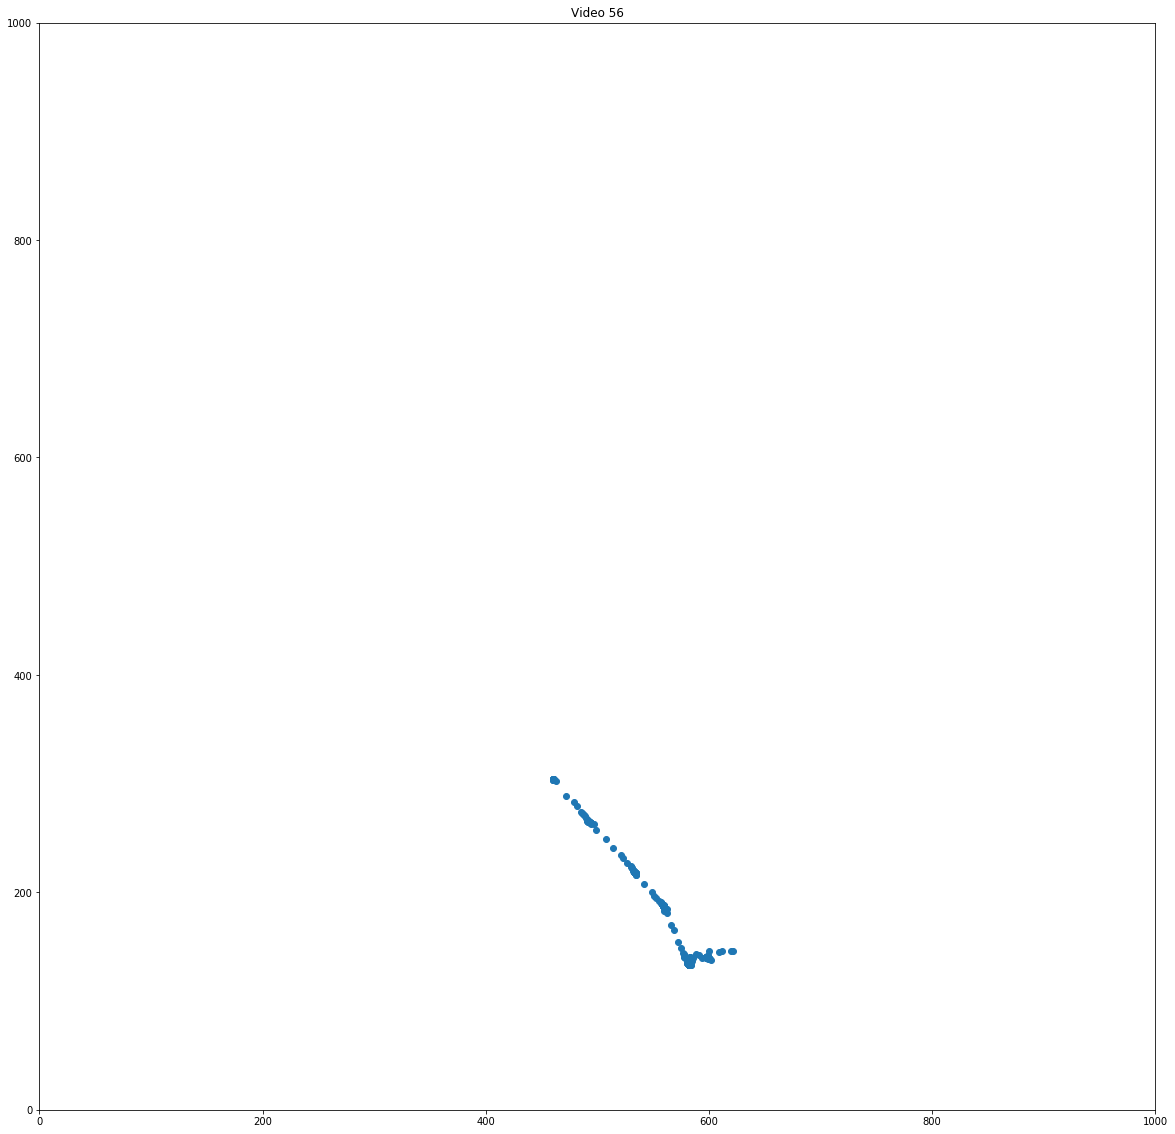

0.0 % tracked poorly


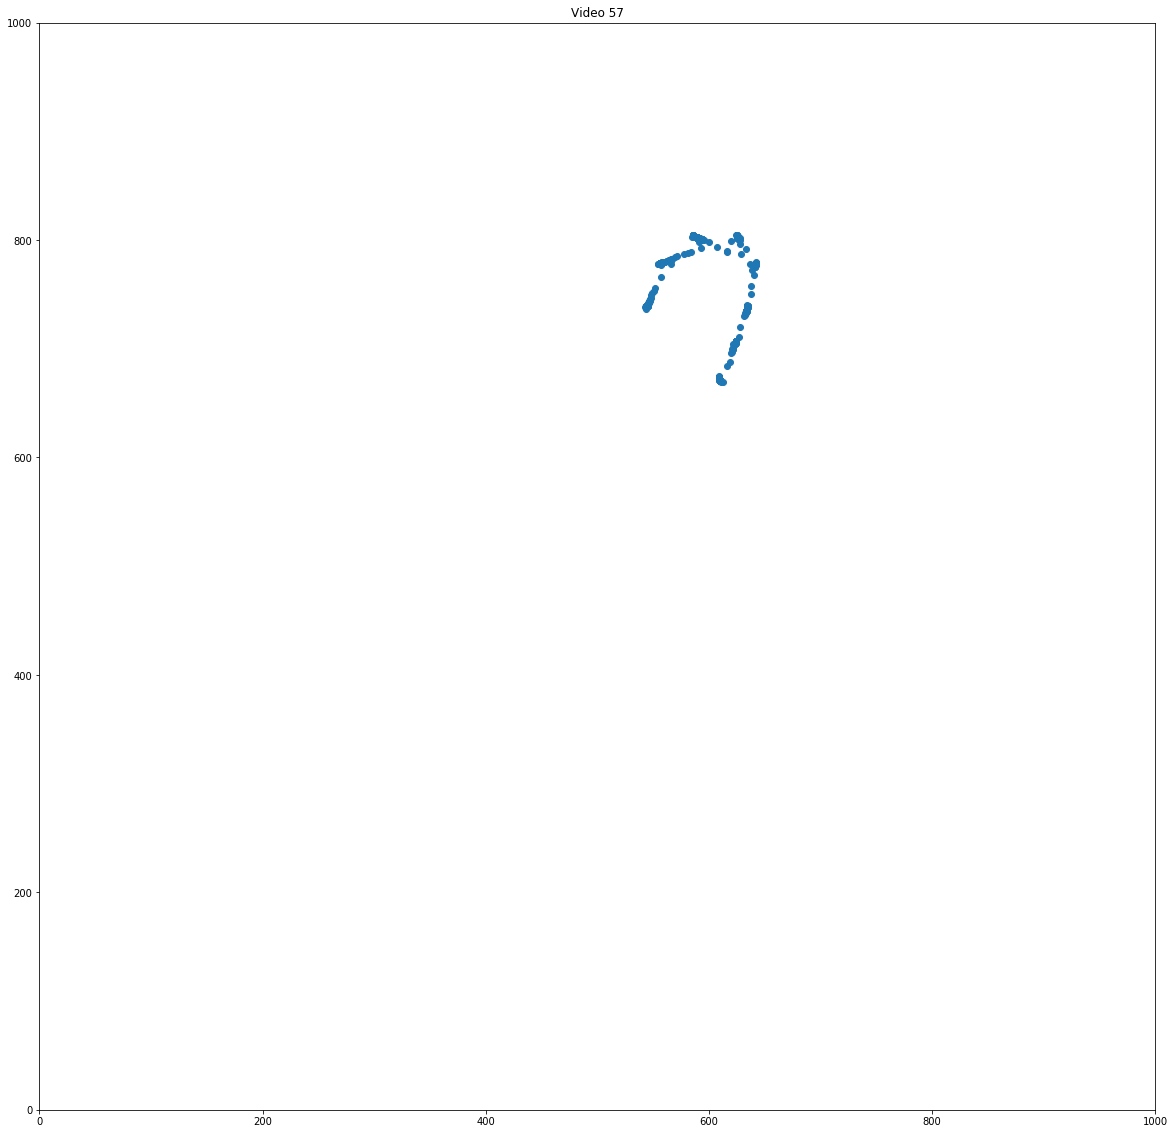

0.0 % tracked poorly


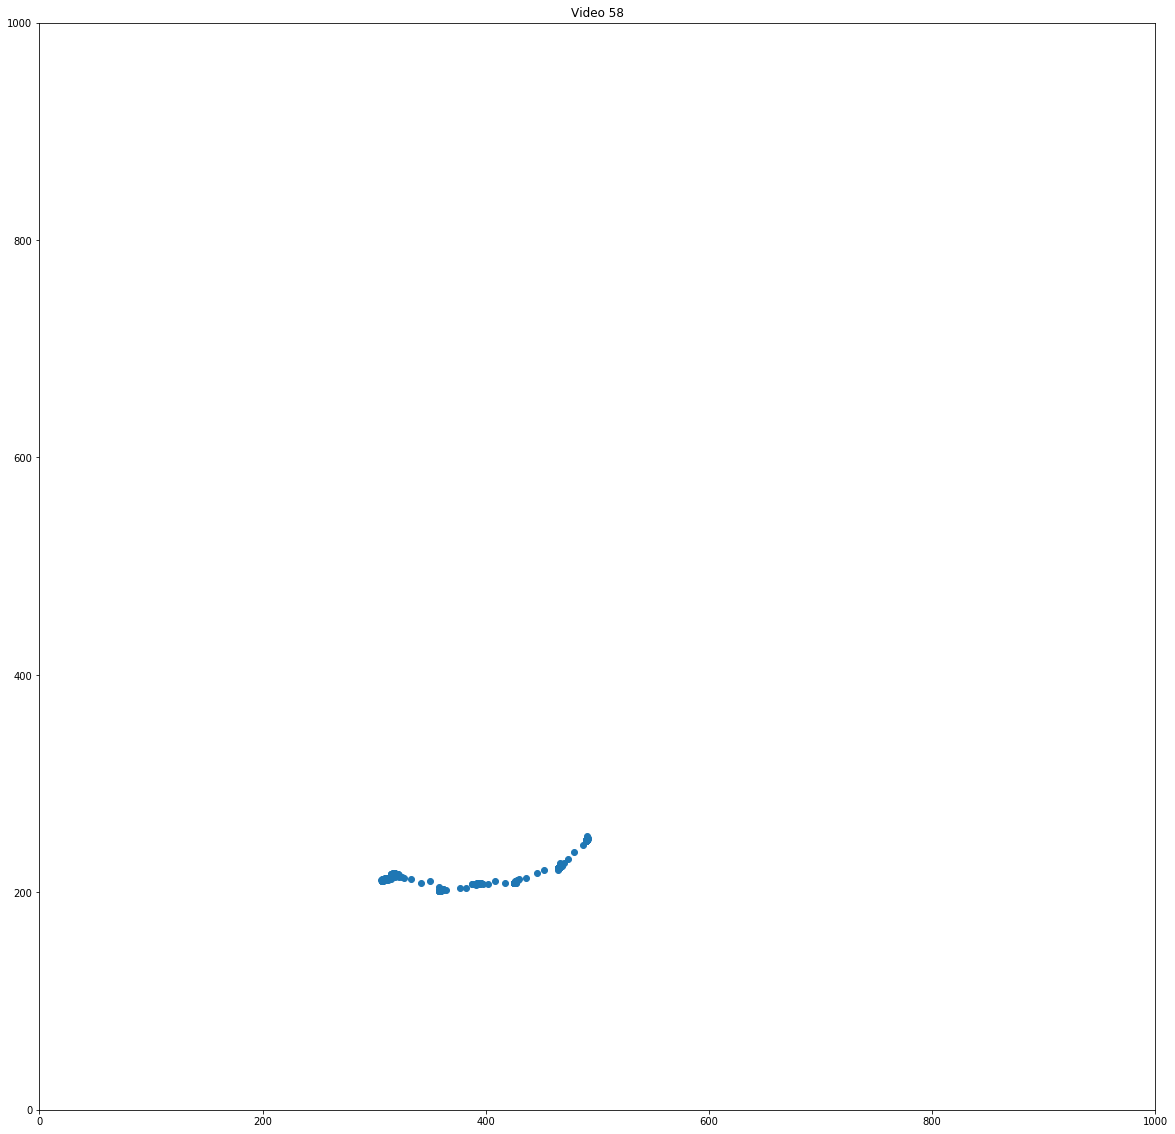

0.0 % tracked poorly


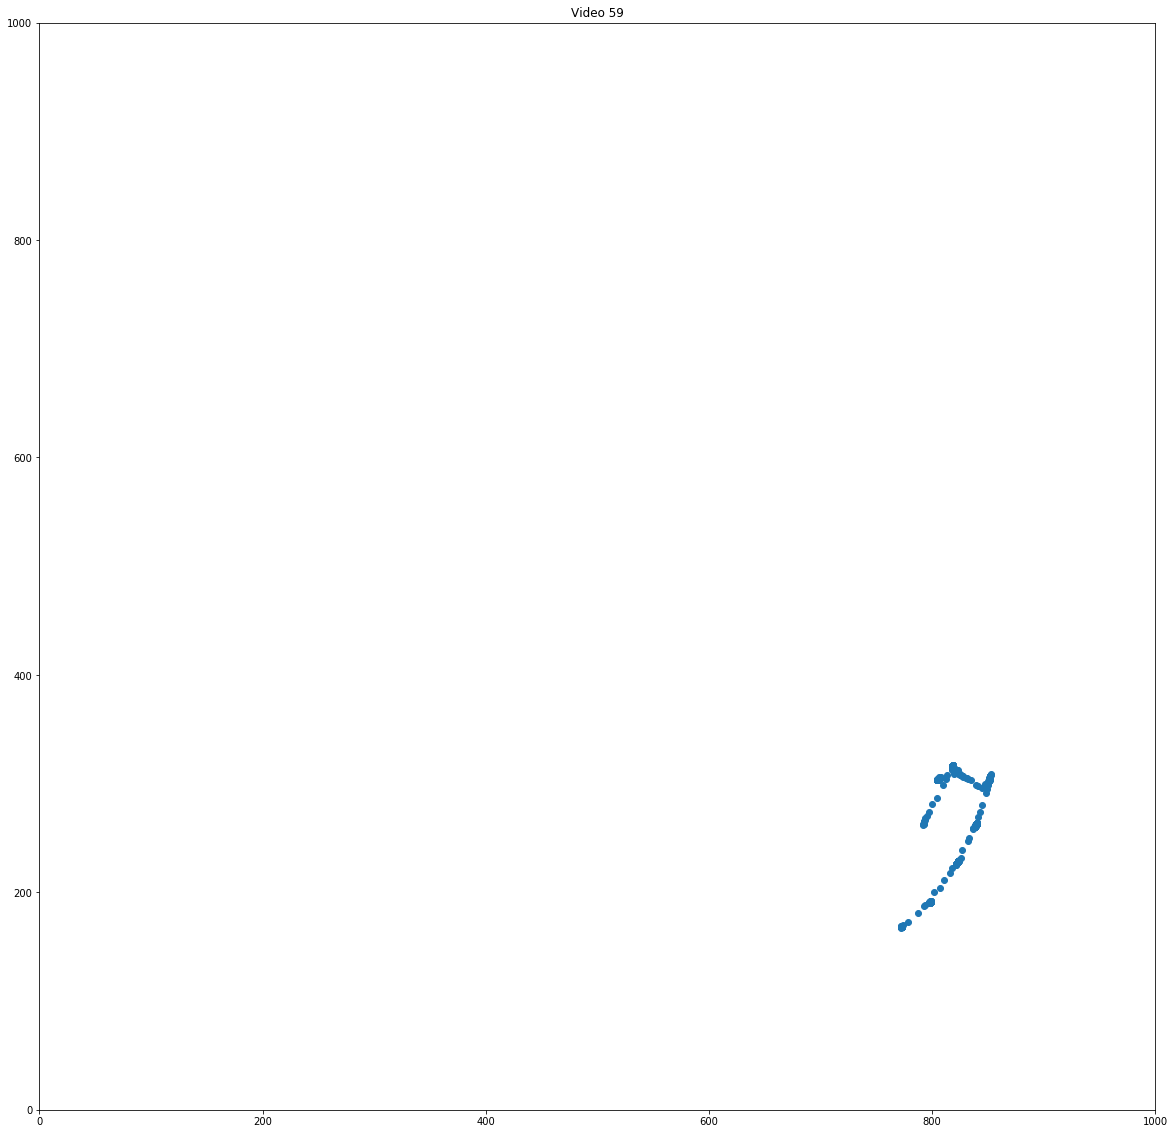

0.0 % tracked poorly


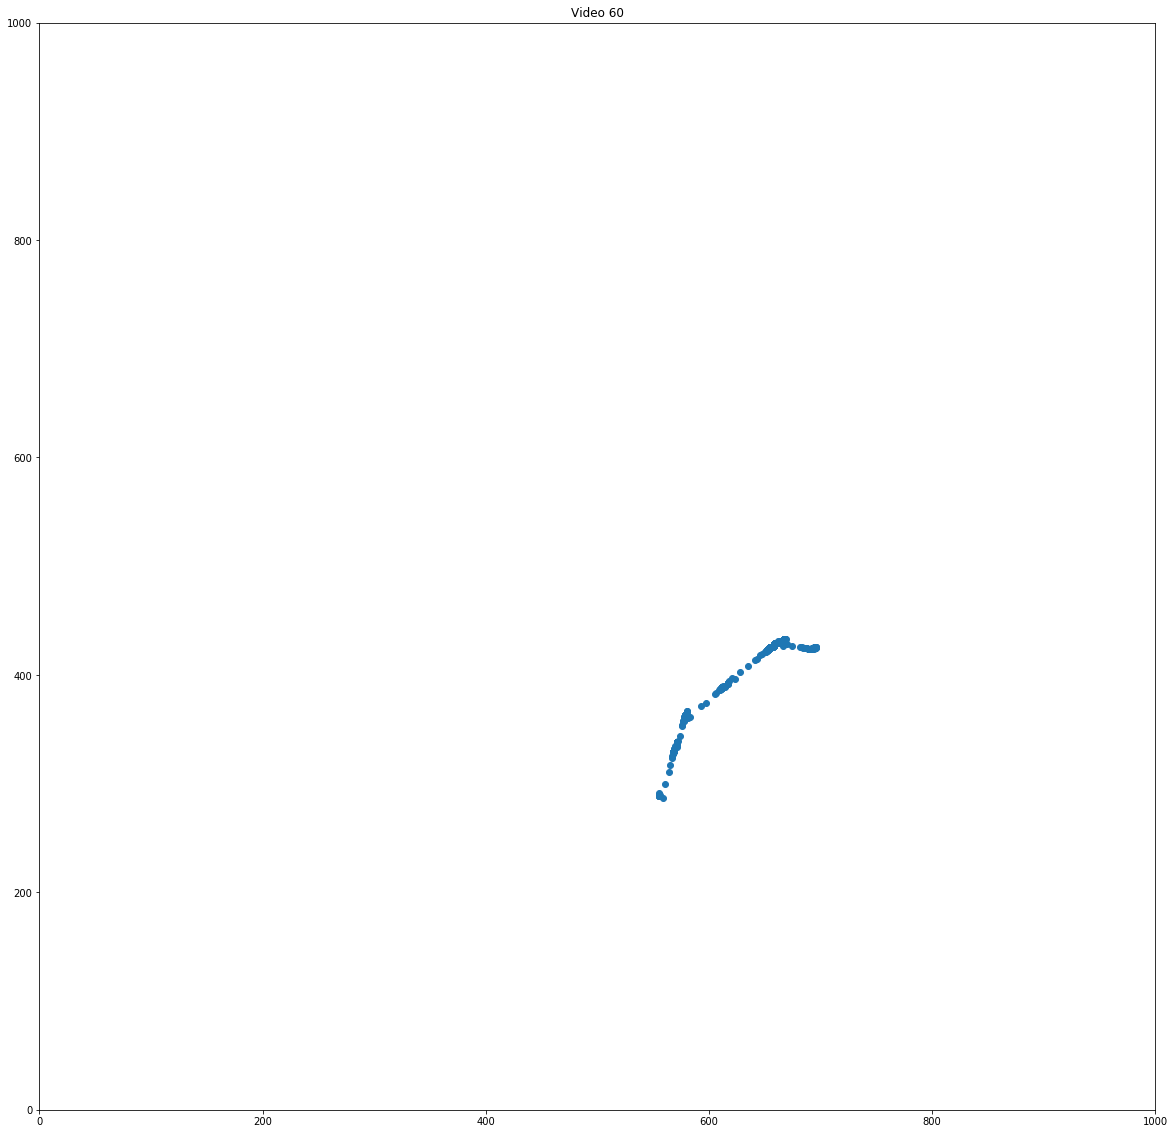

0.0 % tracked poorly


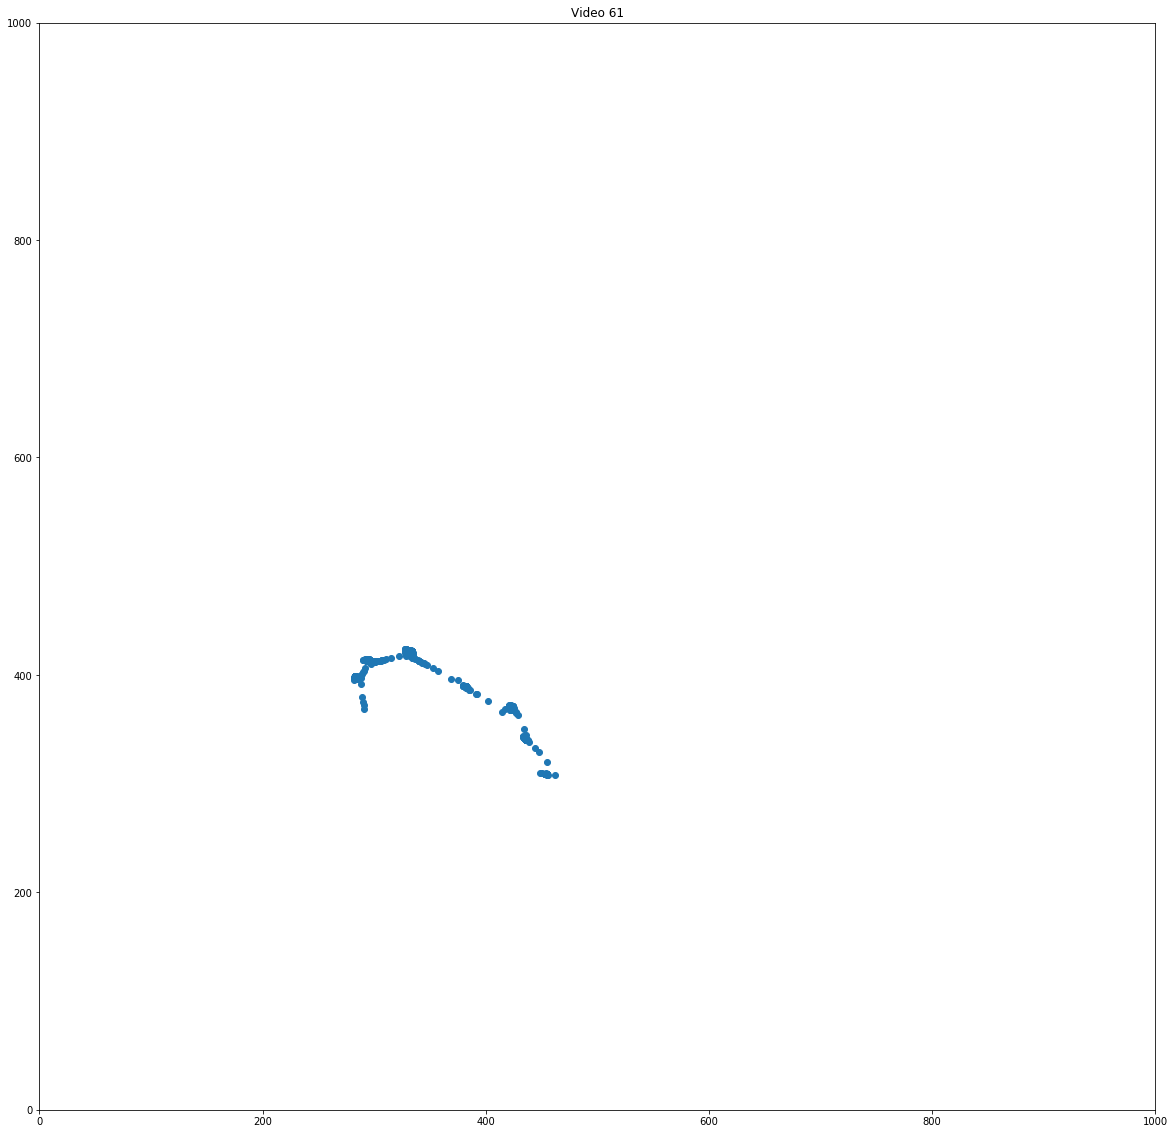

0.0 % tracked poorly


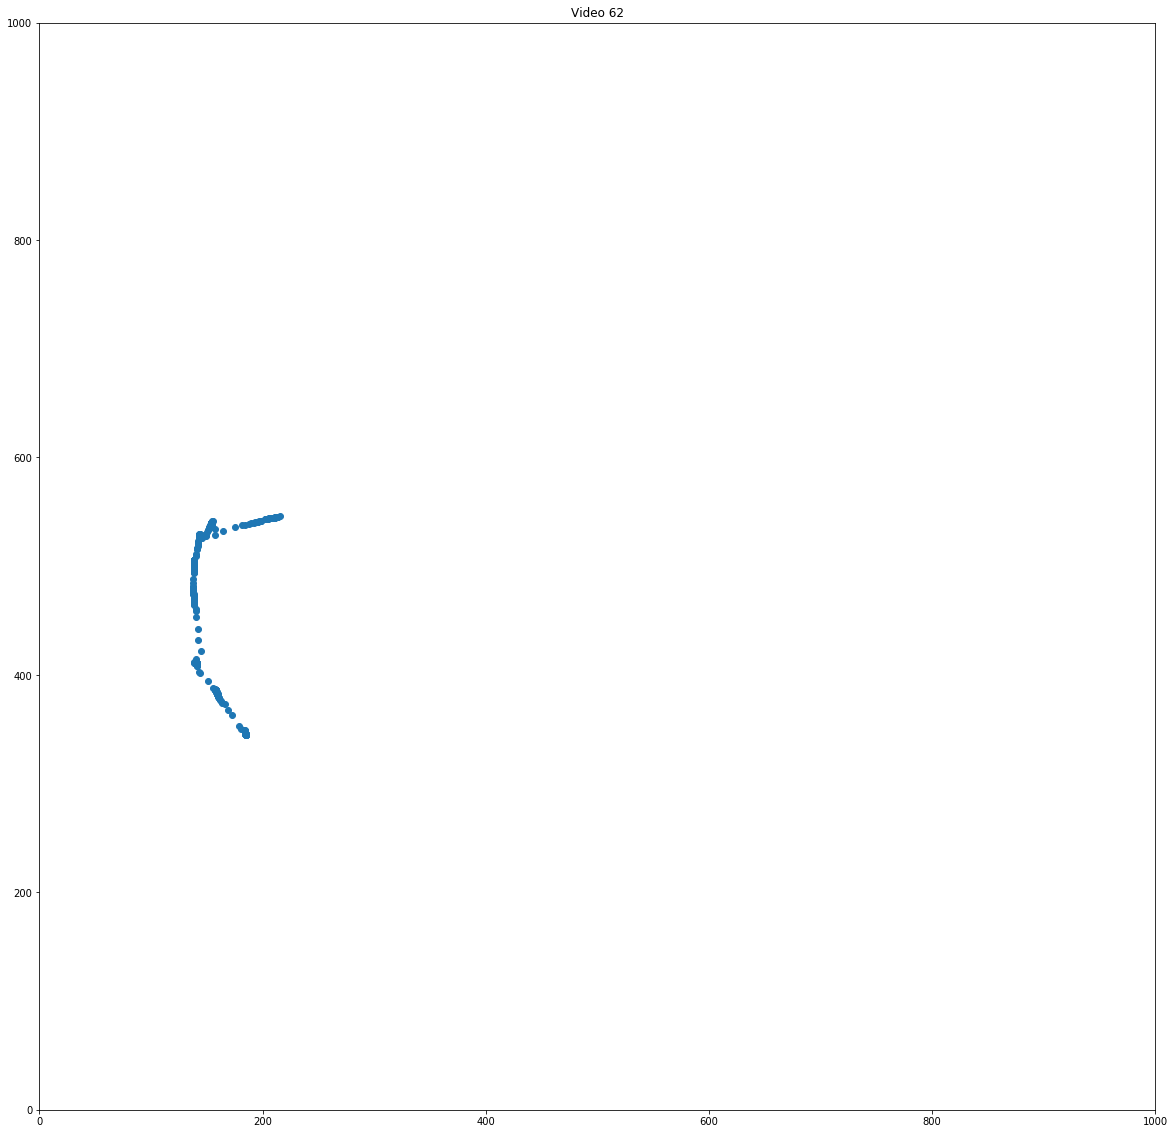

0.0 % tracked poorly


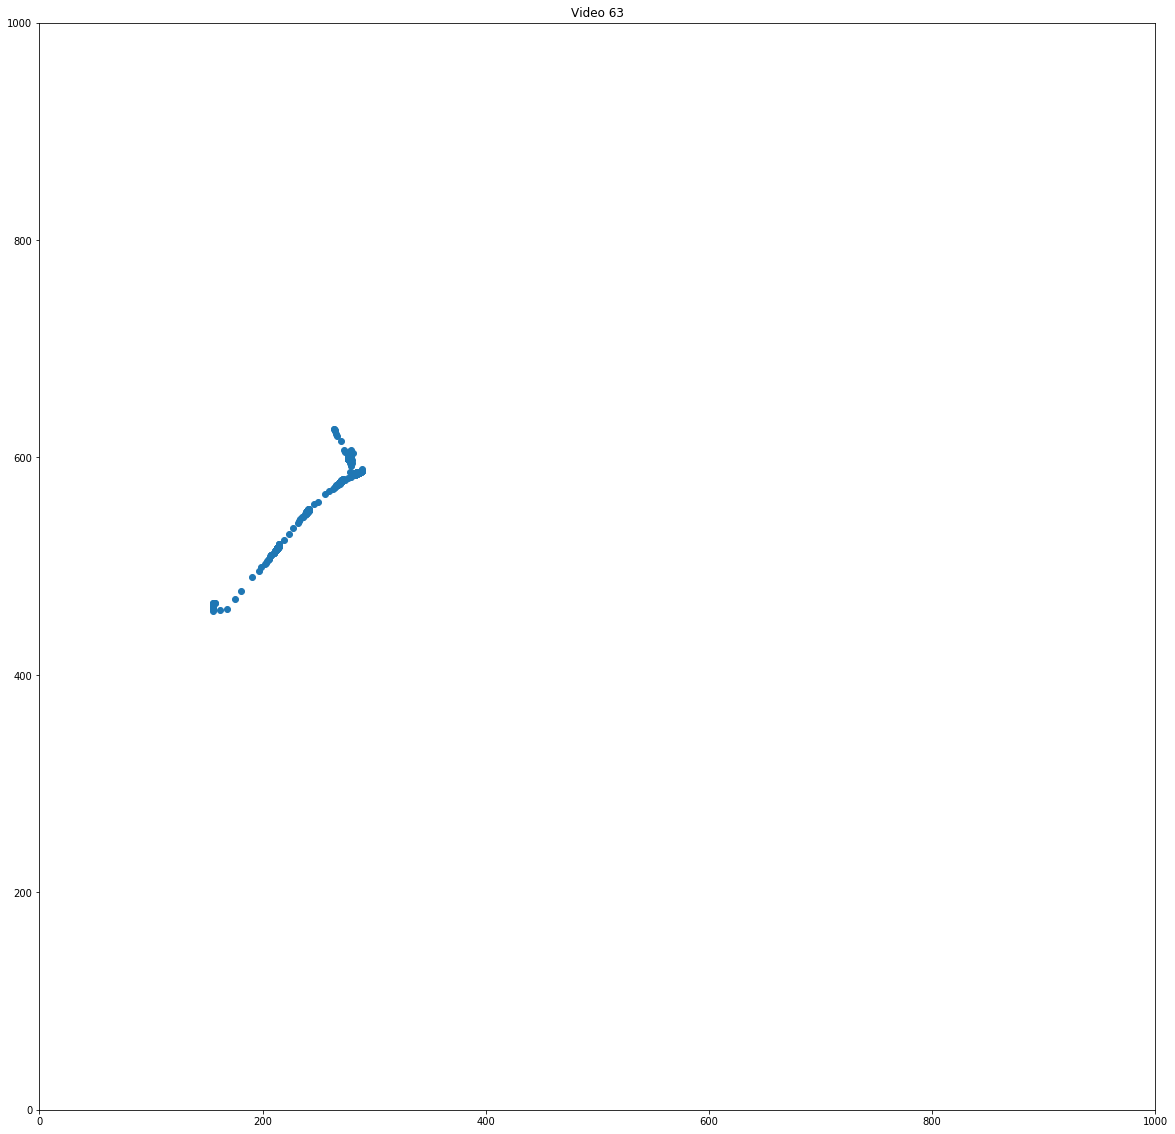

0.0 % tracked poorly


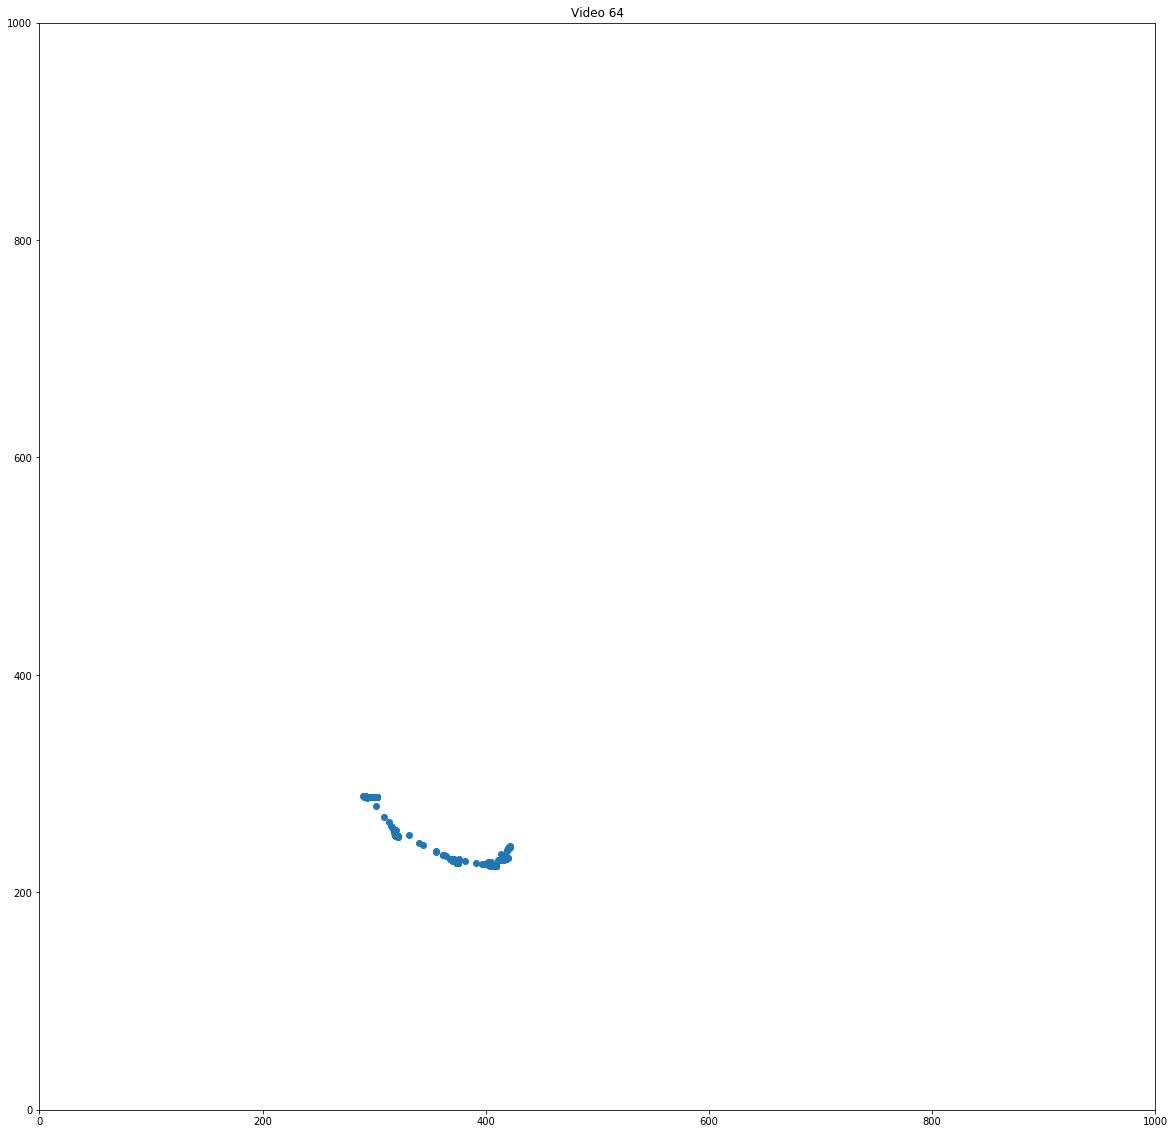

0.0 % tracked poorly


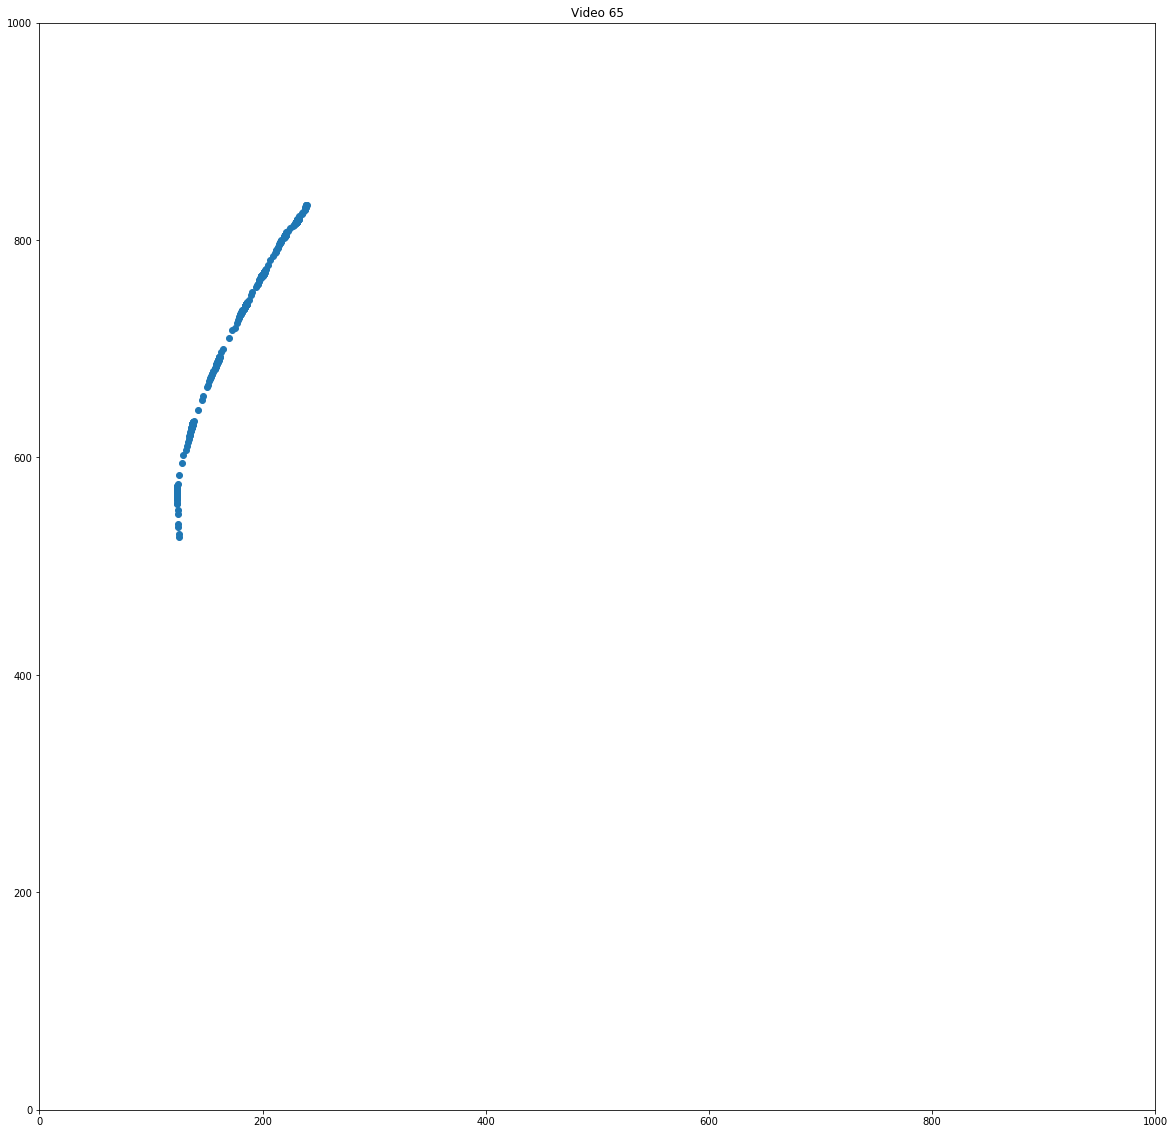

0.0 % tracked poorly


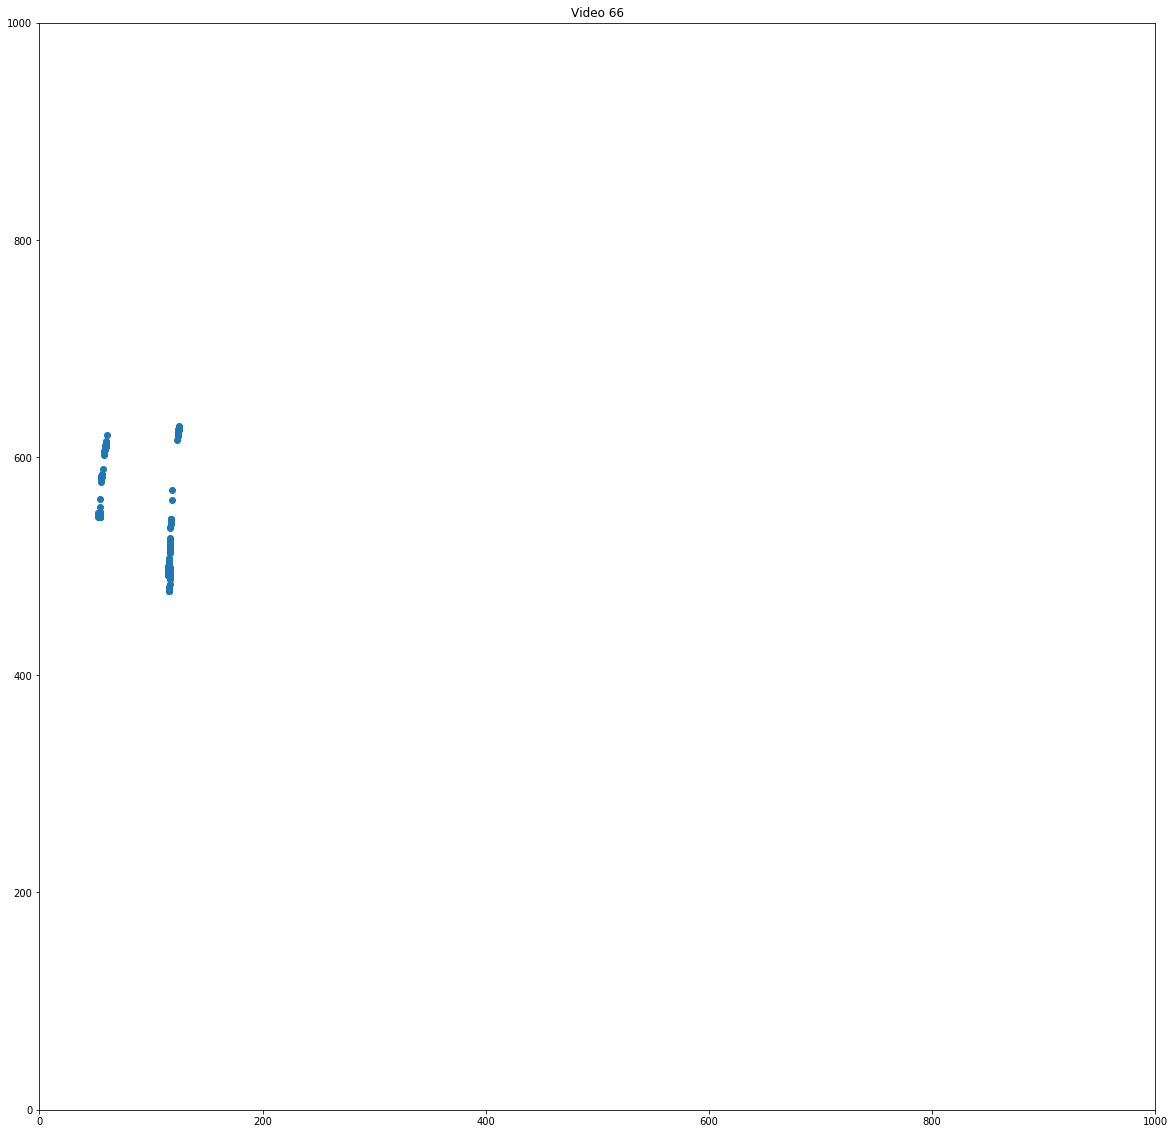

0.0 % tracked poorly


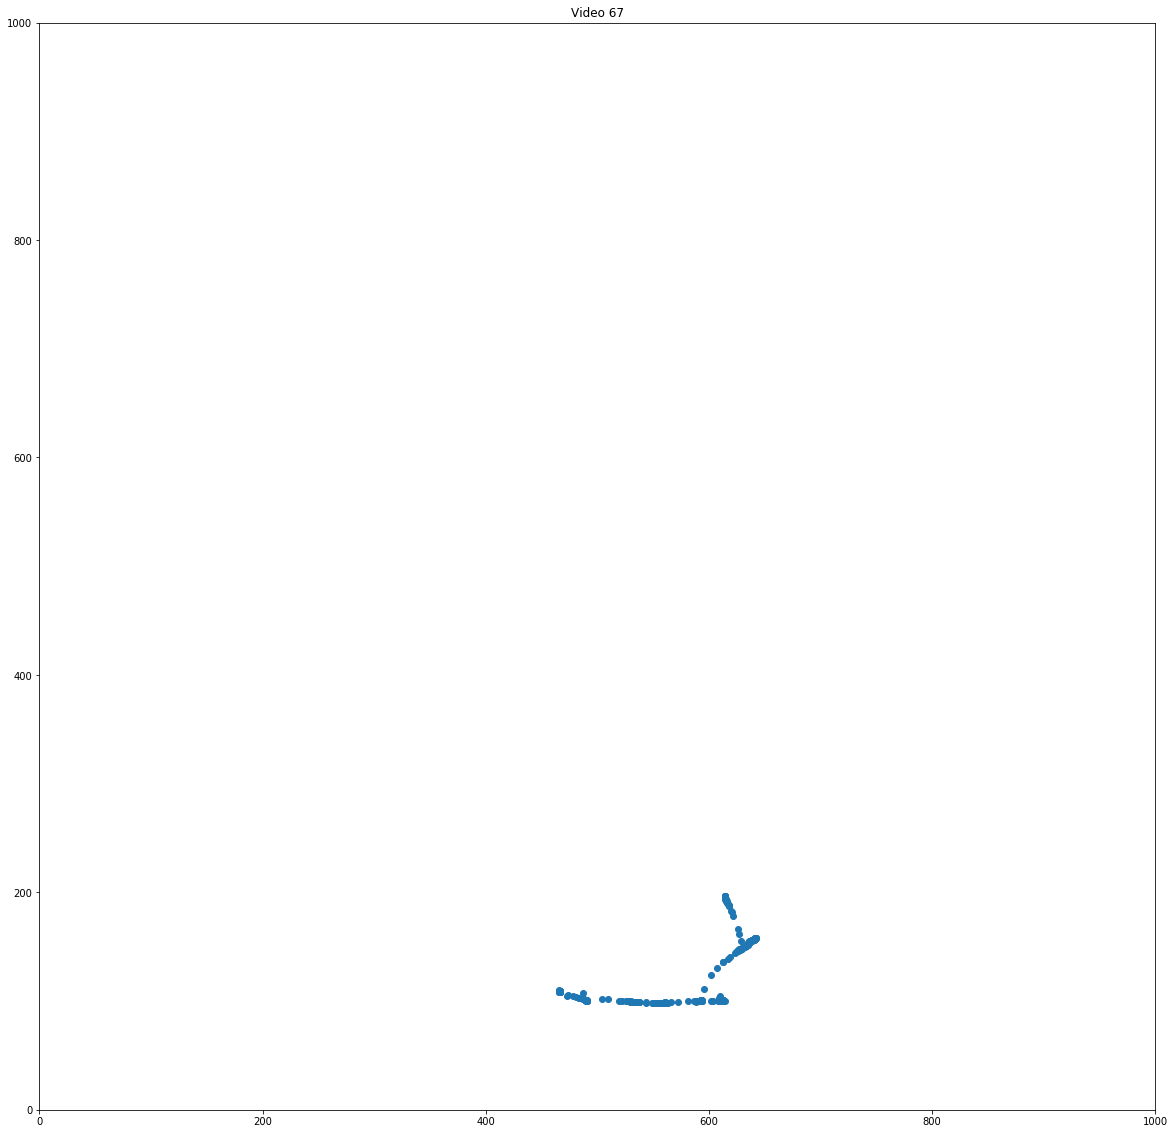

0.0 % tracked poorly


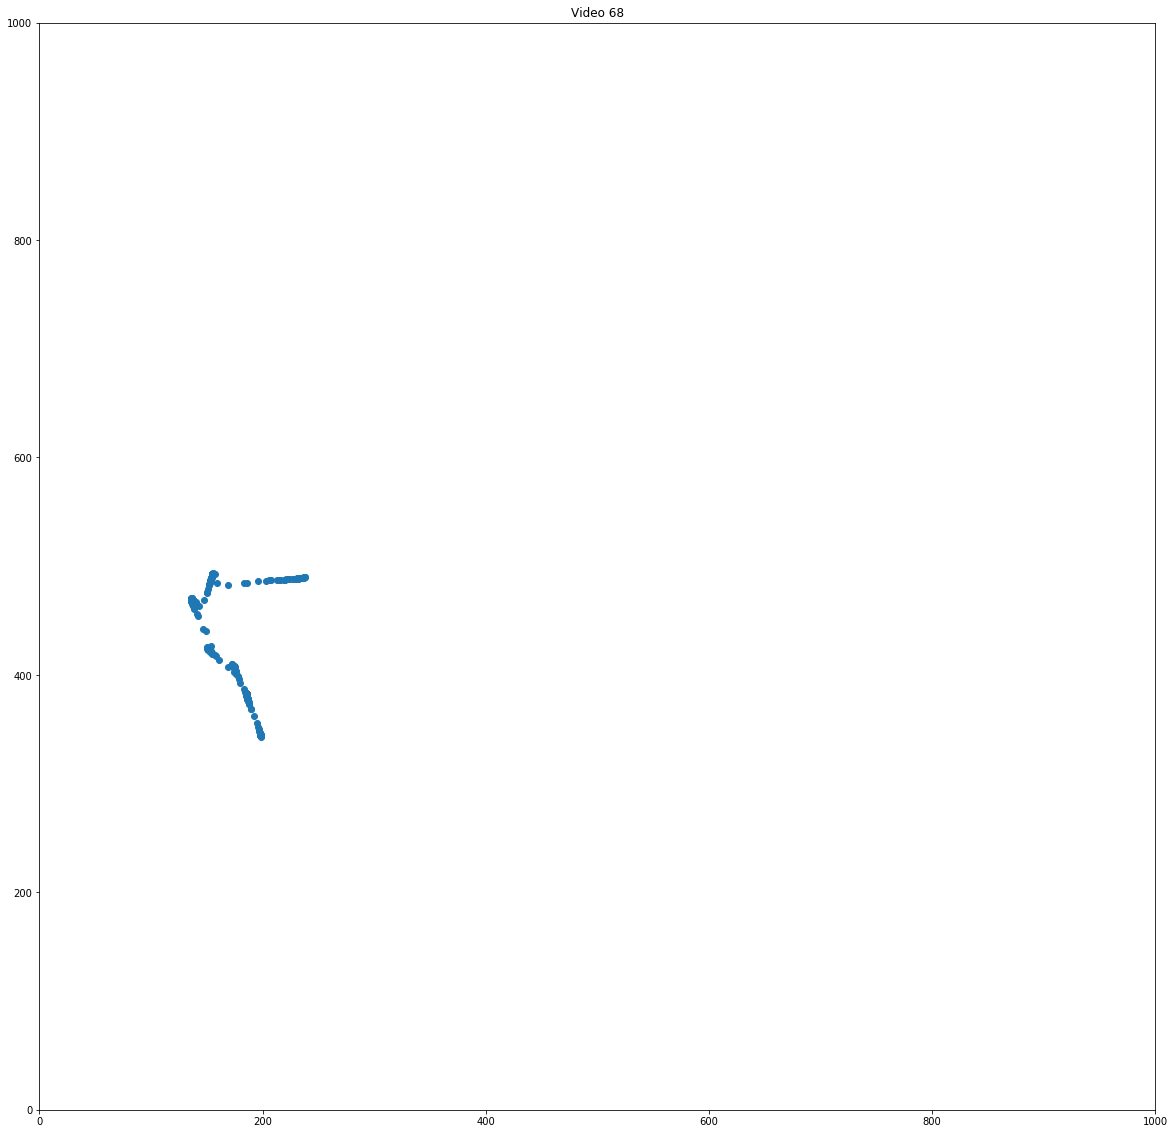

0.0 % tracked poorly


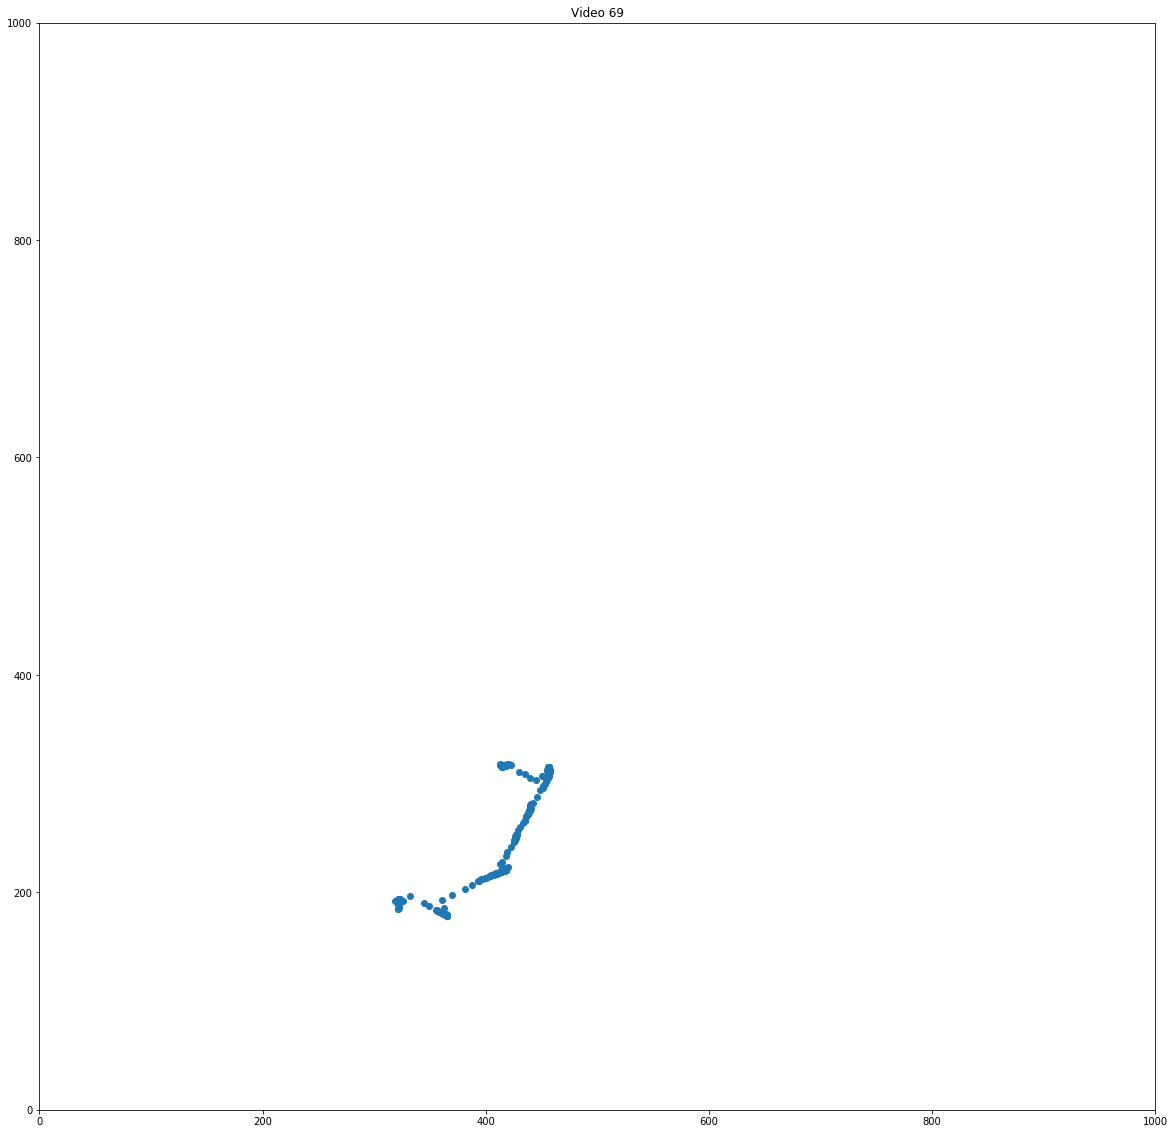

0.0 % tracked poorly


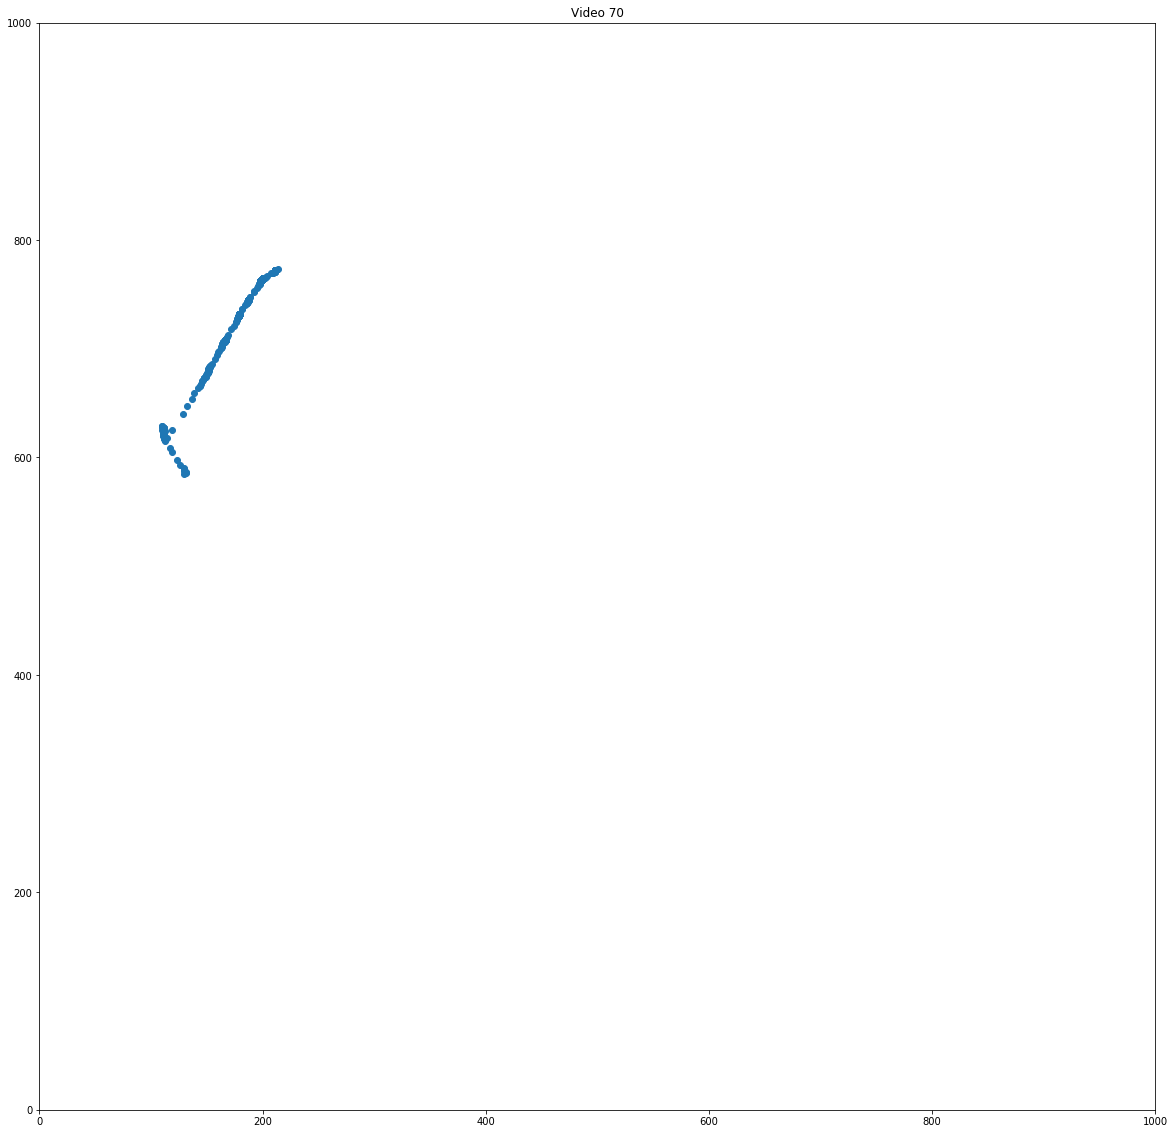

0.0 % tracked poorly


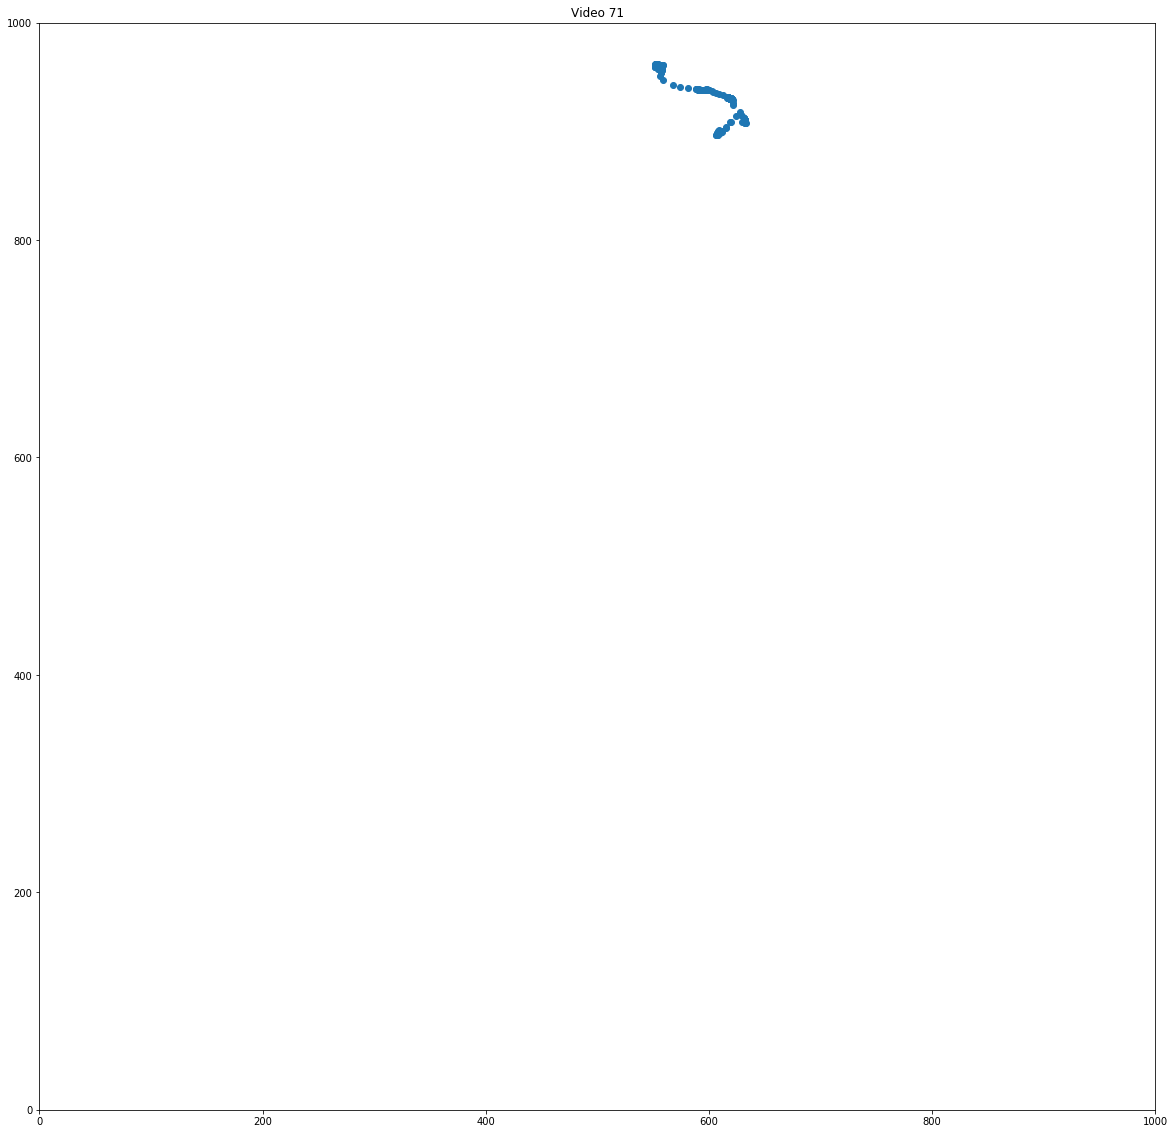

0.0 % tracked poorly


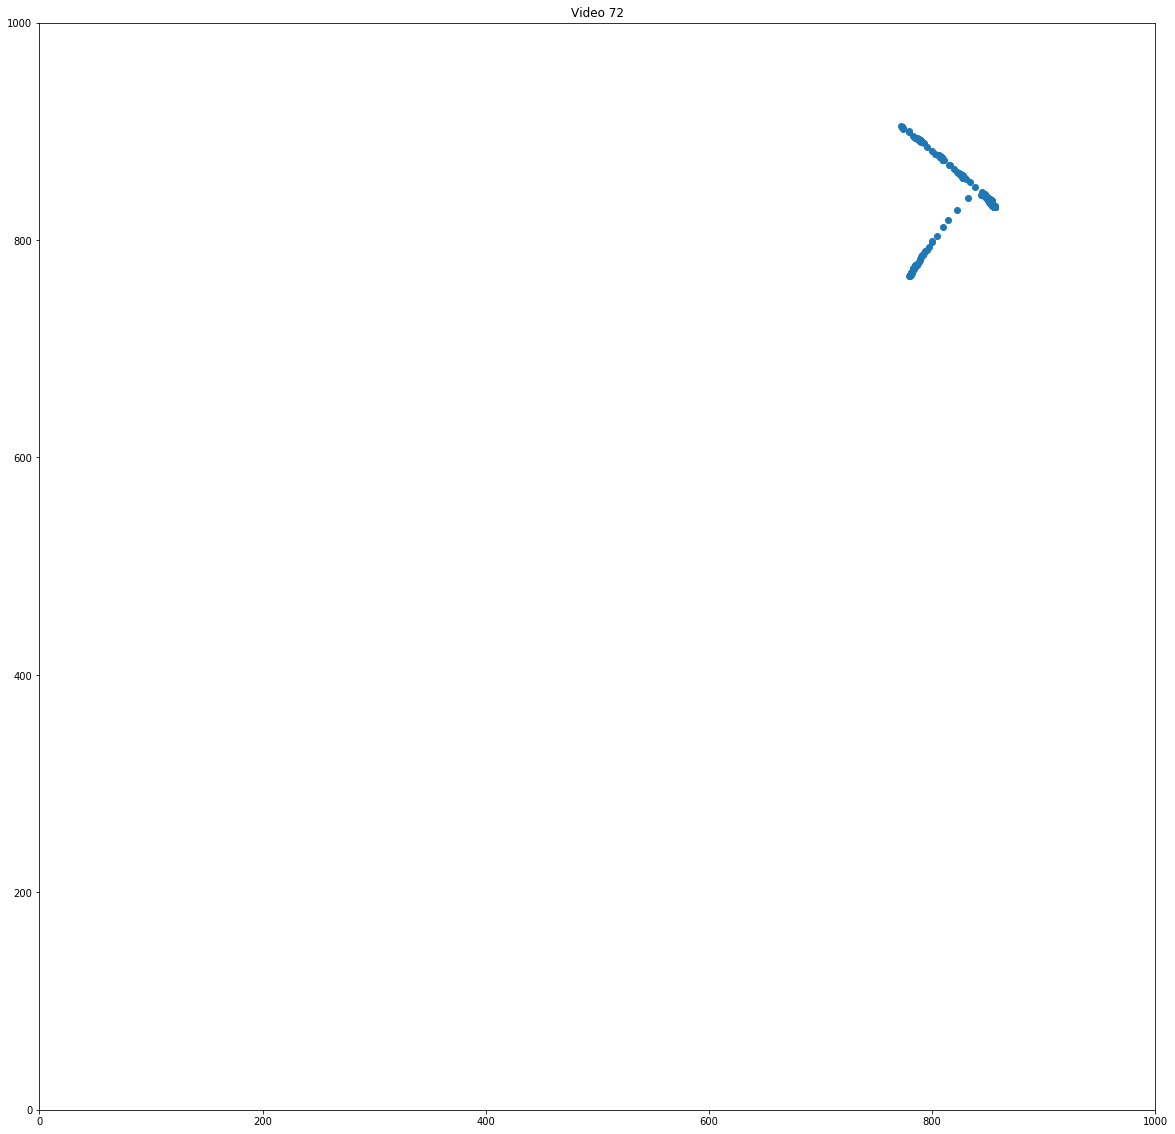

0.0 % tracked poorly


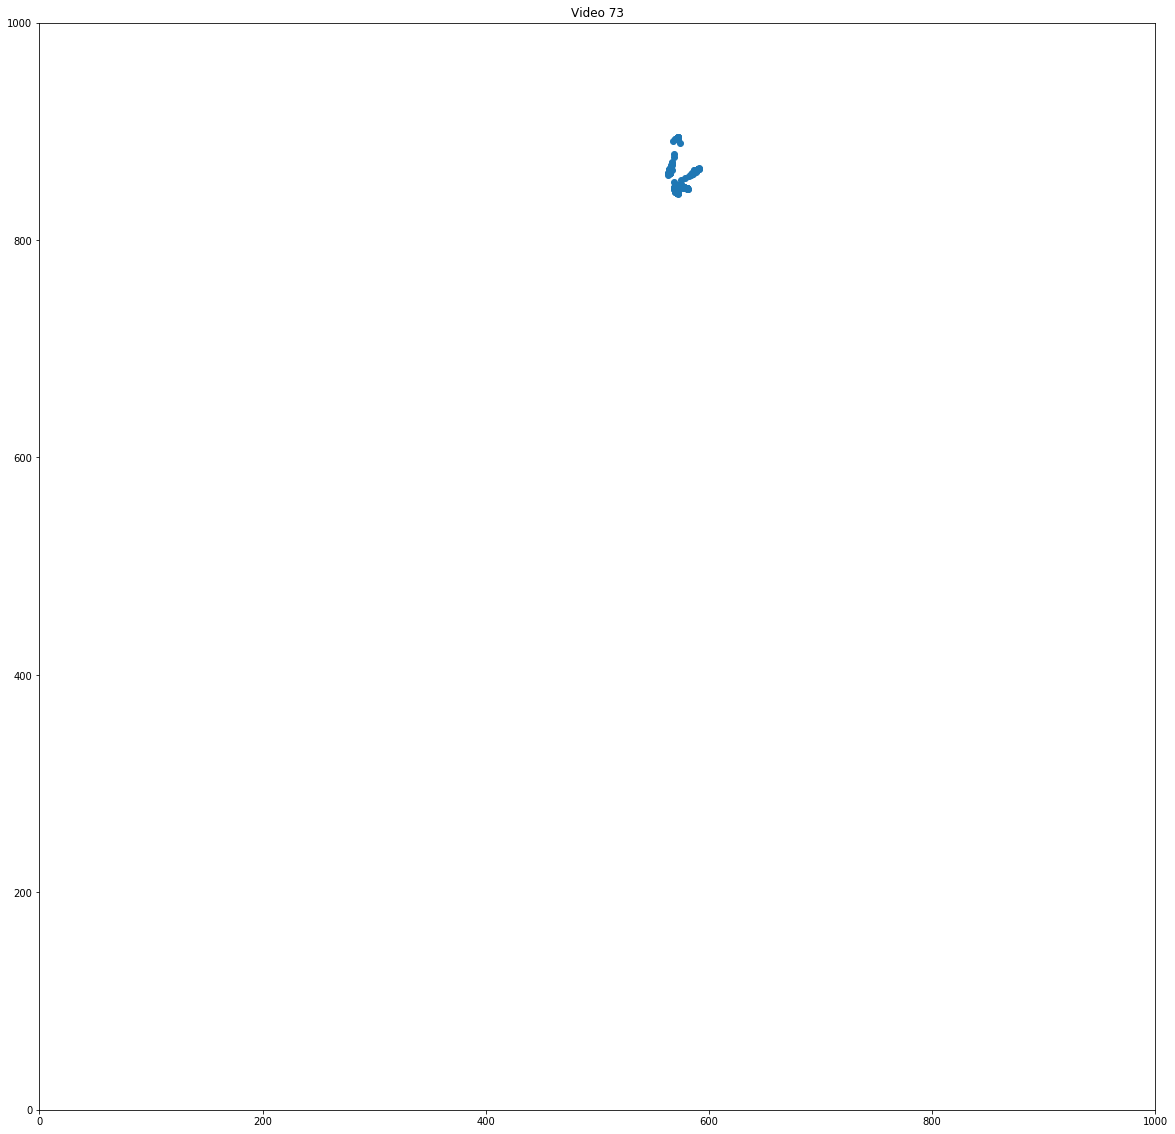

0.0 % tracked poorly


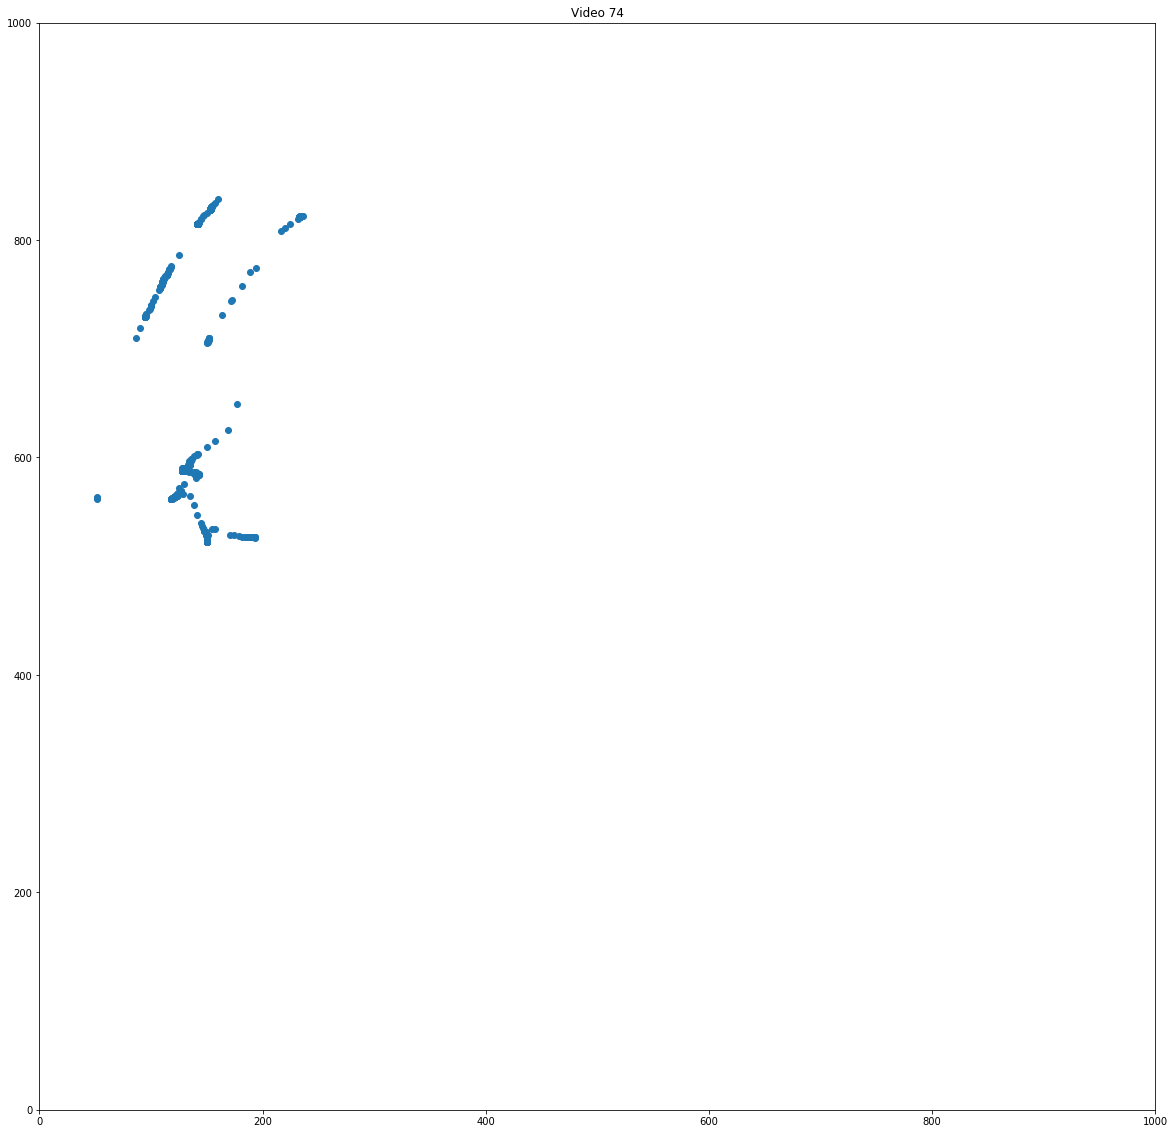

0.0 % tracked poorly


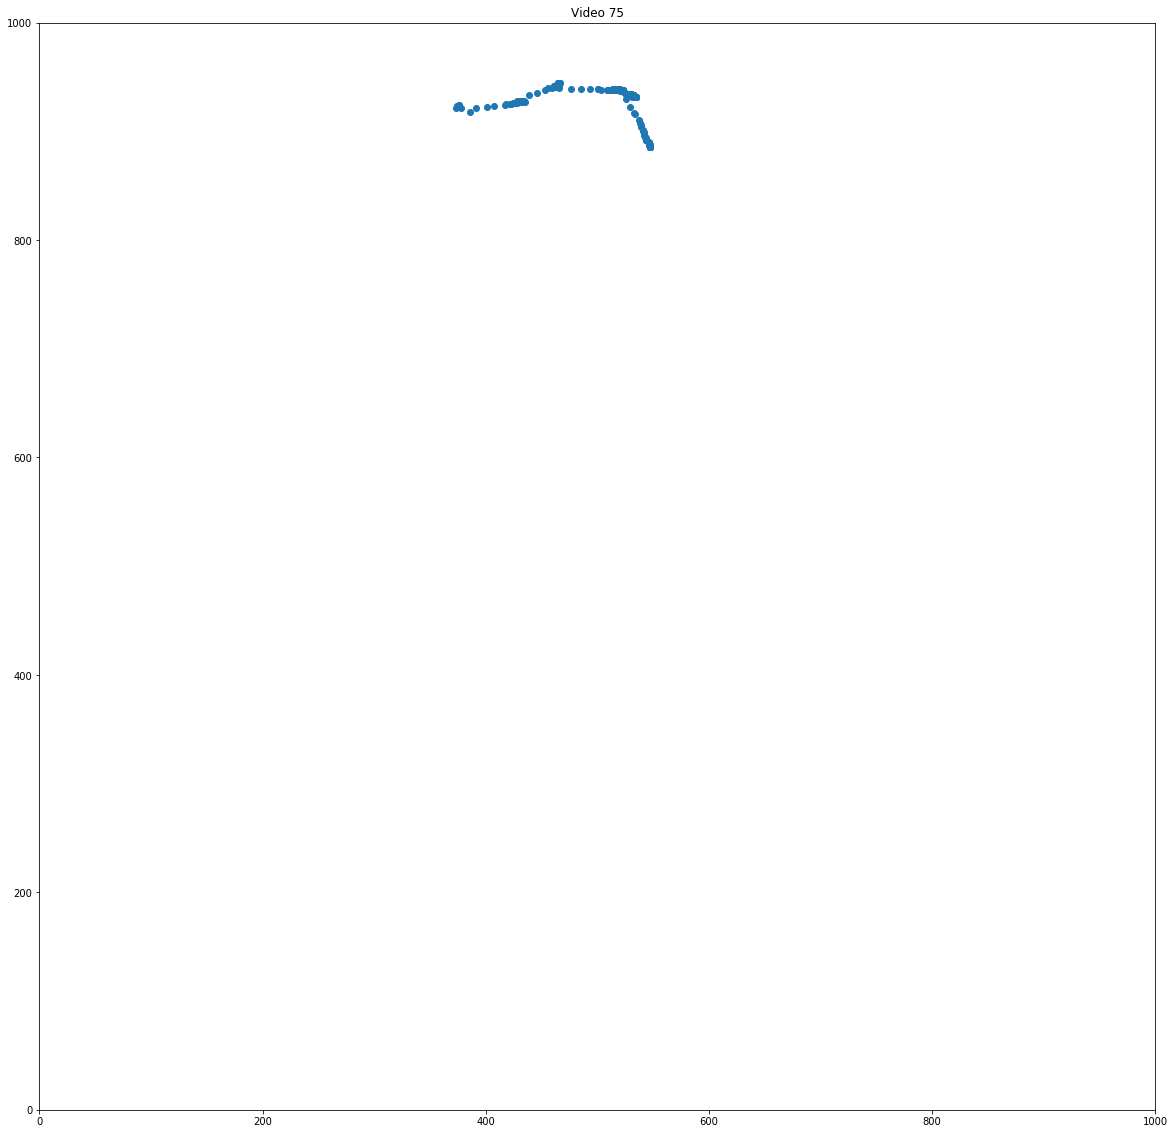

0.0 % tracked poorly


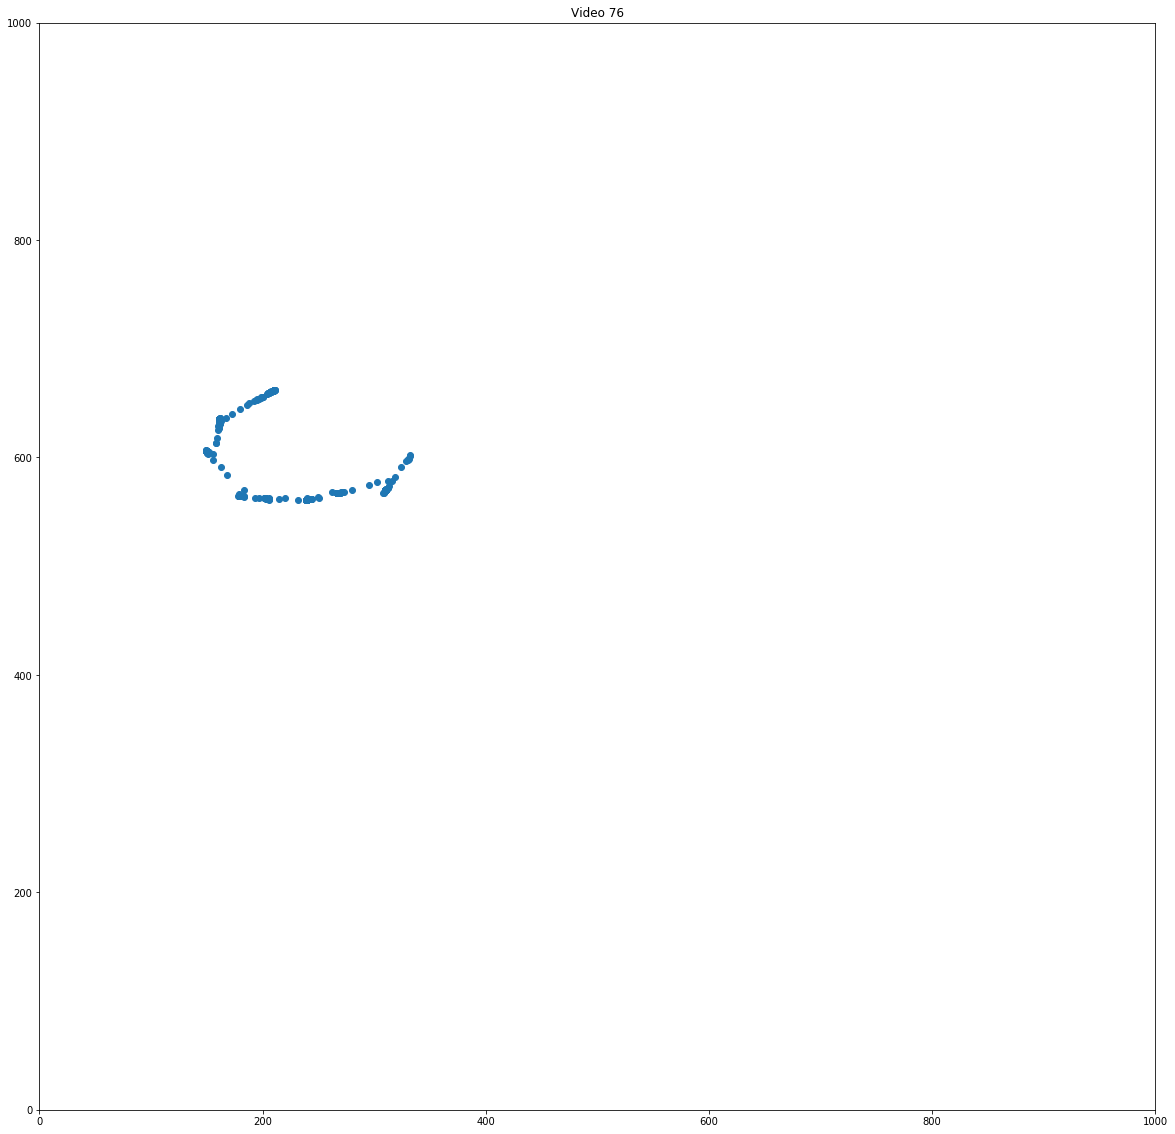

0.0 % tracked poorly


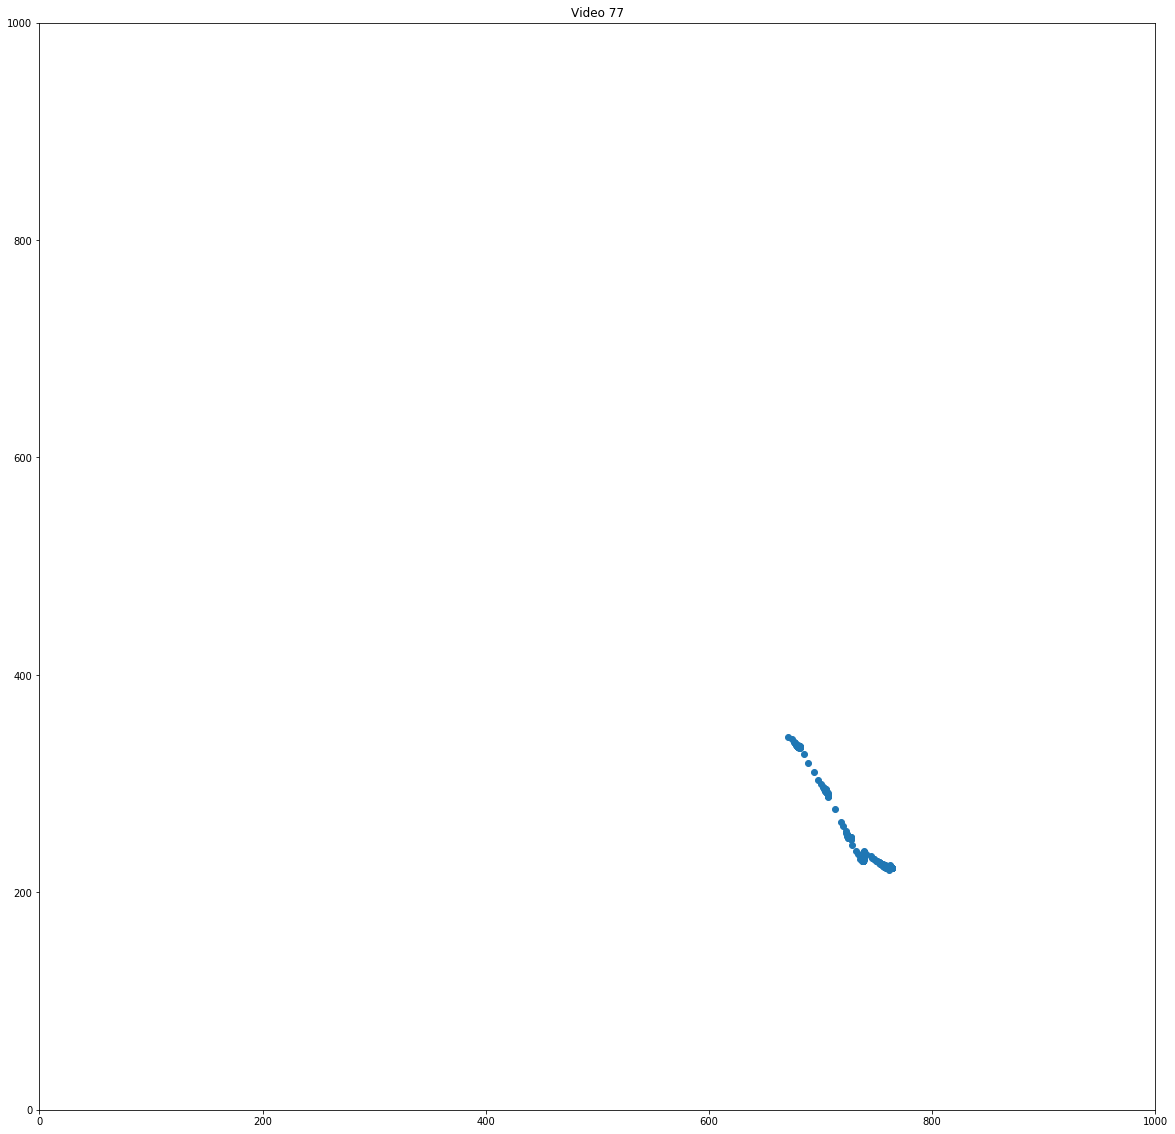

0.0 % tracked poorly


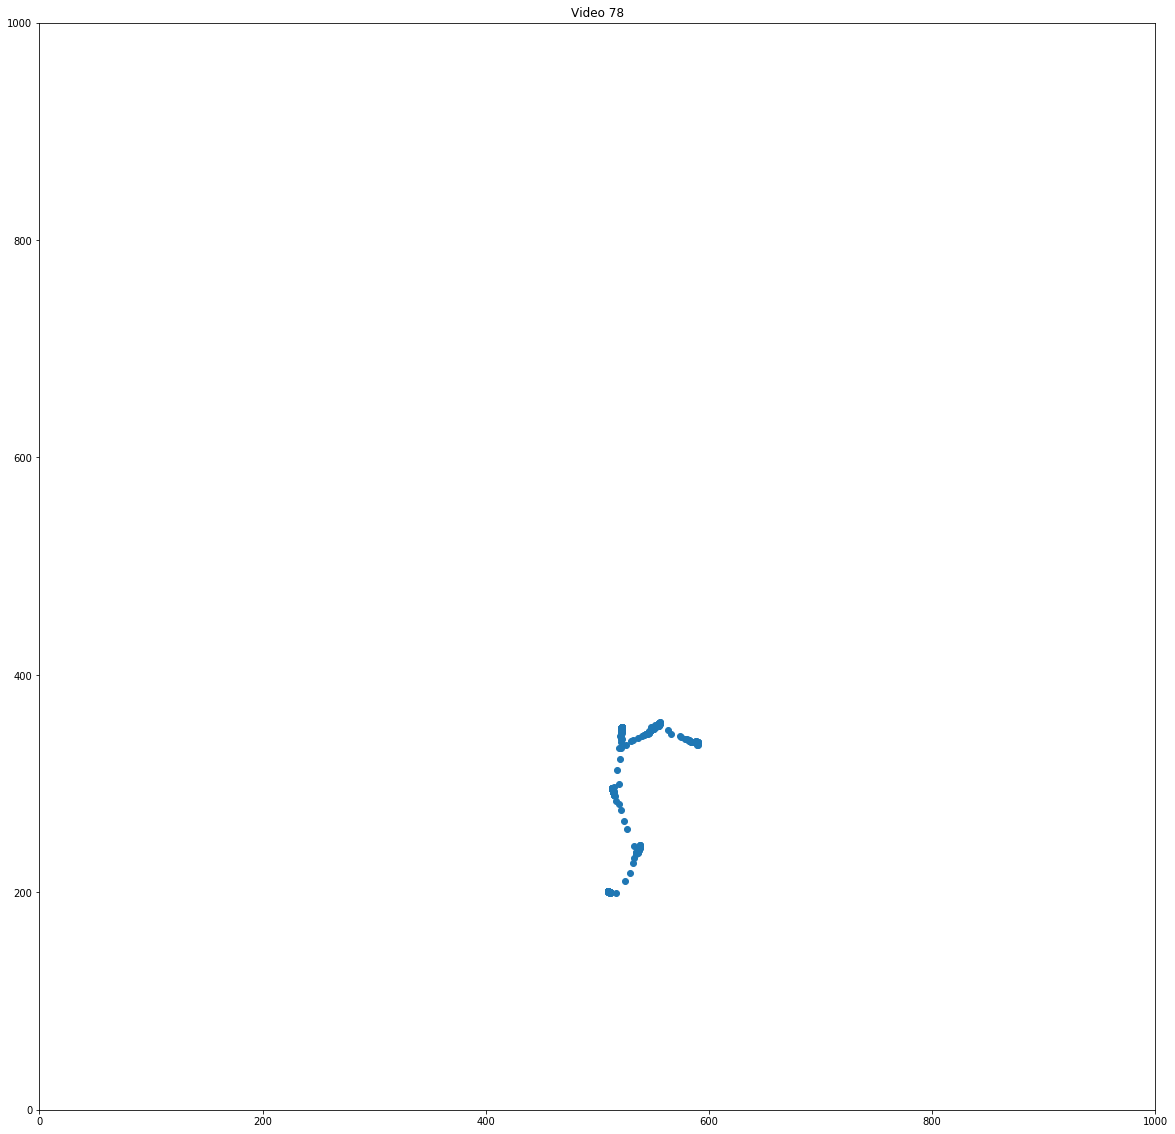

0.0 % tracked poorly


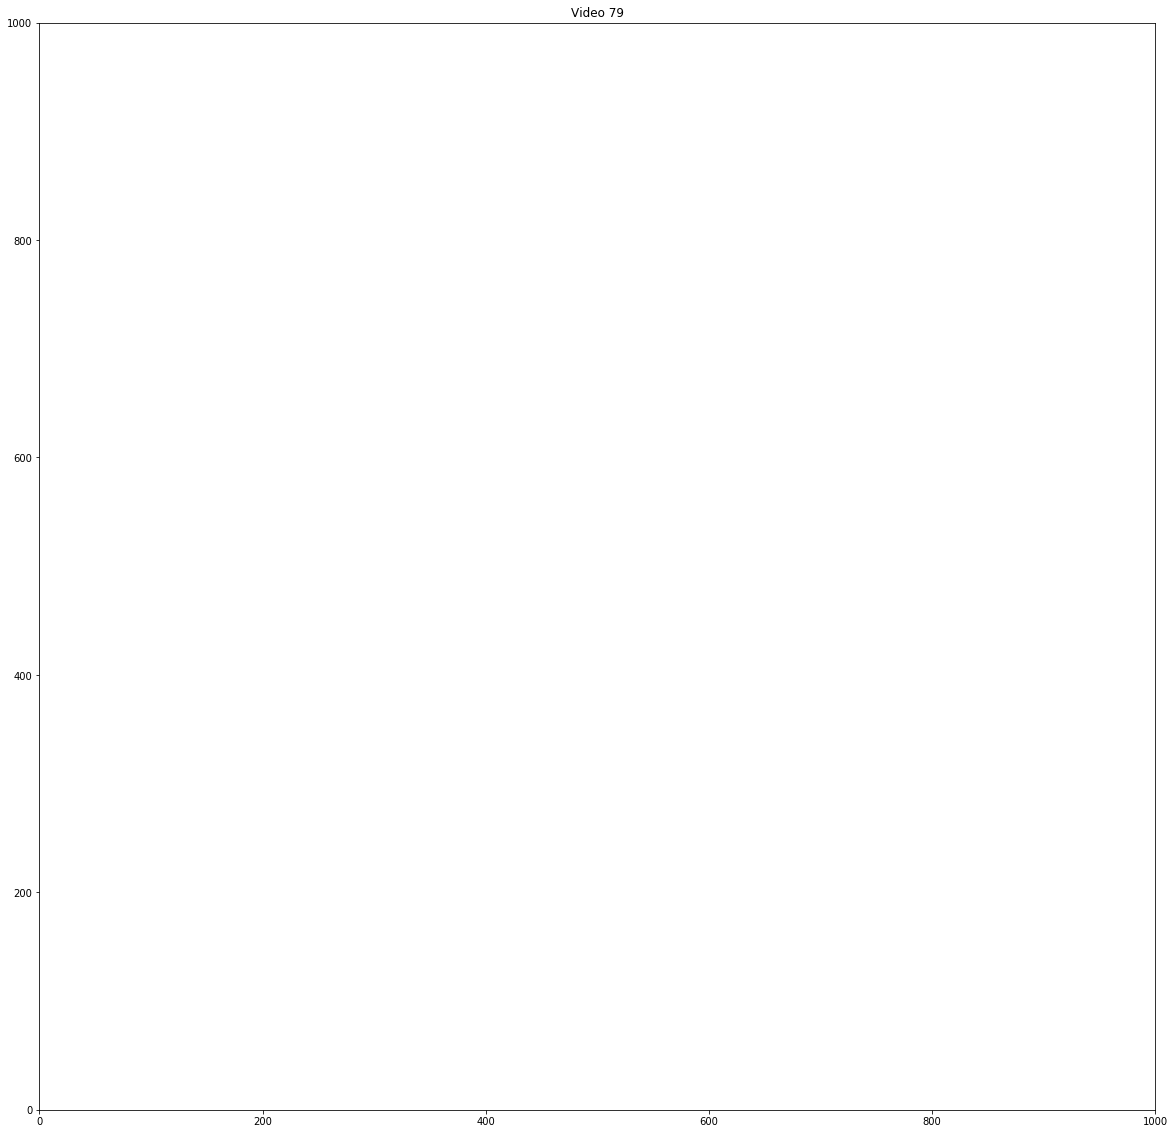

0.0 % tracked poorly


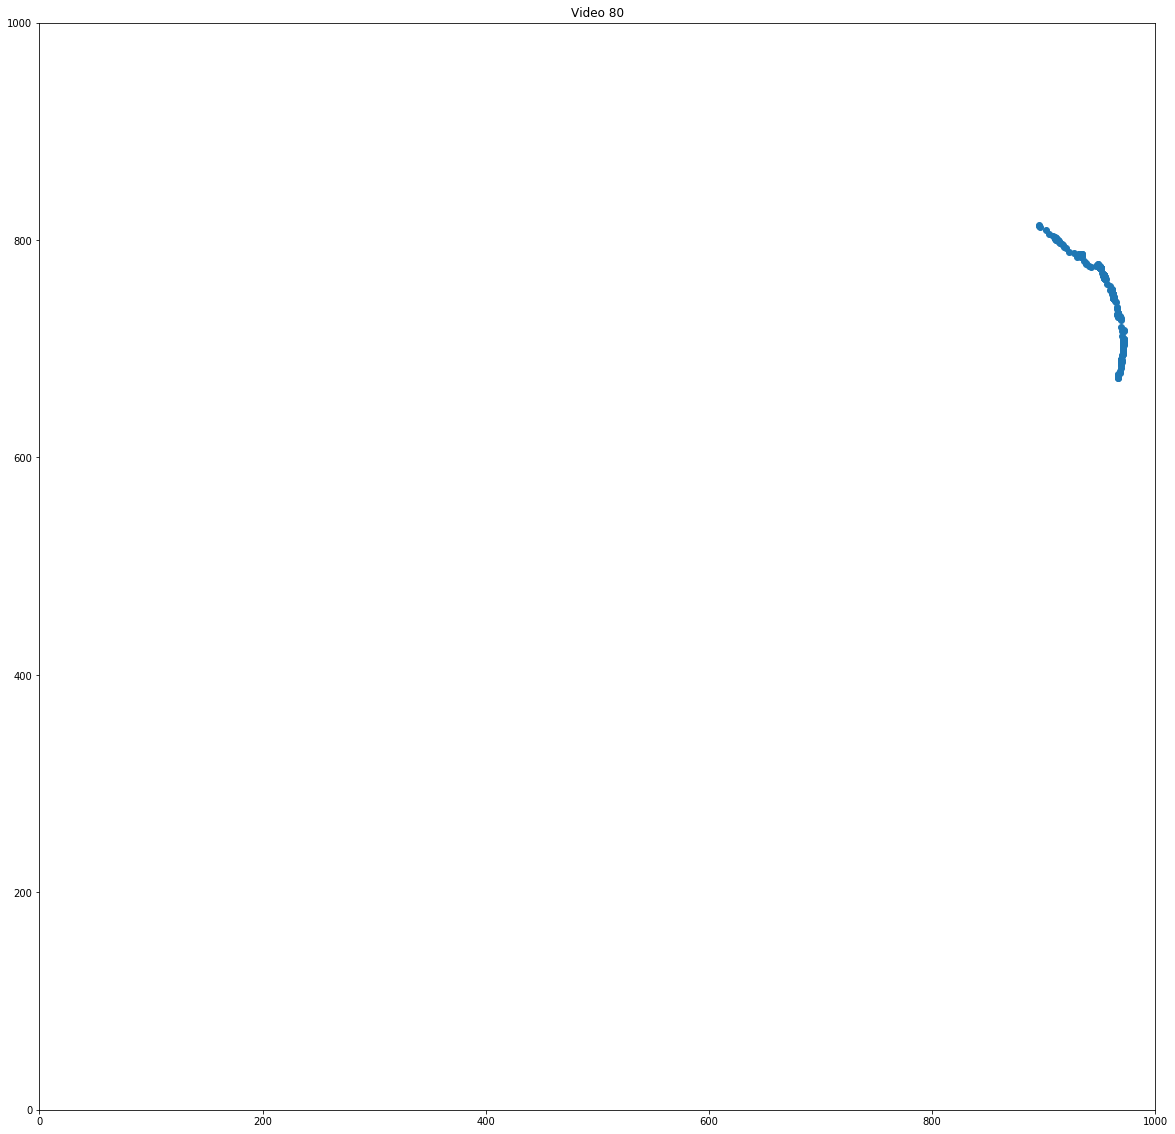

0.0 % tracked poorly


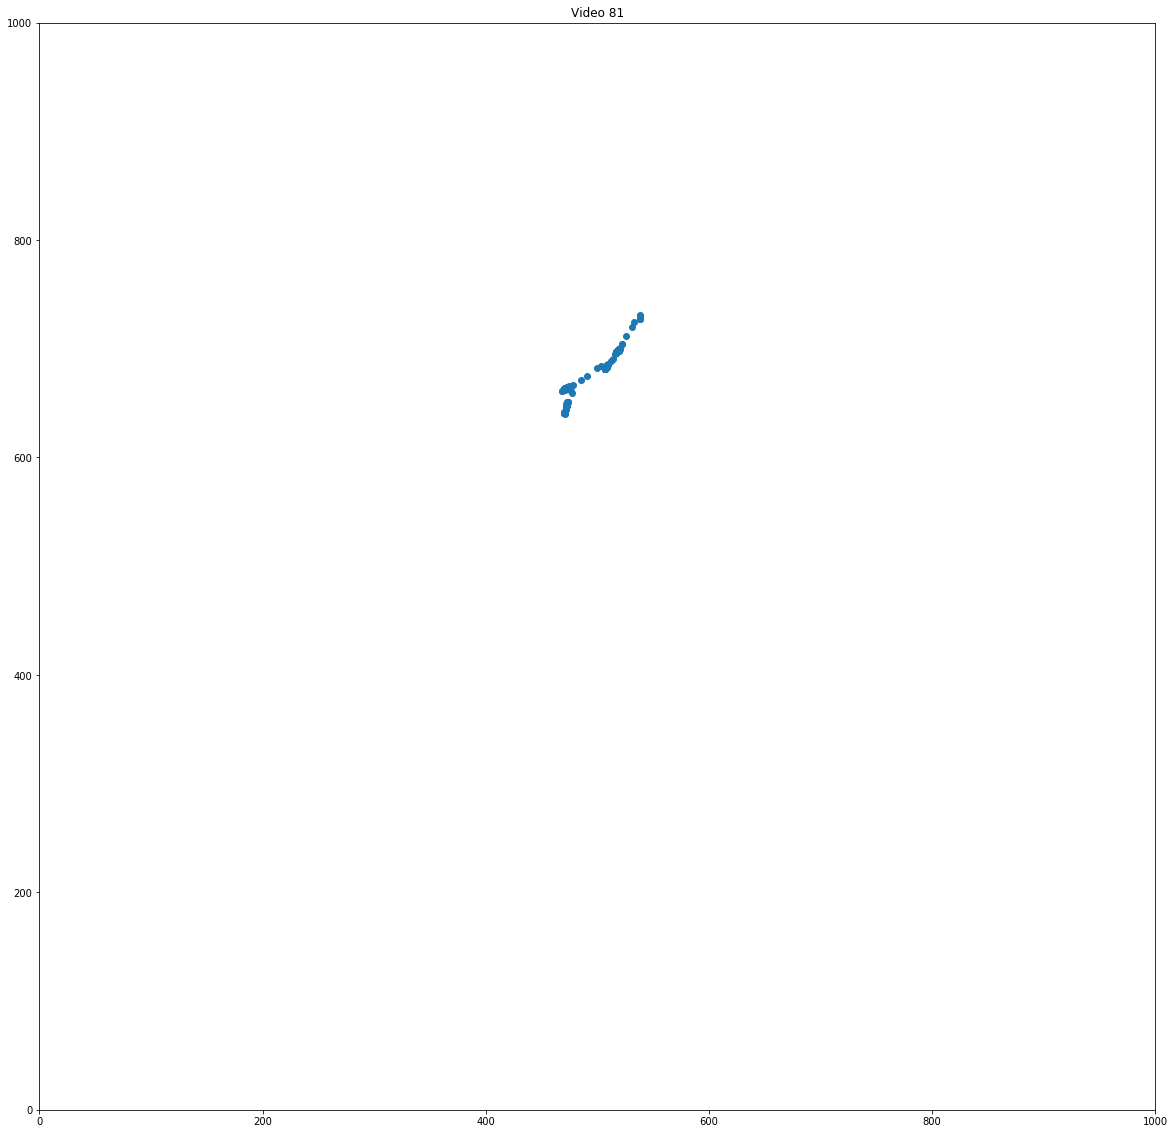

0.0 % tracked poorly


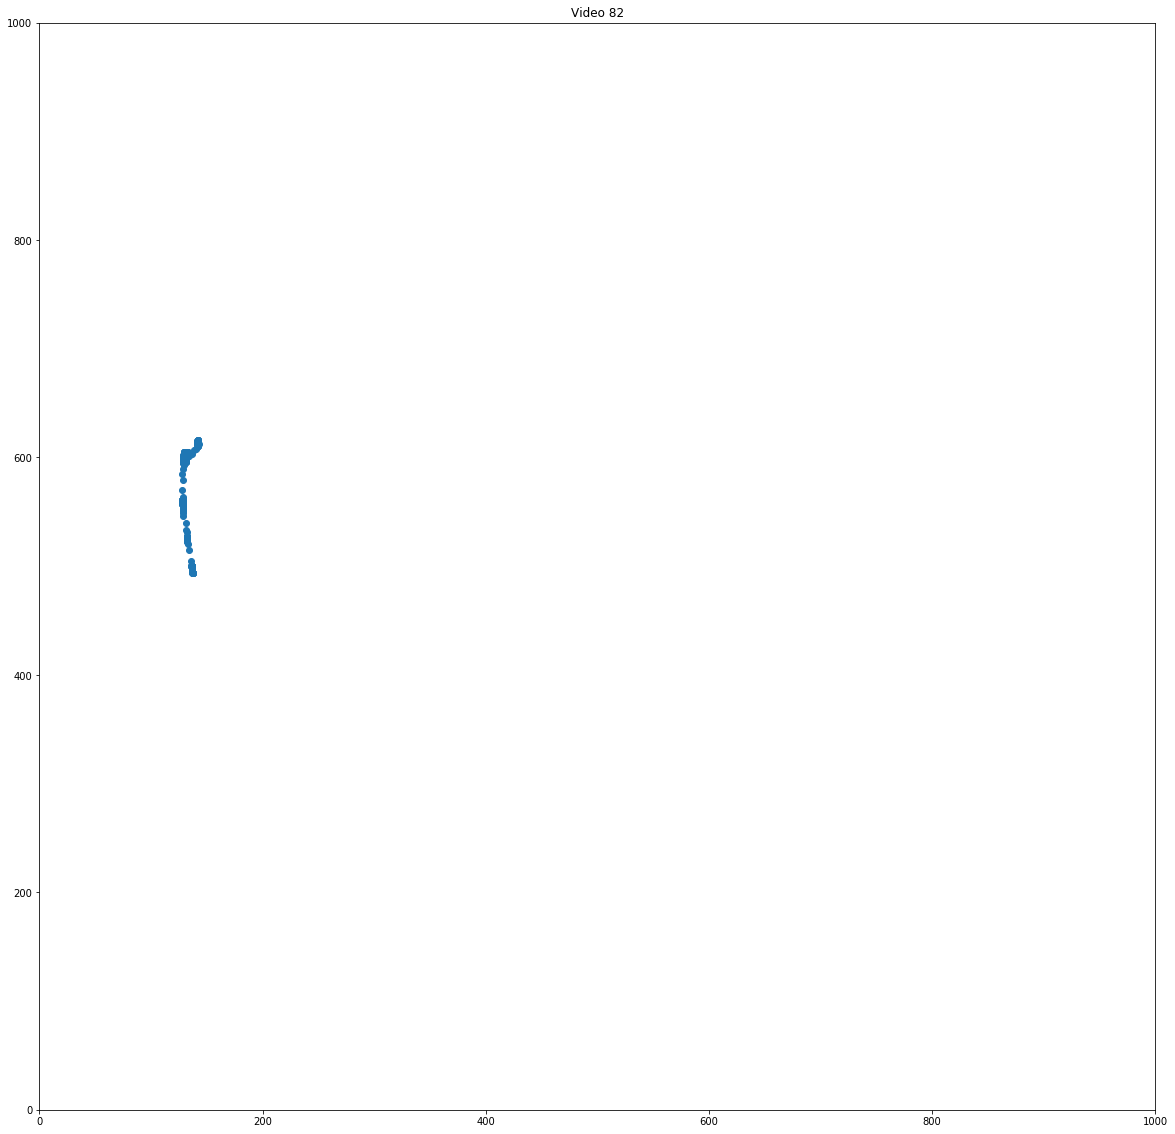

0.0 % tracked poorly


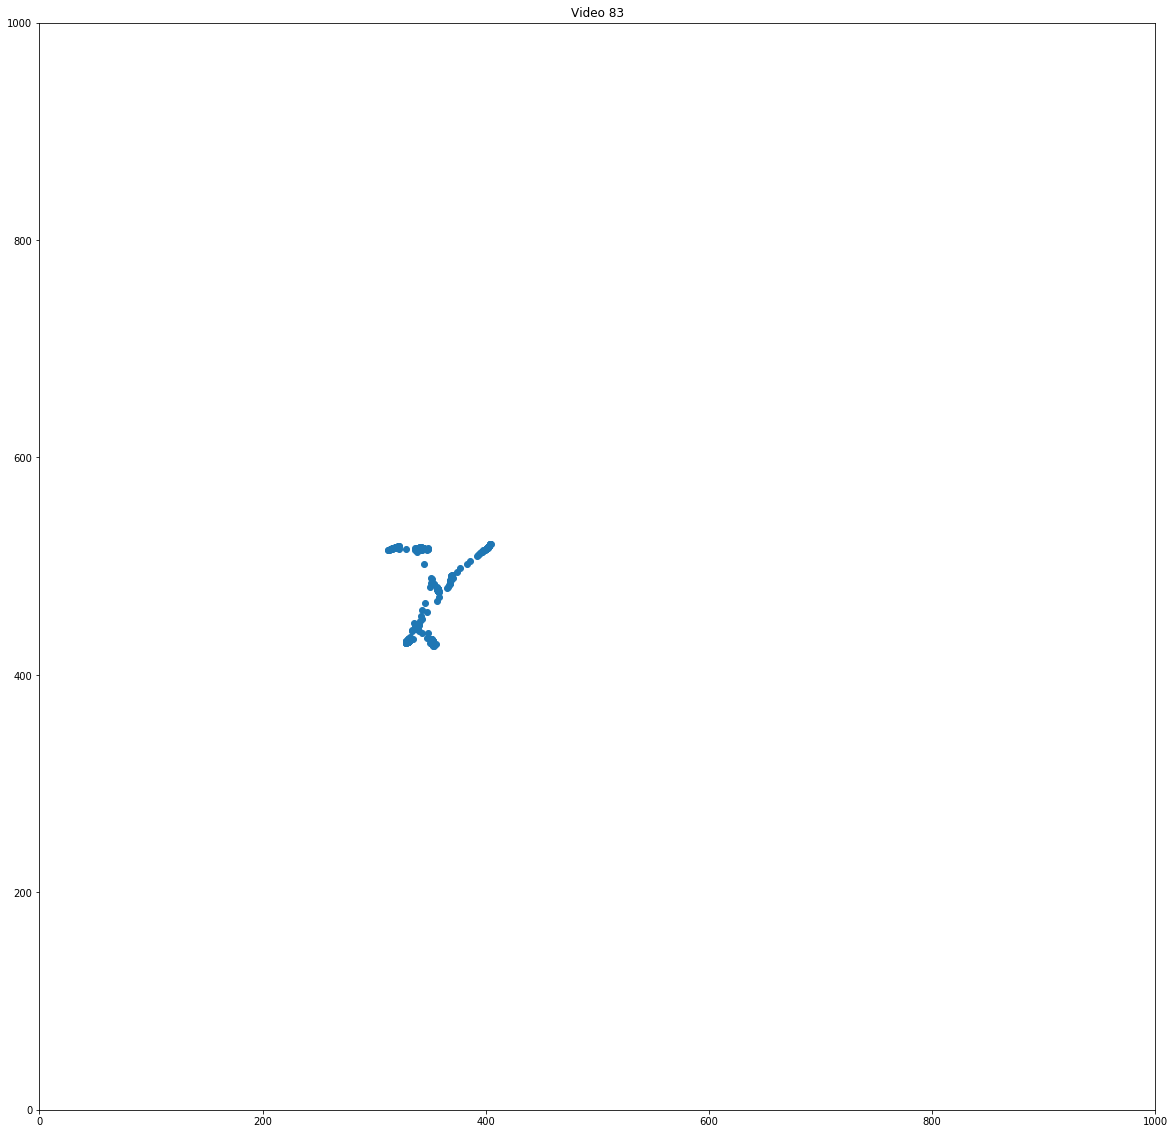

0.0 % tracked poorly


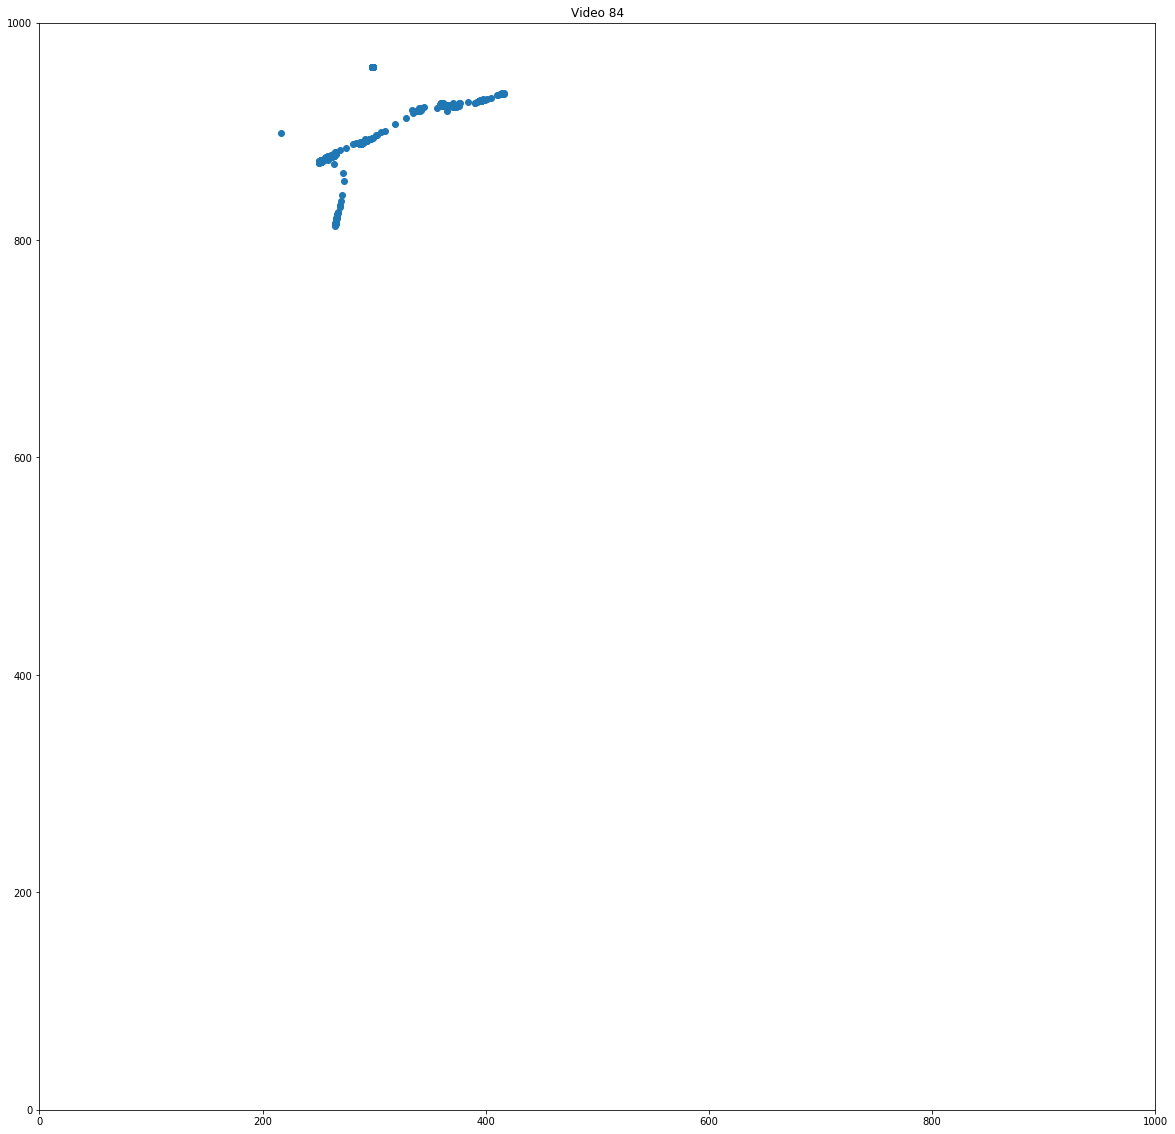

0.0 % tracked poorly


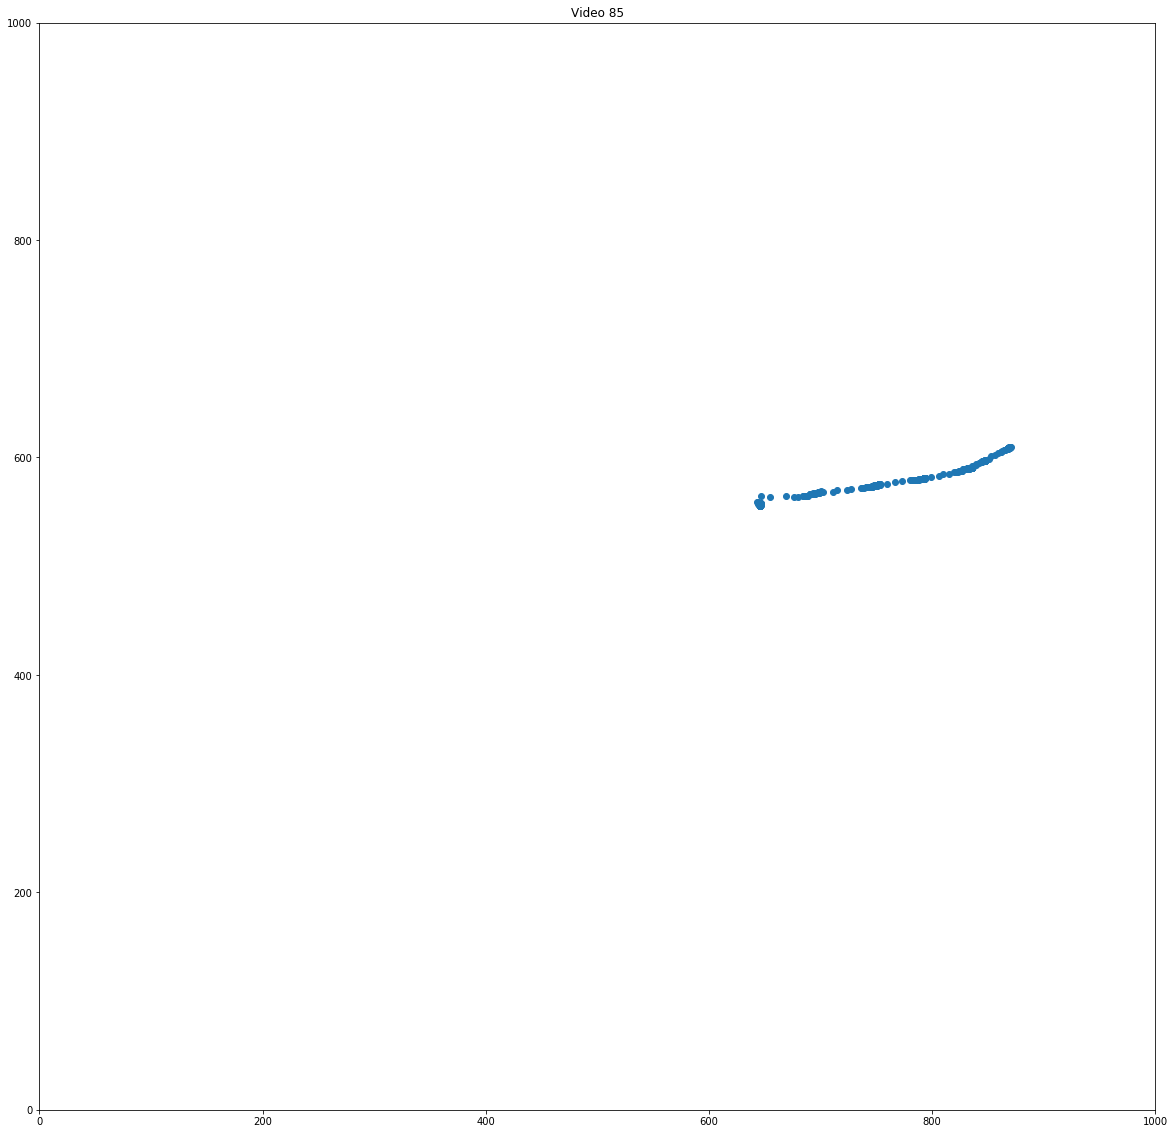

0.0 % tracked poorly


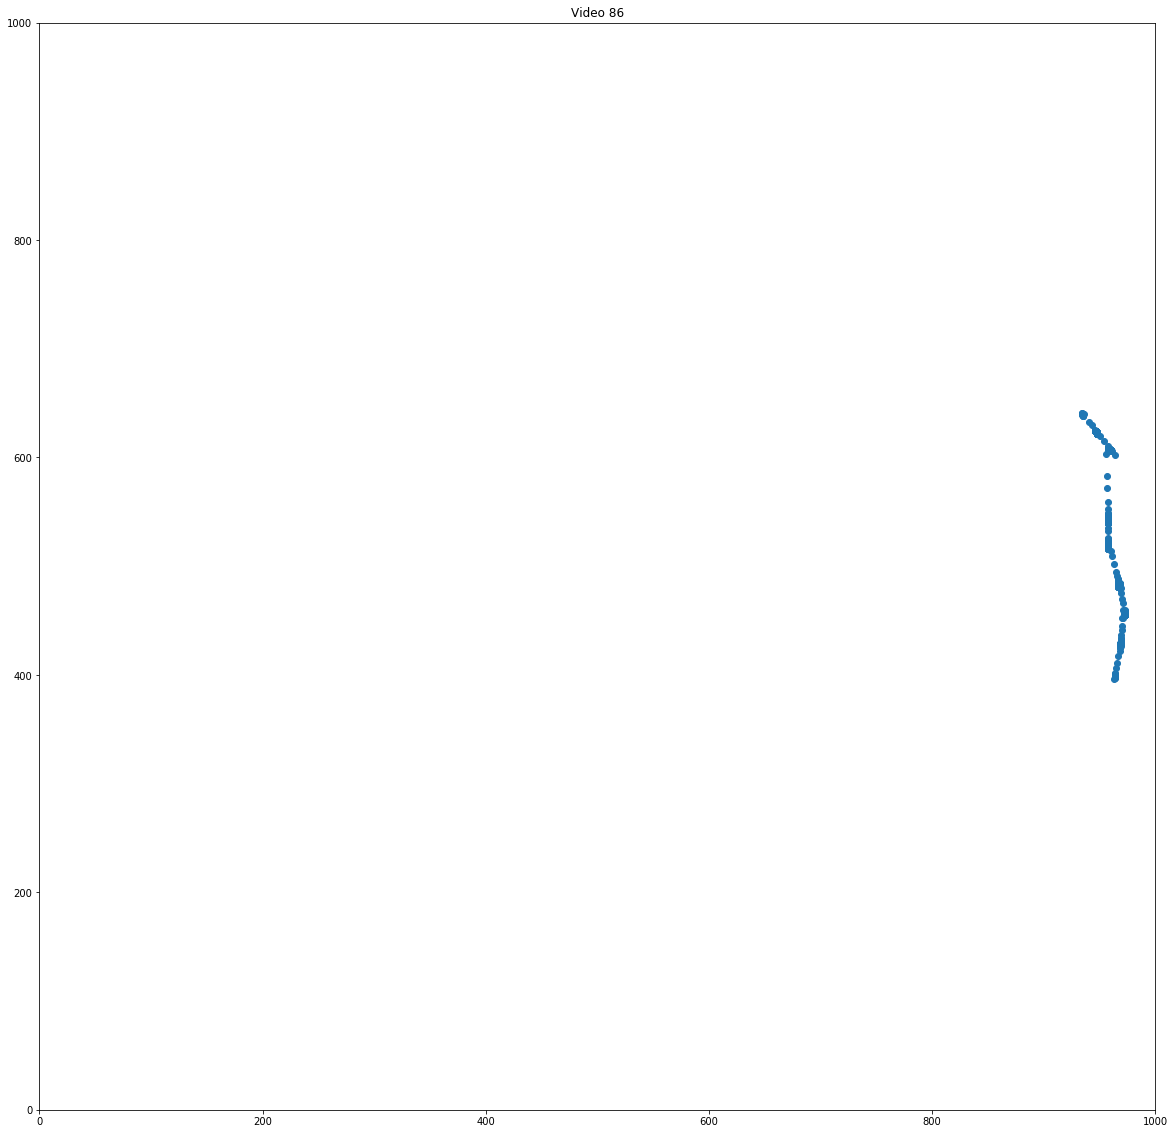

0.0 % tracked poorly


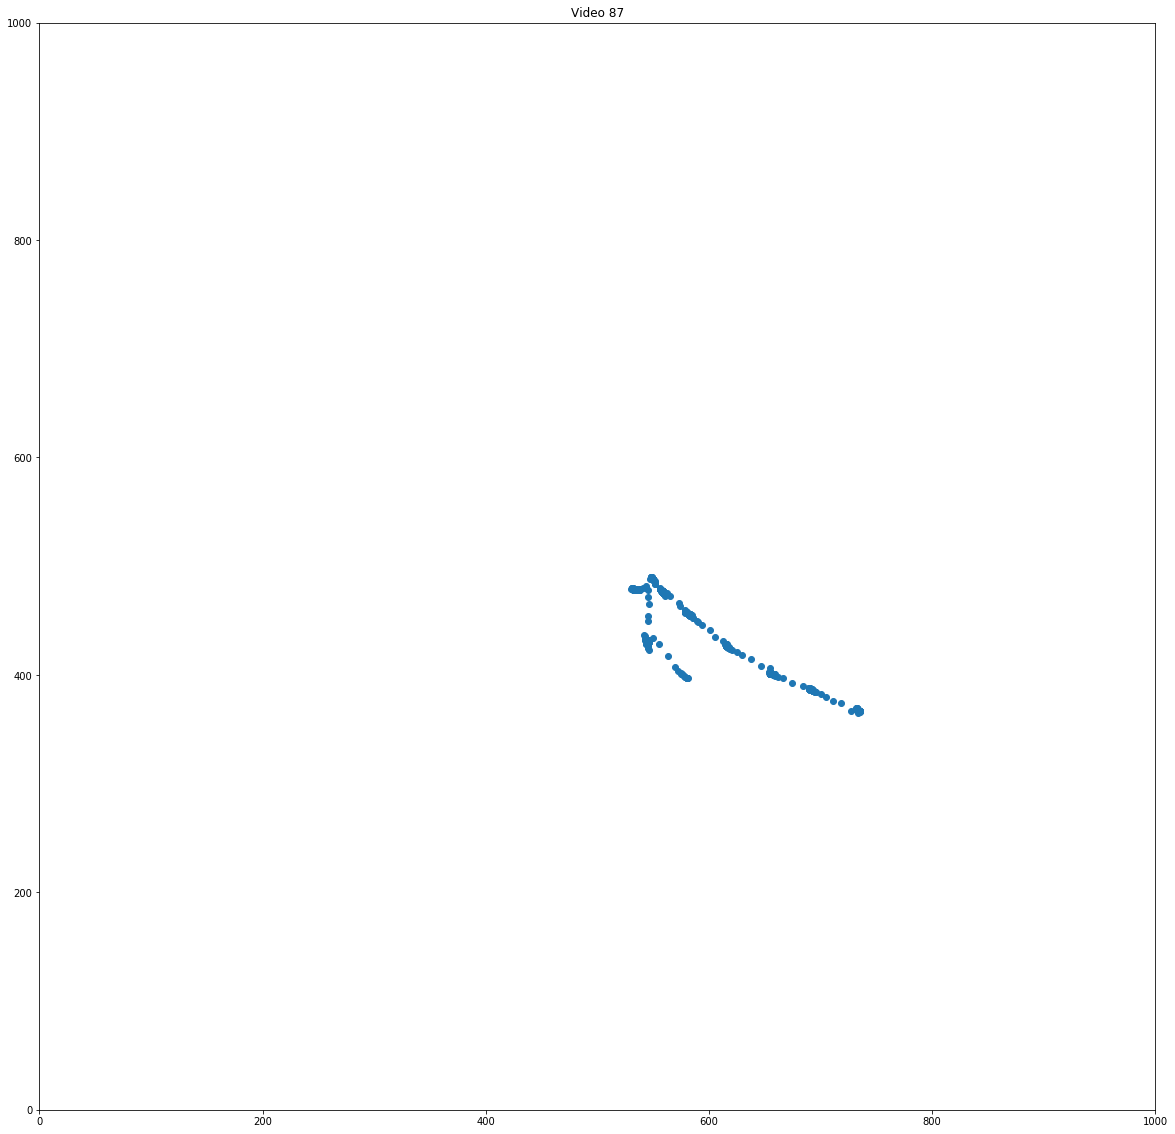

0.0 % tracked poorly


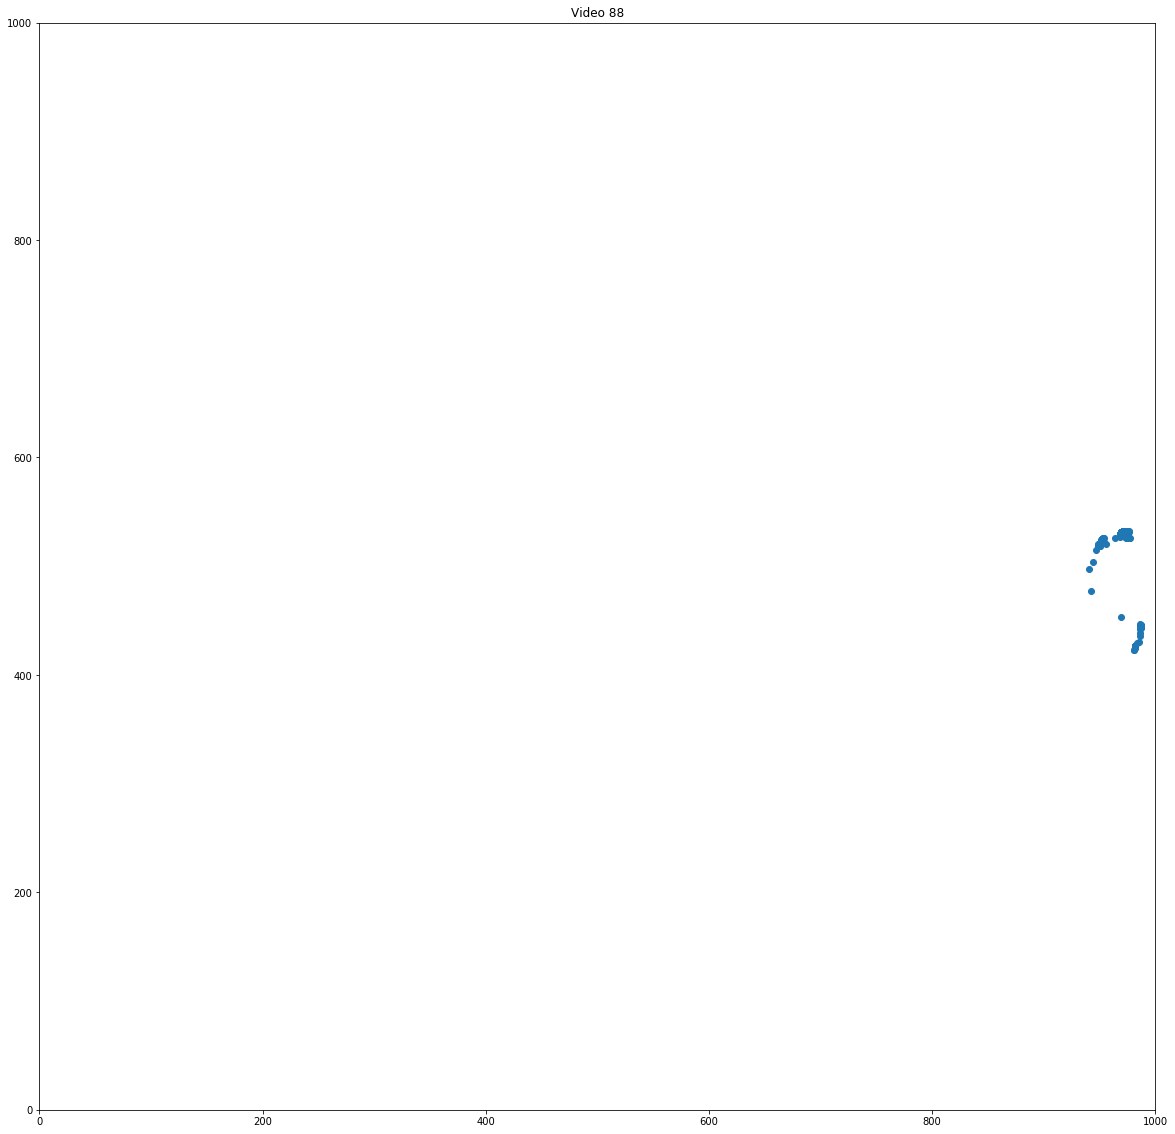

0.0 % tracked poorly


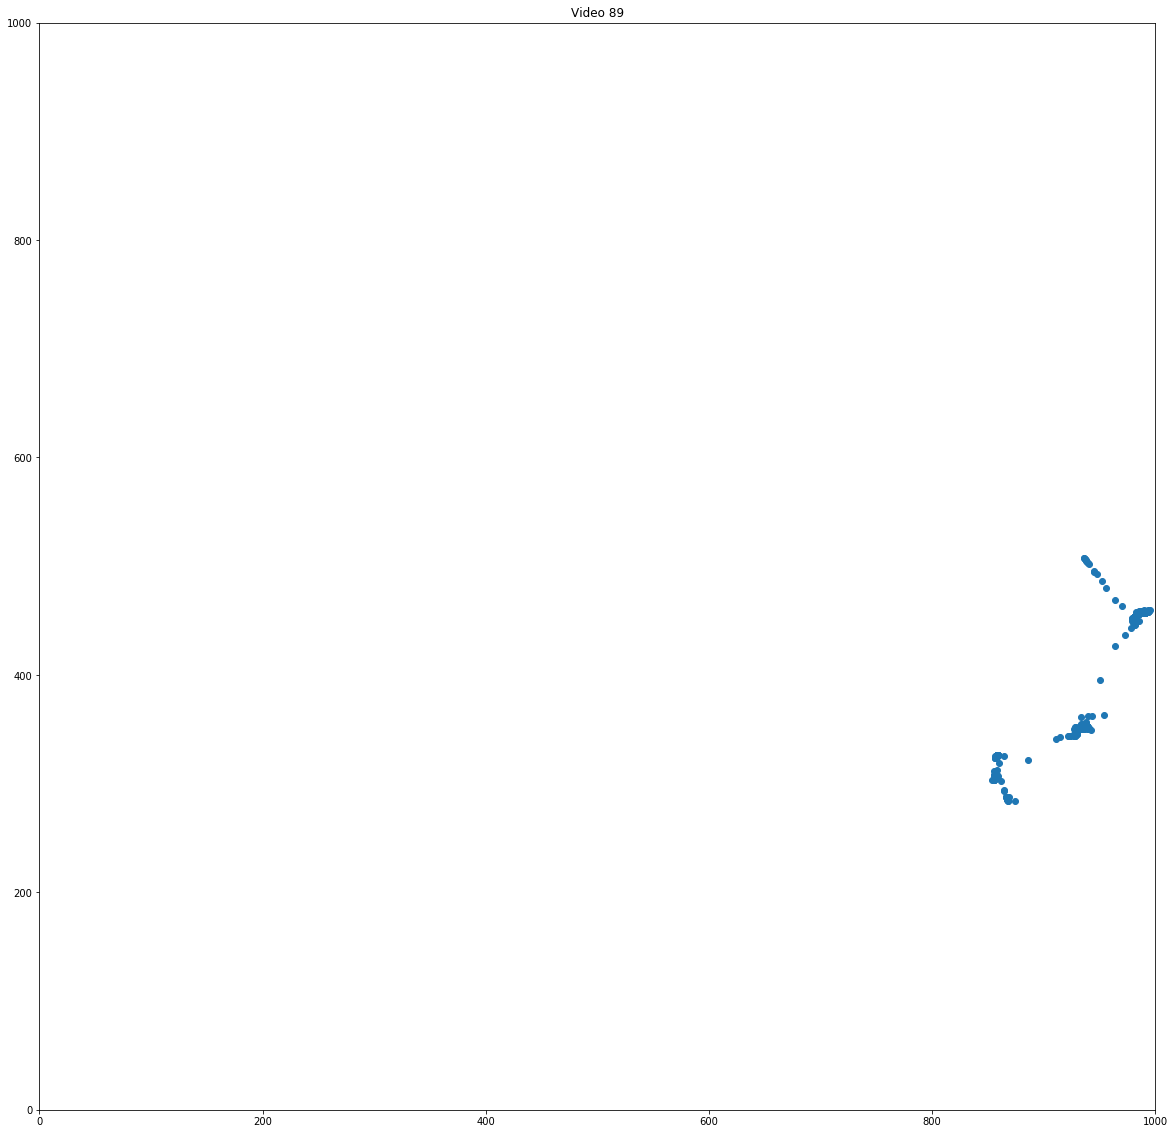

0.0 % tracked poorly


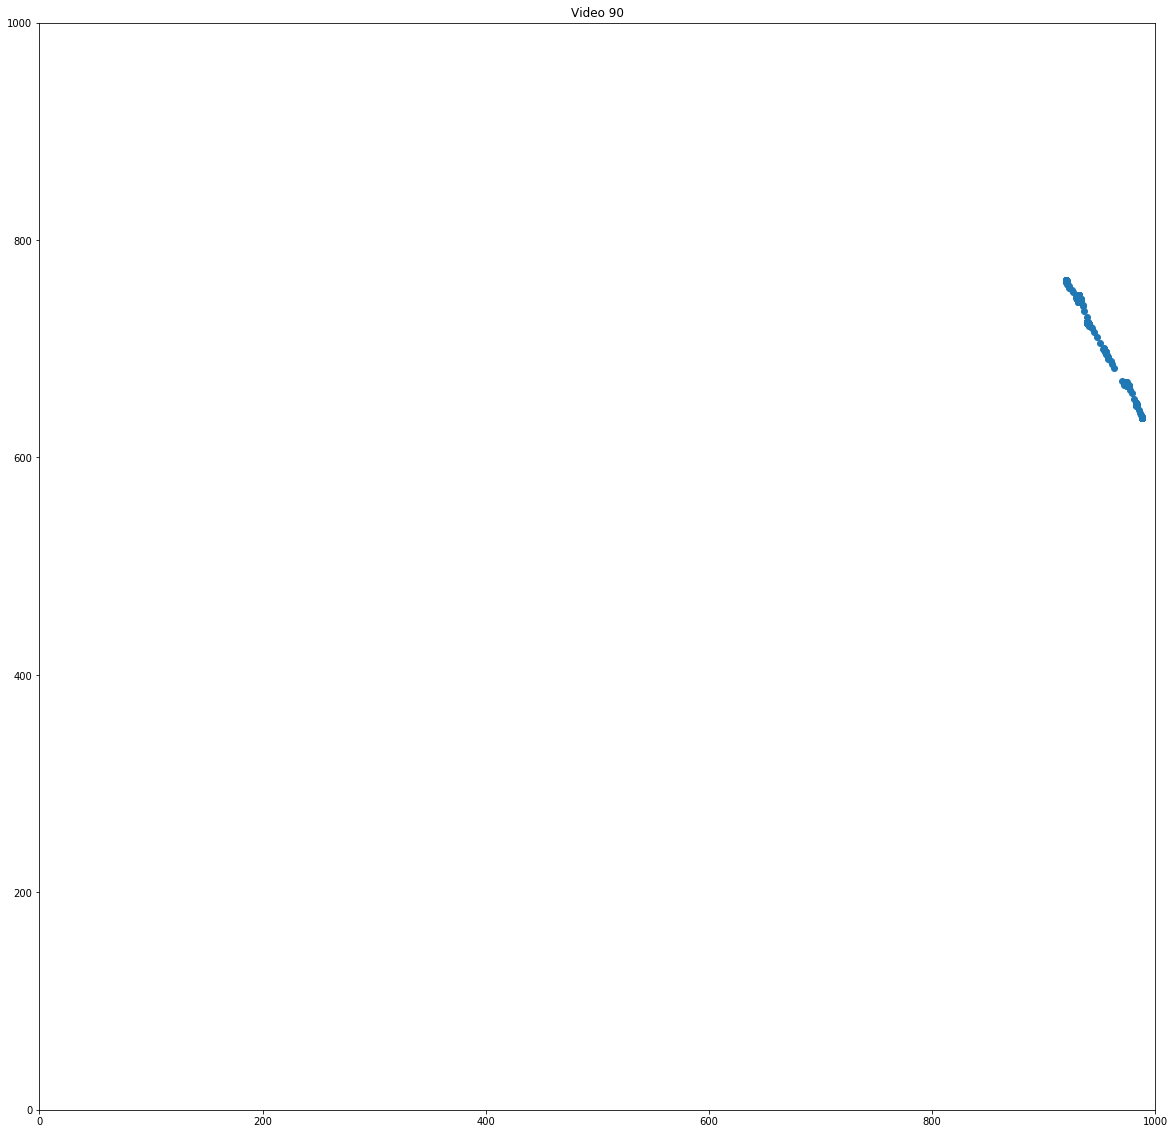

0.0 % tracked poorly


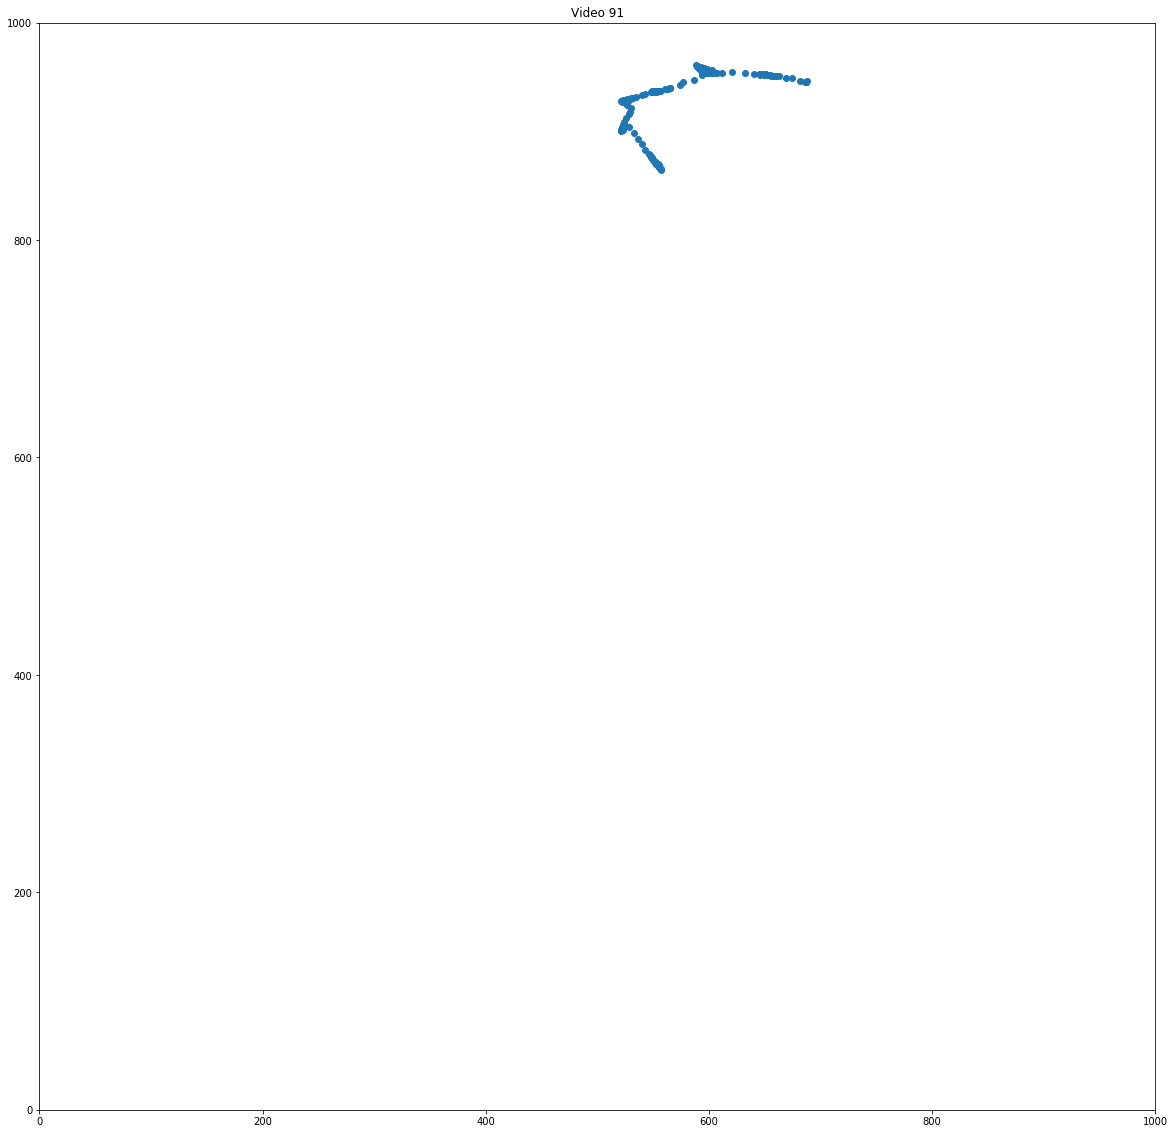

0.0 % tracked poorly


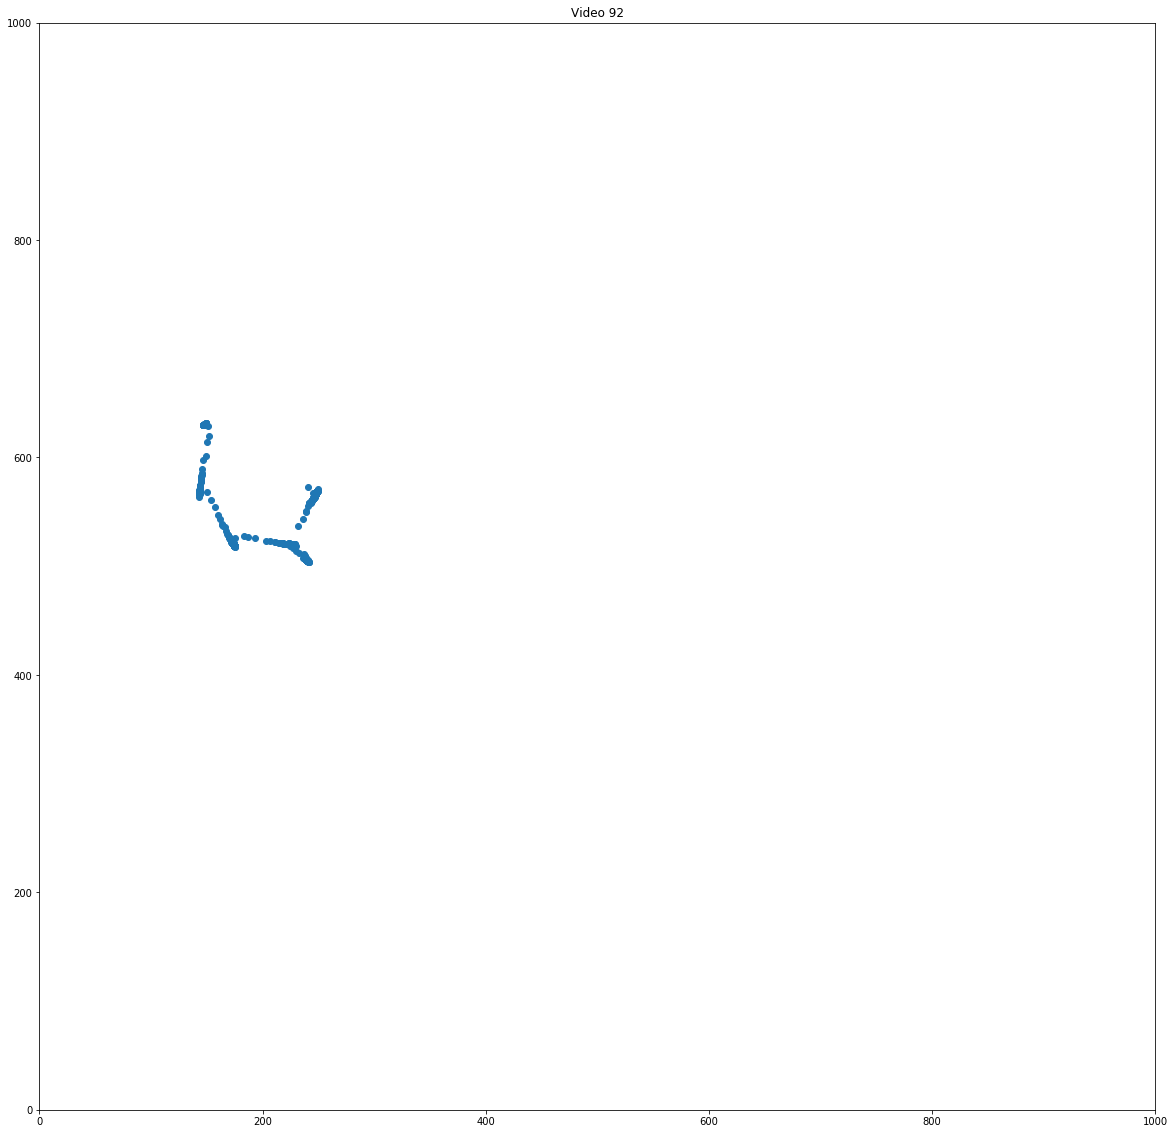

0.0 % tracked poorly


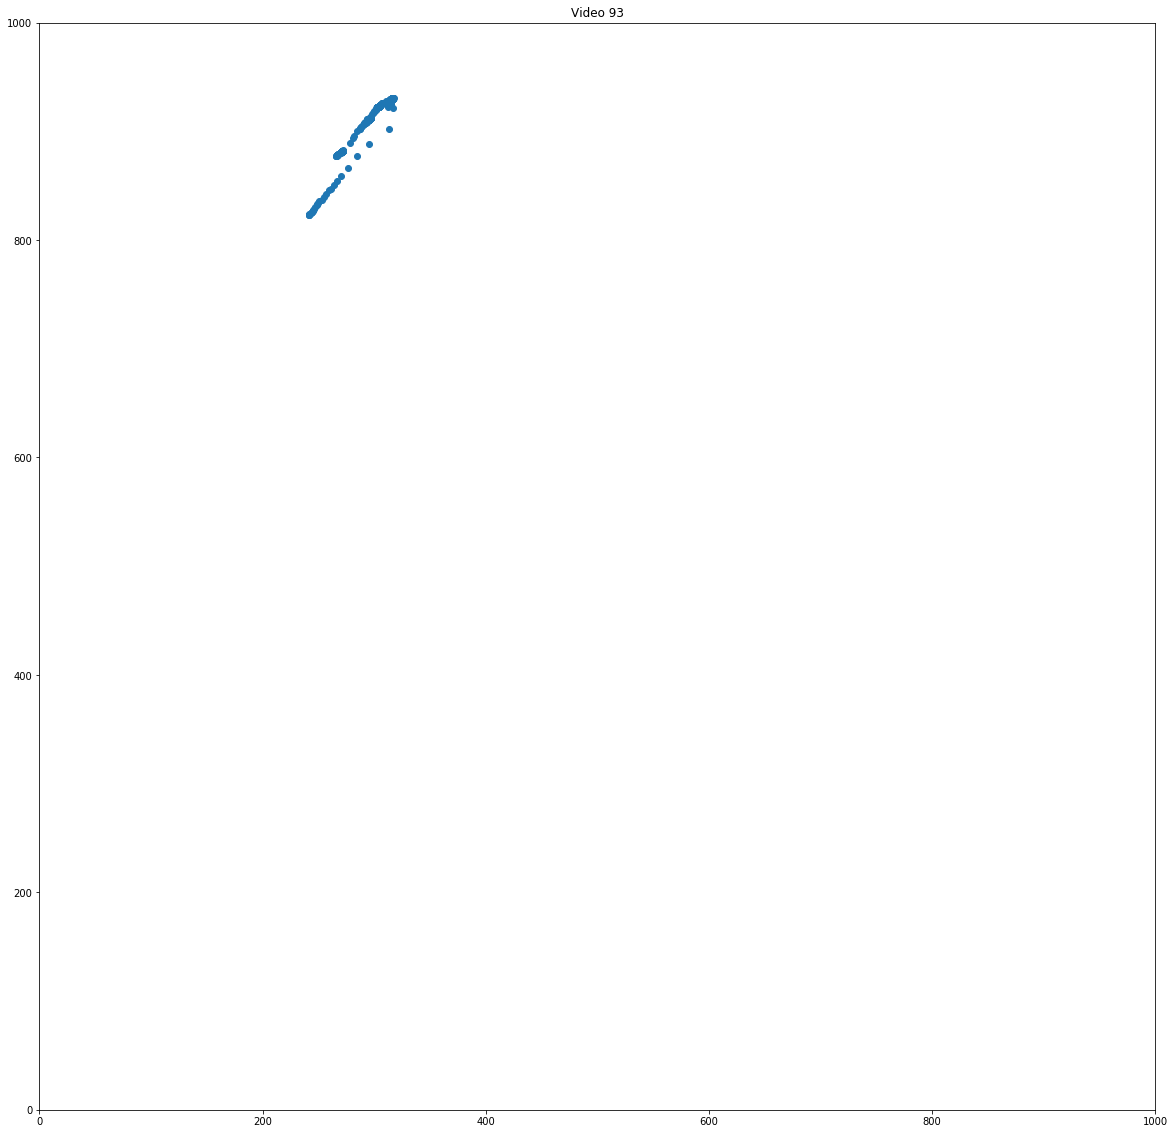

0.0 % tracked poorly


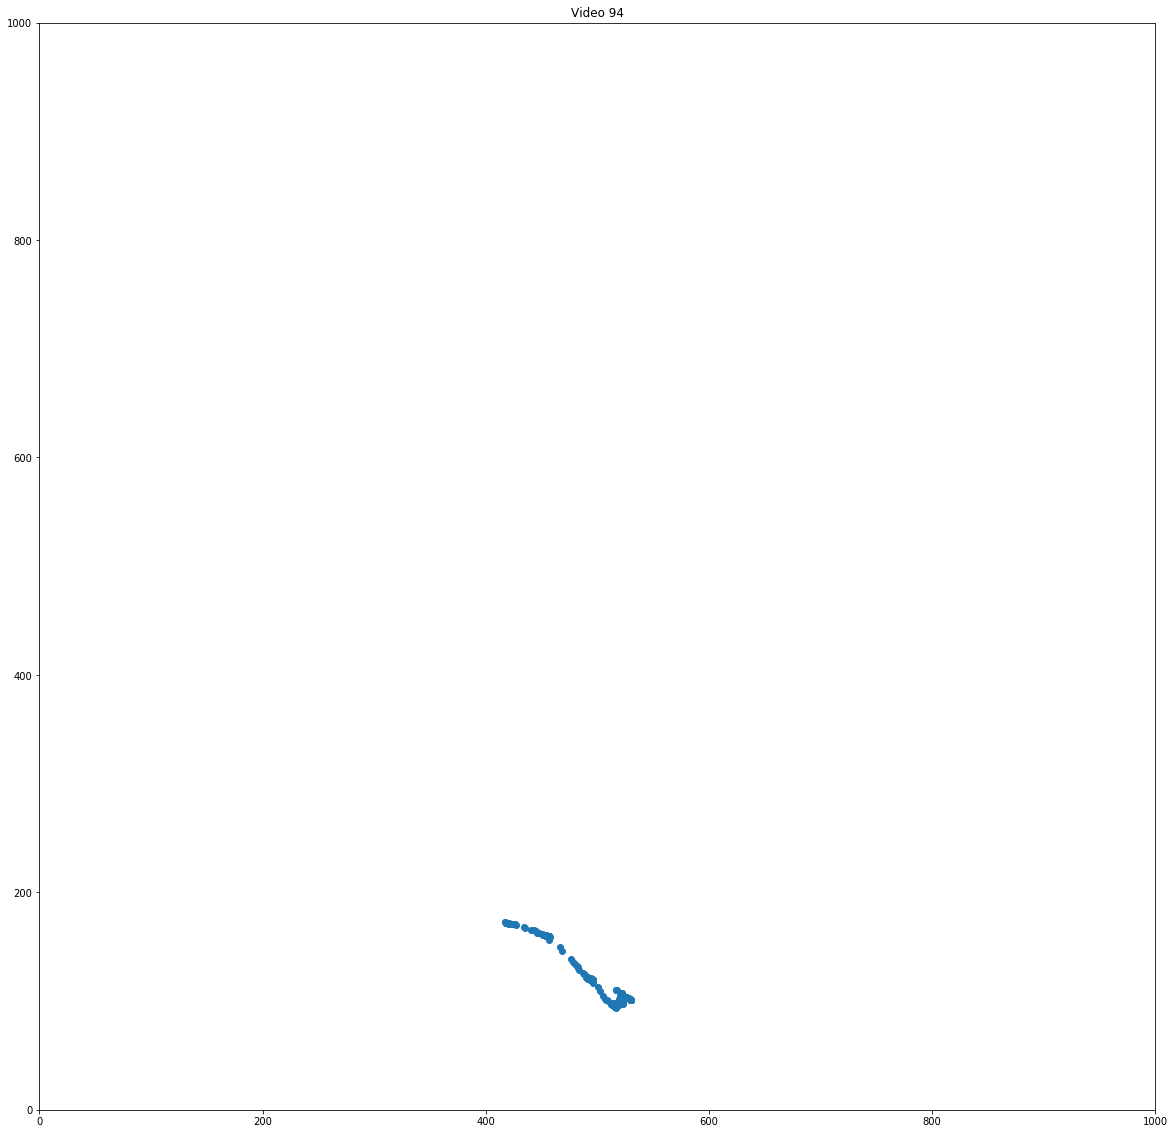

0.0 % tracked poorly


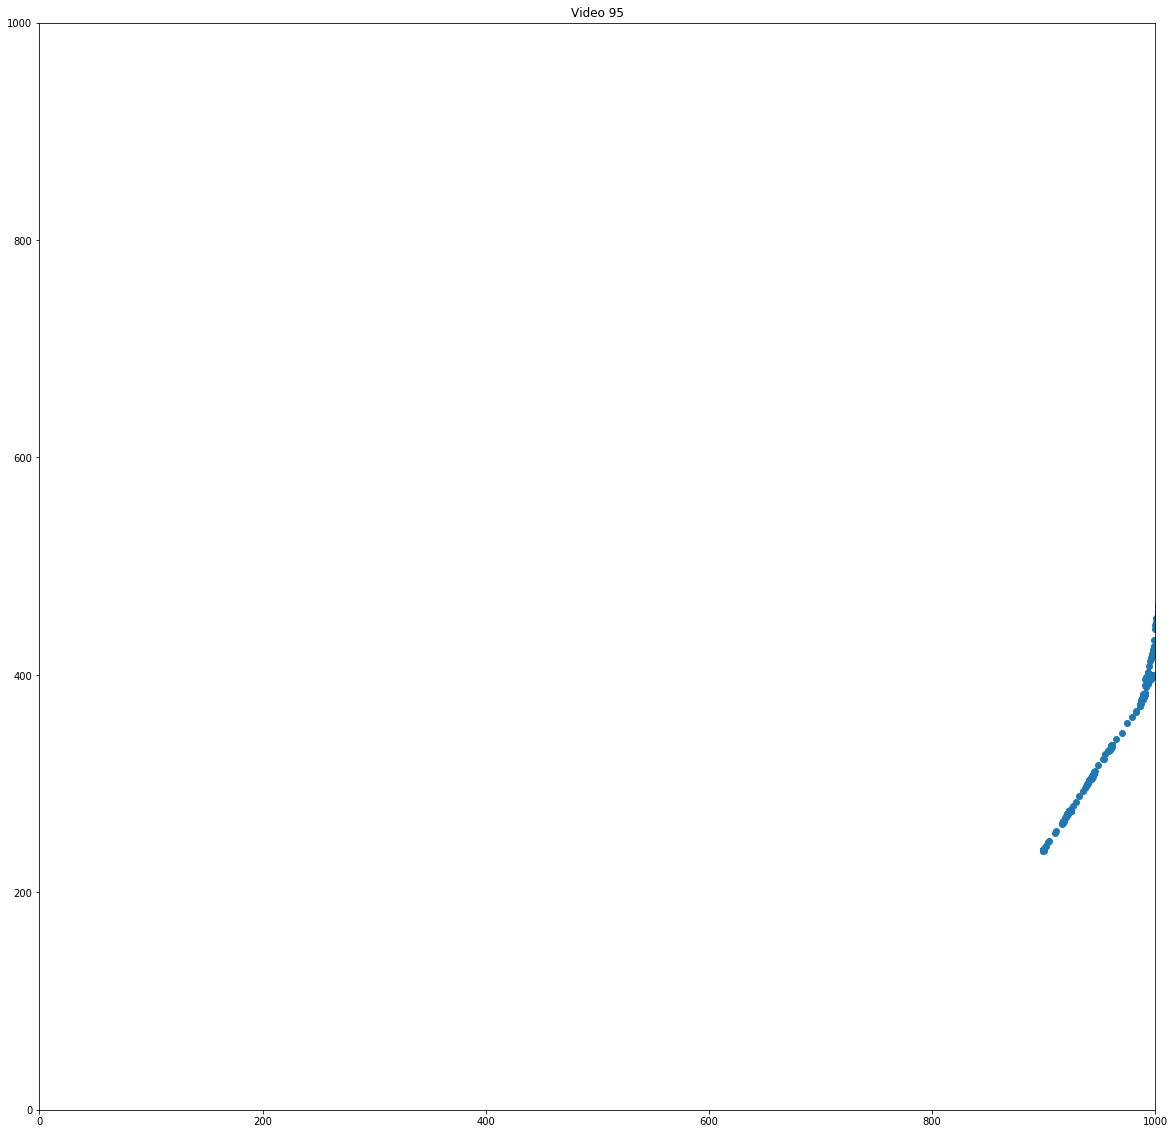

0.0 % tracked poorly


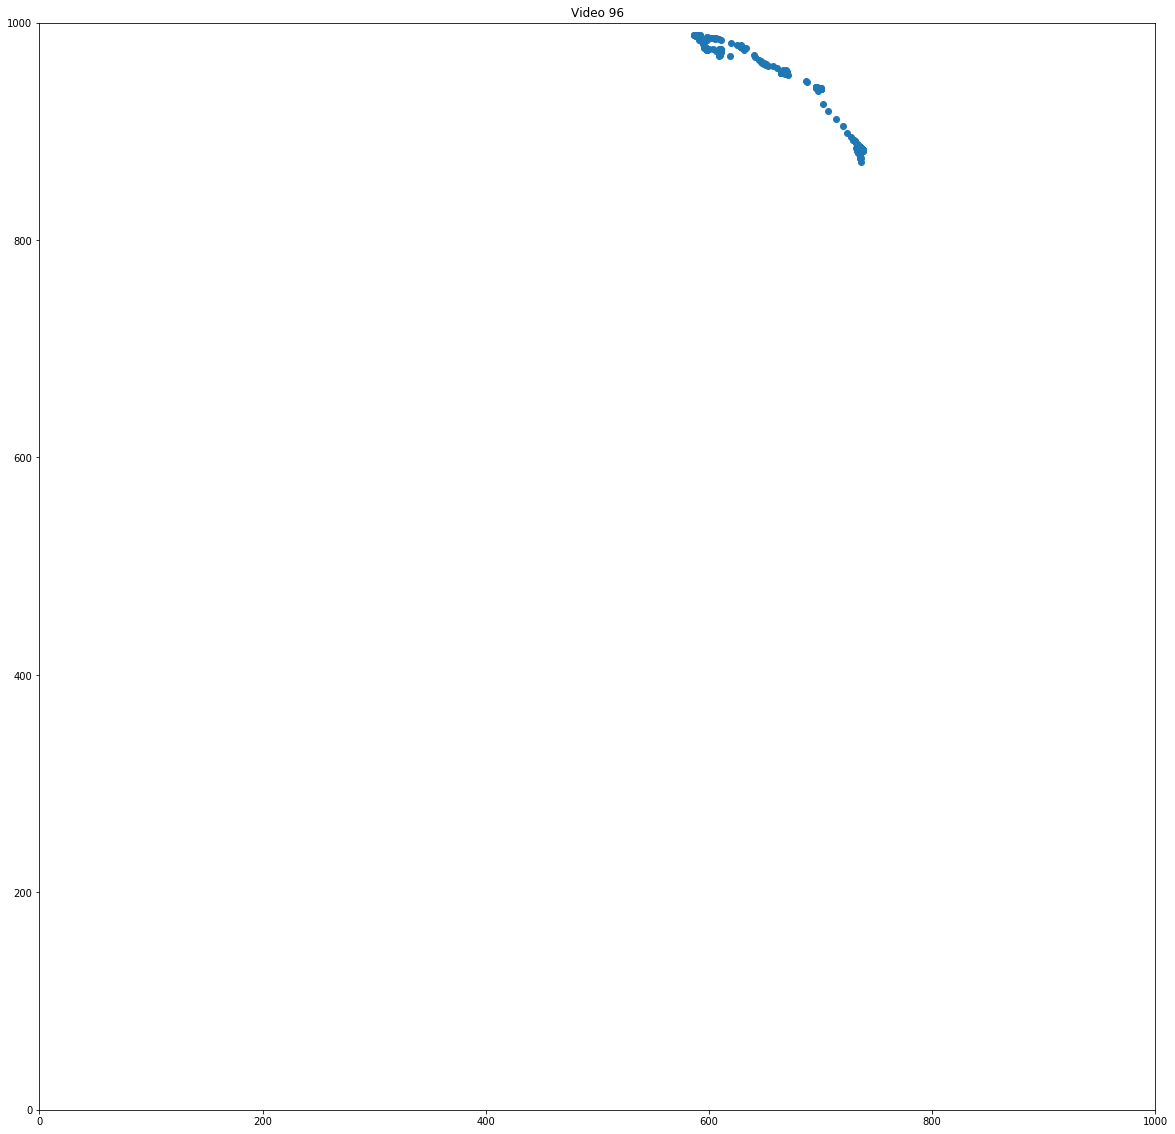

0.0 % tracked poorly


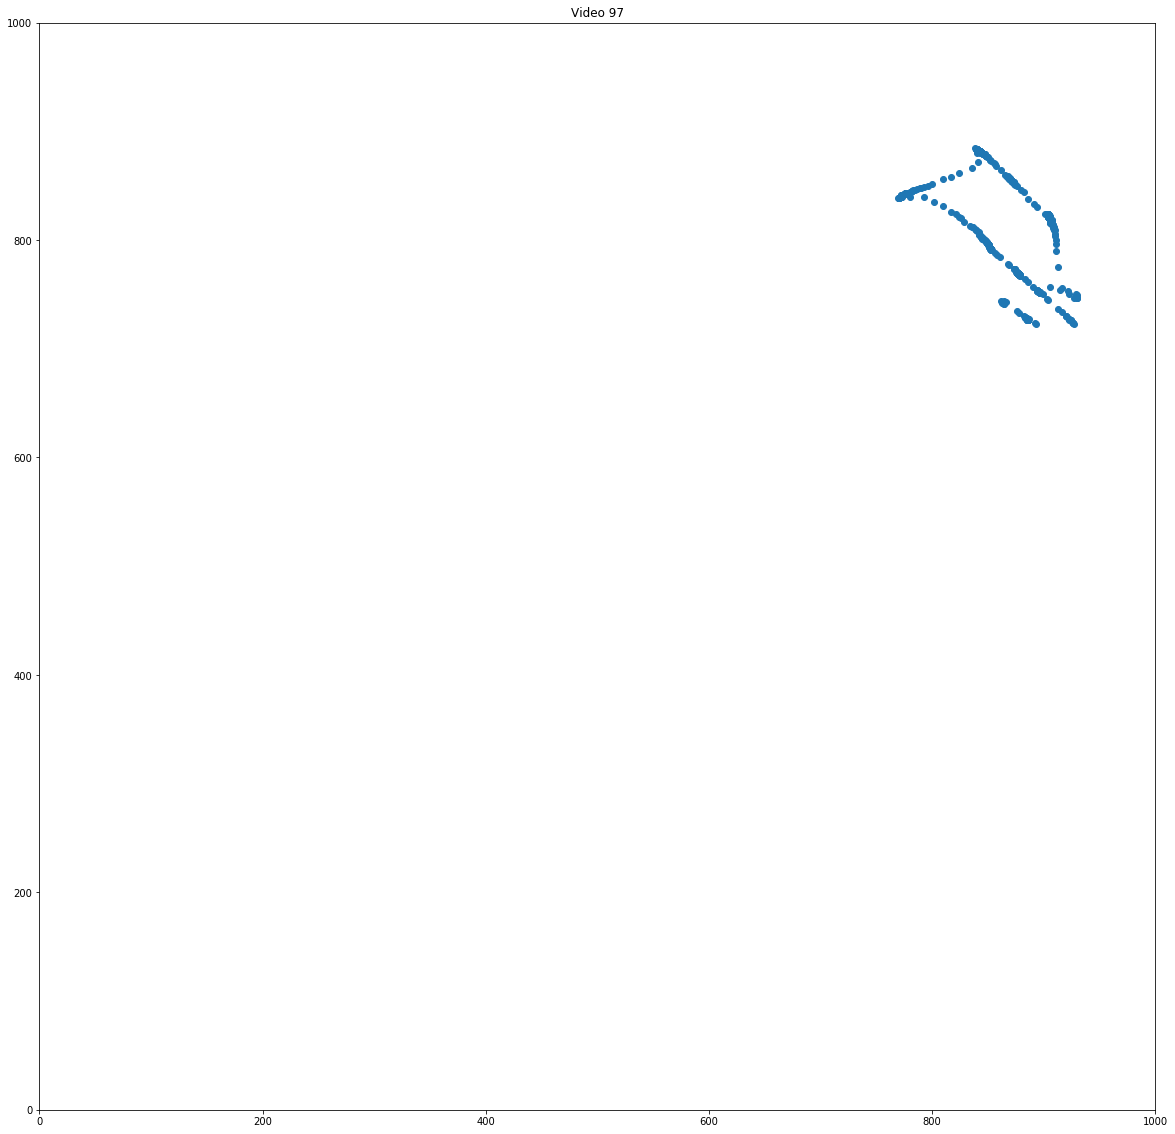

0.0 % tracked poorly


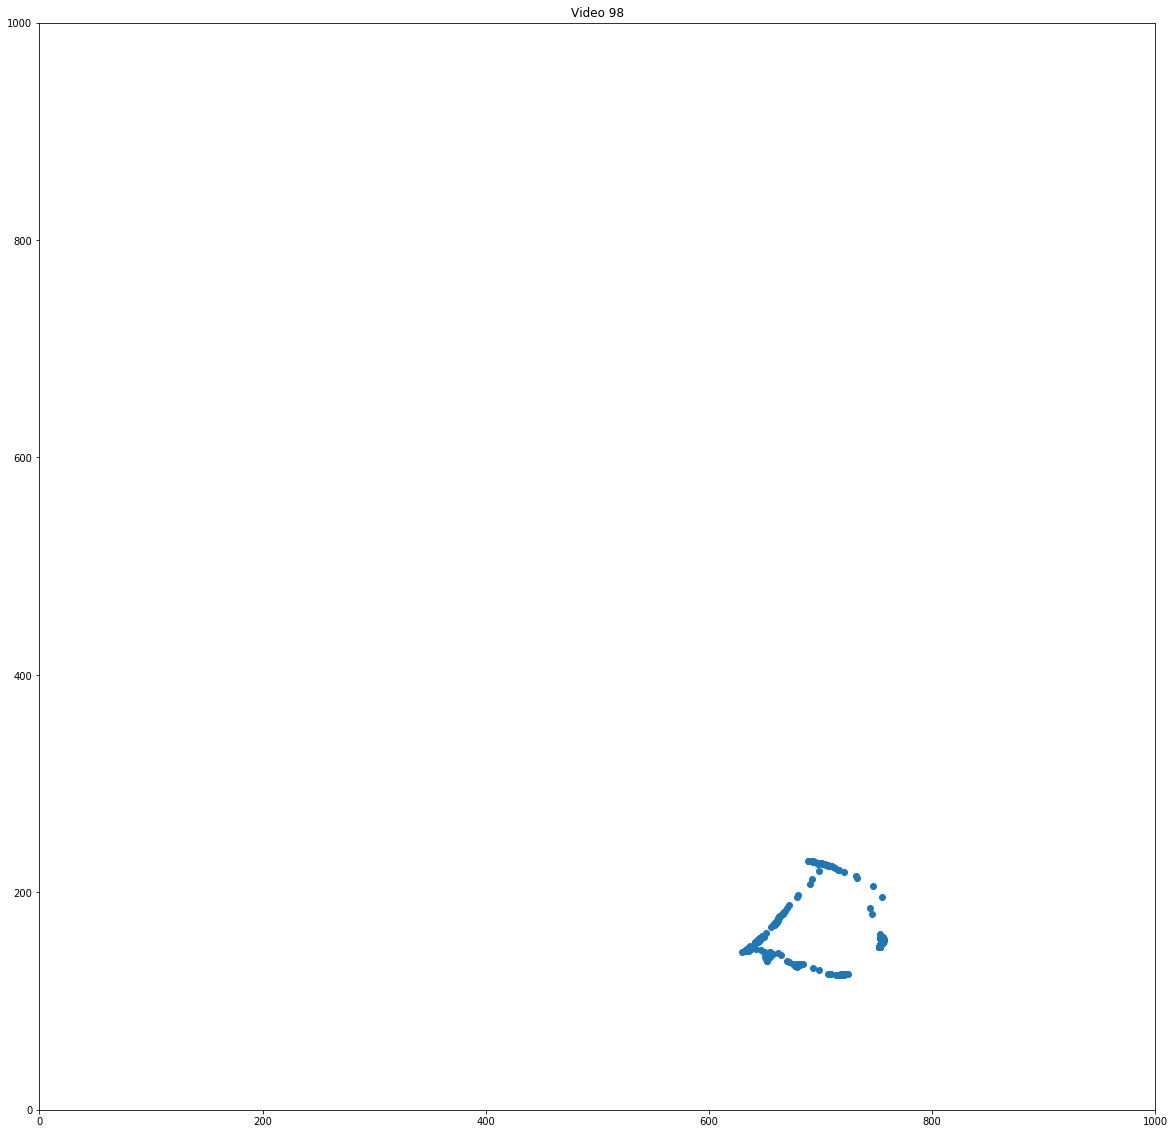

0.0 % tracked poorly


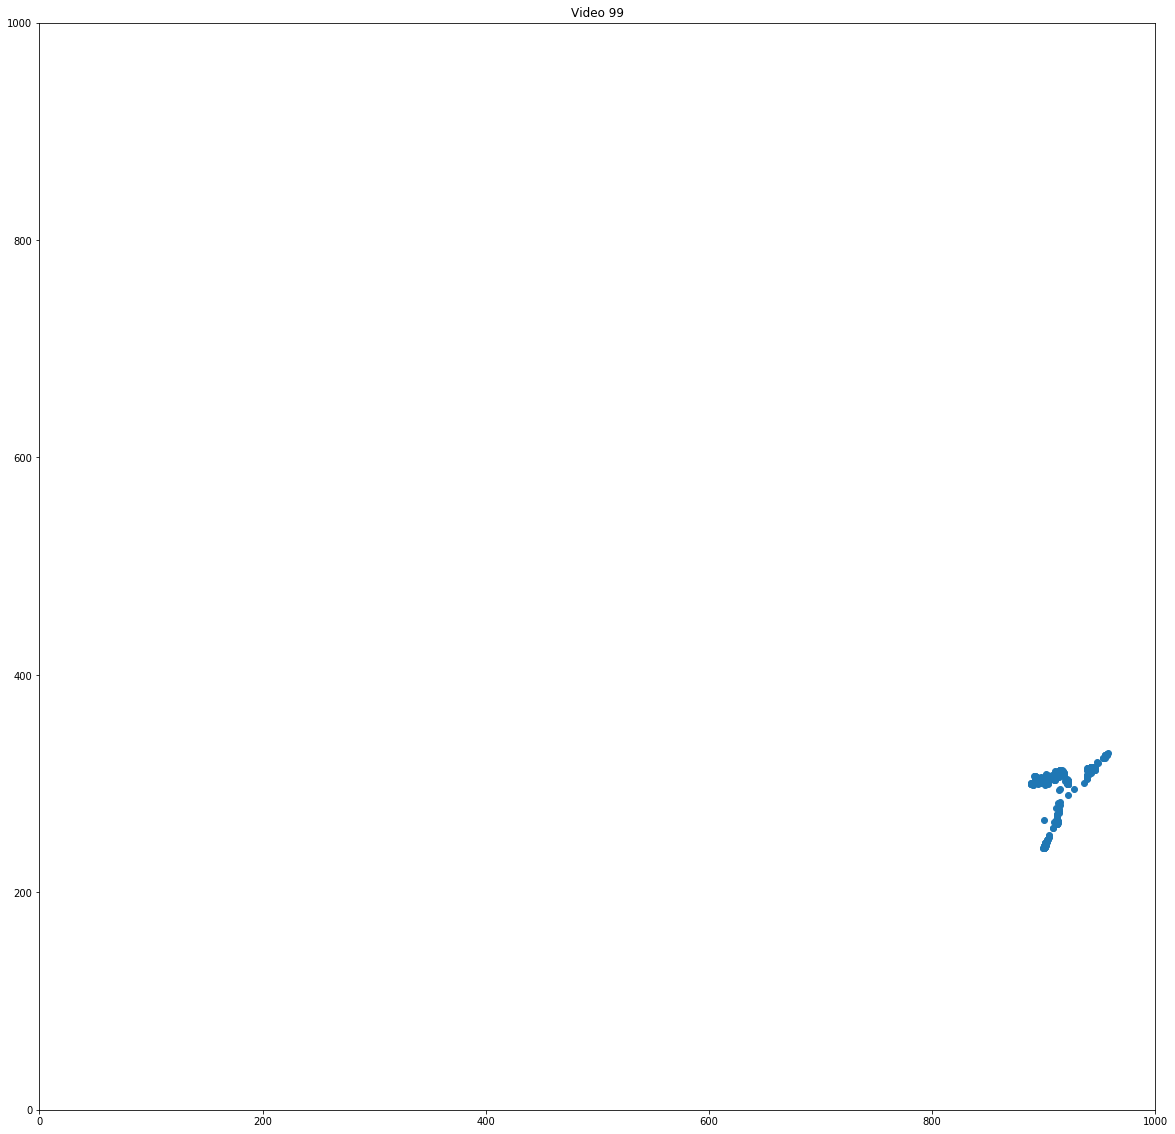

0.0 % tracked poorly


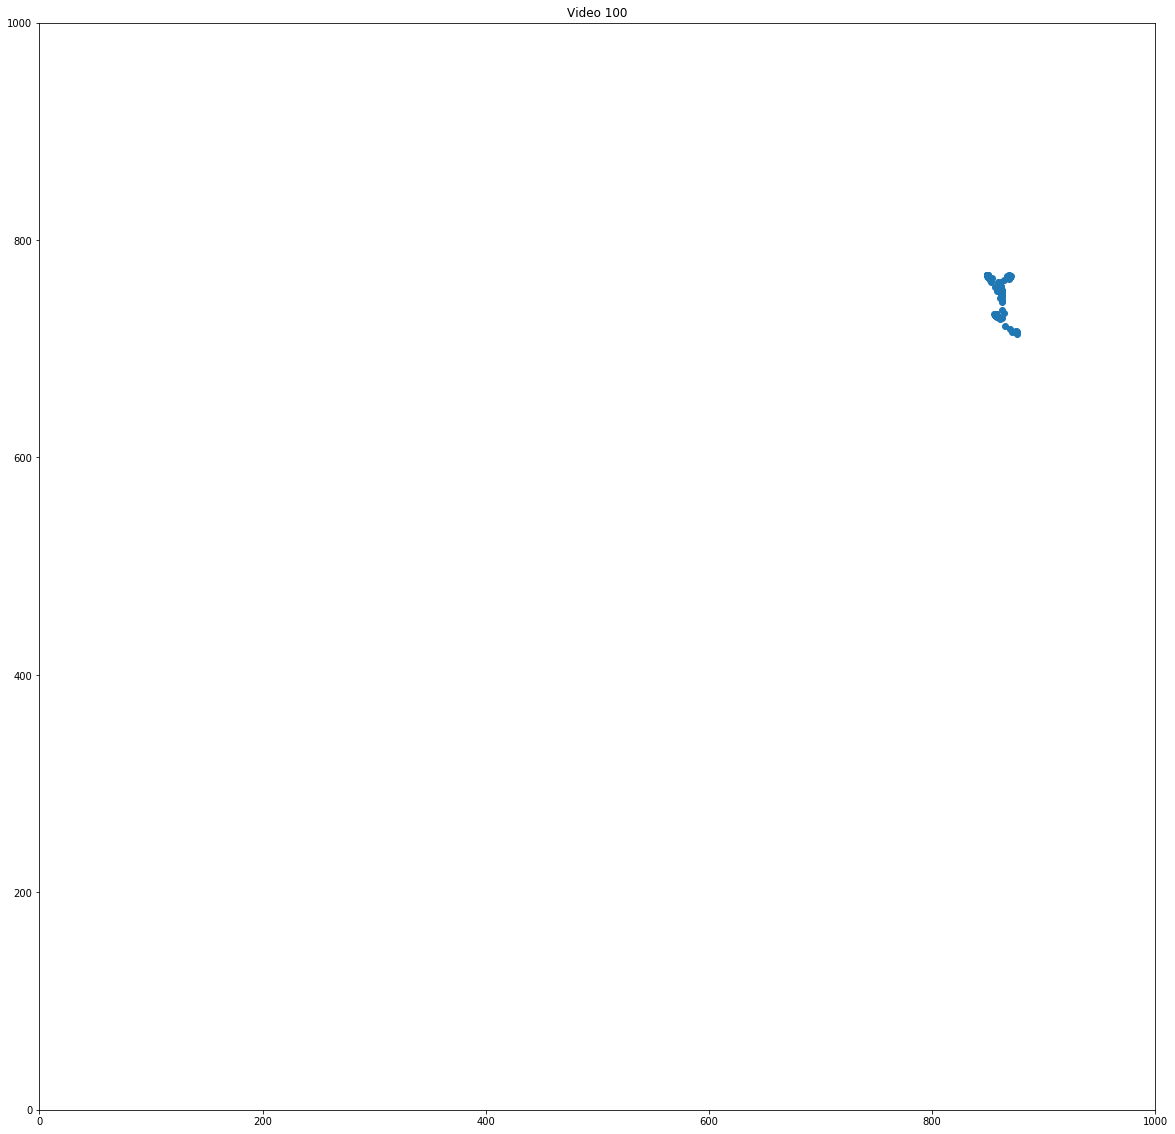

In [16]:
for i in range(1, 101):
    filename = "video" + str(i) + ".avi"
    cap = cv2.VideoCapture(location + filename)
    count = 0
    poor = 0
    x_coor = []
    y_coor = []

    while cap.isOpened:
        count += 1
        
        if count >= 605:
            break

        #load the frame
        ret,frame = cap.read()
    
        #check if frame has been loaded, break otherwise
        if ret == 0:
            break
    
        #convert images from (x, x, x) to (x) format
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
        #find forground 
        fg = cv2.medianBlur(frame, k) - bg
        
        #rescale the foreground
        fg = cv2.convertScaleAbs(fg)
        #fg = cv2.medianBlur(fg, 11)
    
        #binary threshold, fish in white and bg in black
        _, thresh = cv2.threshold(fg, 15, 255, cv2.THRESH_BINARY)
    
        #find largest contour which must be the fish, adjust threshold value otherwise
        contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
        if len(contours) == 0:
            x_coor.append(float("NaN"))
            y_coor.append(float("NaN"))
            poor += 1
            continue
    
        #find largest contour
        largest = max(contours, key = cv2.contourArea)
        
        M = cv2.moments(largest)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        cv2.circle(frame, (cX, cY), 5, 255, -1)


    
        #finding minimum enclosing circle of largest contour
        (x,y),radius = cv2.minEnclosingCircle(largest)
    
        #convert x and y to int
        x = int(x)
        y = int(y)
    
        x_coor.append(cX)
        y_coor.append(cY)
    
        #cv2.circle(frame, (x, y), 3, 0, -1)
        cv2.imshow("fish " + str(i), frame)                
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        
    print(poor / count, "% tracked poorly")
    
    cap.release()
    cv2.destroyAllWindows()
    
    #write coordinates into csv file    
    output = [x_coor, y_coor]
    fields = ["x","y"]
    plt.figure(figsize = (20, 20))
    plt.scatter(x_coor, y_coor)
    plt.xlim((0, 1000))
    plt.ylim((0, 1000))
    plt.title("Video " + str(i))
    plt.show()

    with open(location + "coordinates" + str(i) + ".csv", "w") as csv_file:
        csvwriter = csv.writer(csv_file)
        csvwriter.writerow(fields)
        for i in range(len(output[0])):
            csvwriter.writerow([output[0][i], output[1][i]])

In [ ]:
dist = []
for i in range(len(x_coor) - 1):
    distance = ((x_coor[i] - x_coor[i + 1]) ** 2 + (y_coor[i] - y_coor[i - 1]) ** 2) ** 0.5
    if distance > 0:
        dist.append(distance)
dist[0] = 0
dist = pd.Series(dist)
plt.figure(figsize = (20, 10))
plt.plot(dist.rolling(1).mean())
#plt.plot([0, 800], [0, 0], "k")

# Motion Detection

In [ ]:
# cap = cv2.VideoCapture(location + filename)

# count = 0
# poor = 0

# #center coordinates of fg 

# x_coor = []
# y_coor = []

# #center coordinates of eyes and swim bladder 

# x_c = []
# y_c = []

# while cap.isOpened:
    
#     count += 1
#     #load the frame
#     ret,frame = cap.read()
    
#     #check if frame has been loaded, break otherwise
#     if ret == 0:
#         print("Video is over, prolly")
#         print("Tracked frames = ", (count - poor)/count * 100, "%")
#         break
    
#     #convert images from (x, x, x) to (x) format
#     frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
#     #find forground 
#     fg = cv2.medianBlur(frame, k) - bg
        
#     #rescale the foreground
#     fg = cv2.convertScaleAbs(fg * 1.5)
    
    
#     #binary threshold, fish in white and bg in black
#     _, thresh = cv2.threshold(fg, 10, 255, cv2.THRESH_BINARY)
    
#     #find largest contour which must be the fish, adjust threshold value otherwise
#     contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
#     #find largest contour
#     largest = max(contours, key = cv2.contourArea)
    
#     #finding minimum enclosing circle of largest contour
#     (x,y),radius = cv2.minEnclosingCircle(largest)
    
#     #convert x and y to int
#     x = int(x)
#     y = int(y)
    
#     #append x and y values to x_coor and y_coor respectively
#     x_coor.append(x)
#     y_coor.append(y)
    
#     size = 100 #size of window
#     roi = fg[y - size: y + size, x - size: x + size]
    
#     #cv2.imshow("roi", fg[y - size: y + size, x - size: x + size])
    
#     #look for contours in the region around centroid
#     for i in range(10, 100, 5):
#         areas = [] #stores areas of contours
#         largest = [] #stores largest contours
#         largest_areas = []
#         _, temp_thresh = cv2.threshold(roi, i, 255, cv2.THRESH_BINARY)
#         contours, _ = cv2.findContours(temp_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#         if len(contours) < 3:
#             continue
#         else:
#             for j in contours:
#                 areas.append(cv2.contourArea(j))
#             for j in range(3):
#                 largest.append(contours[areas.index(max(areas))])
#                 largest_areas.append(areas[areas.index(max(areas))])
#                 areas[areas.index(max(areas))] = -1
#             blah = 1 # blah == 1 means all contours are above threshold size 
#             for j in largest_areas:
#                 if (j < 6) | (j > 80):
#                     blah = 0
        
#         if blah == 1:
#             break
    
#     #cv2.imshow("temp_thresh", temp_thresh)
#     centroid = [0, 0]
#     positions = [] #stores coordinates of the three contours
#     for i in largest:
#         (x1, y1),radius = cv2.minEnclosingCircle(i)
#         centroid[0] += x1
#         centroid[1] += y1
#         positions.append([x1, y1])
#         cv2.circle(frame, (int(x - size + x1), int(y - size + y1)), 3, 255, -1)
    
#     centroid = [int(centroid[0] / 3), int(centroid[1] / 3)]

#     if centroid == [0, 0]:
#         poor += 1 
#         x_c.append(float("NaN"))
#         y_c.append(float("NaN"))
#     else:
#         x_c.append(x - size + centroid[0]) 
#         y_c.append(y - size + centroid[1])
#         cv2.circle(frame, (x_c[-1], y_c[-1]), 3, 0, -1)
    
#     cv2.imshow("head", frame)
                
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         if poor != 0:
#             print("Tracked frames = ", (count - poor)/count * 100, "%")
#         else:
#             print("All frames tracked!")
#         break
    
# cap.release()
# cv2.destroyAllWindows()

In [ ]:
# dist = []
# for i in range(len(x_c) - 1):
#     distance = ((x_c[i] - x_c[i + 1]) ** 2 + (y_c[i] - y_c[i + 1]) ** 2) ** 0.5
#     if (distance <= 0) | (distance >= 100):
#         dist.append(0)
#     else:
#         dist.append(distance)

In [ ]:
# plt.figure(figsize = (20, 10))
# plt.plot(dist[:])

# k = 25
# rolled = []
# for i in range(0, len(dist), 1):
#     if (i + k) < len(dist):
#         rolled.append(stats.mean(dist[i: i + k]))

# #plt.plot(rolled)

In [ ]:
# plt.figure(figsize = (20, 10))
# x_c = pd.Series(x_c)
# y_c = pd.Series(y_c)
# x_c = x_c.interpolate()
# y_c = y_c.interpolate()
# plt.scatter(x_c, y_c)

In [ ]:
# dist = []
# for i in range(len(x_c) - 1):
#     distance = ((x_c[i] - x_c[i + 1]) ** 2 + (y_c[i] - y_c[i + 1]) ** 2) ** 0.5
#     if (distance <= 0) | (distance >= 100):
#         dist.append(0)
#     else:
#         dist.append(distance)

In [ ]:
# plt.figure(figsize = (20, 10))
# plt.plot(dist.rolling(10).mean())